NAME: RAKESH KUMAR KS
REG.NO: 20BAI1055

DL-LAB 11 (VANILLA GAN)

In [ ]:
import tensorflow as tf
from tensorflow import keras 

#Check tf.keras version
print(tf.keras.__version__)
import tensorflow as tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation,BatchNormalization
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import numpy as np
import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Model,Sequential
from keras.datasets import mnist
from tqdm import tqdm
from keras.layers import ELU, PReLU, LeakyReLU
from tensorflow.keras.optimizers import Adam

2.9.0


In [ ]:
# Loading MNIST dataset
mnist = keras.datasets.mnist 
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Data Exploration
print(X_train.shape)
print(X_test.shape)


(60000, 28, 28)
(10000, 28, 28)


Data Preprocessing

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
# X_train is 60000 rows of 28x28 values; we reshape it to # 60000 x 784. 
def load_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = (x_train.astype(np.float32) - 127.5)/127.5
    
    # convert shape of x_train from (60000, 28, 28) to (60000, 784) 
    # 784 columns per row
    x_train = x_train.reshape(60000, 784)
    return (x_train, y_train, x_test, y_test)
(X_train, y_train,X_test, y_test)=load_data()
print(X_train.shape)

(60000, 784)


Designing the Model

In [ ]:
def build_generator():
    generator=Sequential()
    generator.add(Dense(units=256,input_dim=100))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=512))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=1024))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=784, activation='tanh'))
    
    generator.compile(loss='binary_crossentropy', optimizer= 'adam')
    return generator
g=build_generator()
g.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               25856     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 784)               8

In [ ]:
def build_discriminator():
    discriminator=Sequential()
    discriminator.add(Dense(units=1024,input_dim=784))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
       
    
    discriminator.add(Dense(units=512))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
       
    discriminator.add(Dense(units=256))
    discriminator.add(LeakyReLU(0.2))
    
    discriminator.add(Dense(units=1, activation='sigmoid'))
    
    discriminator.compile(loss='binary_crossentropy',optimizer= 'adam')
    return discriminator
d =build_discriminator()
d.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1024)              803840    
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 1024)              0         
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 256)              

In [ ]:
def create_gan(discriminator, generator):
    discriminator.trainable=False
    gan_input = Input(shape=(100,))
    x = generator(gan_input)
    gan_output= discriminator(x)
    gan= Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='binary_crossentropy', optimizer='adam')
    return gan
gan = create_gan(d,g)
gan.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential (Sequential)     (None, 784)               1486352   
                                                                 
 sequential_1 (Sequential)   (None, 1)                 1460225   
                                                                 
Total params: 2,946,577
Trainable params: 1,486,352
Non-trainable params: 1,460,225
_________________________________________________________________


In [ ]:
def plot_generated_images(epoch, generator, examples=100, dim=(10,10), figsize=(10,10)):
    noise= np.random.normal(loc=0, scale=1, size=[examples, 100])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(100,28,28)
    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('gan_generated_image %d.png' %epoch)

Training the model

Epoch 1


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 2s 7ms/step


  2%|▏         | 1/64 [00:03<03:58,  3.79s/it]

2/2 [==============================] - 0s 5ms/step


  5%|▍         | 3/64 [00:03<01:02,  1.03s/it]

2/2 [==============================] - 0s 5ms/step


  8%|▊         | 5/64 [00:04<00:31,  1.87it/s]

2/2 [==============================] - 0s 5ms/step


 11%|█         | 7/64 [00:04<00:19,  2.96it/s]

2/2 [==============================] - 0s 4ms/step


 14%|█▍        | 9/64 [00:04<00:12,  4.30it/s]

2/2 [==============================] - 0s 5ms/step


 17%|█▋        | 11/64 [00:04<00:09,  5.78it/s]

2/2 [==============================] - 0s 5ms/step


 20%|██        | 13/64 [00:04<00:06,  7.44it/s]

2/2 [==============================] - 0s 5ms/step


 23%|██▎       | 15/64 [00:04<00:05,  8.93it/s]

2/2 [==============================] - 0s 5ms/step


 27%|██▋       | 17/64 [00:04<00:04, 10.49it/s]

2/2 [==============================] - 0s 5ms/step


 30%|██▉       | 19/64 [00:04<00:03, 11.71it/s]

2/2 [==============================] - 0s 3ms/step


 33%|███▎      | 21/64 [00:05<00:03, 12.81it/s]

2/2 [==============================] - 0s 5ms/step


 36%|███▌      | 23/64 [00:05<00:02, 13.76it/s]

2/2 [==============================] - 0s 5ms/step


 39%|███▉      | 25/64 [00:05<00:02, 14.35it/s]

2/2 [==============================] - 0s 5ms/step


 42%|████▏     | 27/64 [00:05<00:02, 14.62it/s]

2/2 [==============================] - 0s 6ms/step


 45%|████▌     | 29/64 [00:05<00:02, 14.36it/s]

2/2 [==============================] - 0s 4ms/step


 48%|████▊     | 31/64 [00:05<00:02, 15.04it/s]

2/2 [==============================] - 0s 5ms/step


 52%|█████▏    | 33/64 [00:05<00:02, 15.31it/s]

2/2 [==============================] - 0s 6ms/step


 55%|█████▍    | 35/64 [00:05<00:01, 15.06it/s]

2/2 [==============================] - 0s 5ms/step


 58%|█████▊    | 37/64 [00:06<00:01, 14.92it/s]

2/2 [==============================] - 0s 5ms/step


 61%|██████    | 39/64 [00:06<00:01, 15.24it/s]

2/2 [==============================] - 0s 5ms/step


 64%|██████▍   | 41/64 [00:06<00:01, 15.01it/s]

2/2 [==============================] - 0s 6ms/step


 67%|██████▋   | 43/64 [00:06<00:01, 15.08it/s]

2/2 [==============================] - 0s 5ms/step


 70%|███████   | 45/64 [00:06<00:01, 15.60it/s]

2/2 [==============================] - 0s 5ms/step


 73%|███████▎  | 47/64 [00:06<00:01, 16.13it/s]

2/2 [==============================] - 0s 5ms/step


 77%|███████▋  | 49/64 [00:06<00:00, 16.00it/s]

2/2 [==============================] - 0s 5ms/step


 80%|███████▉  | 51/64 [00:06<00:00, 15.83it/s]

2/2 [==============================] - 0s 4ms/step


 83%|████████▎ | 53/64 [00:07<00:00, 15.59it/s]

2/2 [==============================] - 0s 6ms/step


 86%|████████▌ | 55/64 [00:07<00:00, 15.30it/s]

2/2 [==============================] - 0s 5ms/step


 89%|████████▉ | 57/64 [00:07<00:00, 15.21it/s]

2/2 [==============================] - 0s 5ms/step


 92%|█████████▏| 59/64 [00:07<00:00, 15.75it/s]

2/2 [==============================] - 0s 4ms/step


 95%|█████████▌| 61/64 [00:07<00:00, 15.84it/s]

2/2 [==============================] - 0s 5ms/step


 98%|█████████▊| 63/64 [00:07<00:00, 15.45it/s]

2/2 [==============================] - 0s 5ms/step


100%|██████████| 64/64 [00:07<00:00,  8.19it/s]


4/4 [==============================] - 0s 5ms/step
Epoch 2


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 5ms/step


  3%|▎         | 2/64 [00:00<00:04, 14.86it/s]

2/2 [==============================] - 0s 6ms/step


  6%|▋         | 4/64 [00:00<00:03, 15.47it/s]

2/2 [==============================] - 0s 5ms/step


  9%|▉         | 6/64 [00:00<00:03, 15.84it/s]

2/2 [==============================] - 0s 5ms/step


 12%|█▎        | 8/64 [00:00<00:03, 16.27it/s]

2/2 [==============================] - 0s 5ms/step


 16%|█▌        | 10/64 [00:00<00:03, 16.72it/s]

2/2 [==============================] - 0s 3ms/step


 19%|█▉        | 12/64 [00:00<00:03, 16.39it/s]

2/2 [==============================] - 0s 5ms/step


 22%|██▏       | 14/64 [00:00<00:03, 16.49it/s]

2/2 [==============================] - 0s 3ms/step


 25%|██▌       | 16/64 [00:00<00:02, 16.04it/s]

2/2 [==============================] - 0s 6ms/step


 28%|██▊       | 18/64 [00:01<00:02, 15.83it/s]

2/2 [==============================] - 0s 7ms/step


 31%|███▏      | 20/64 [00:01<00:02, 15.87it/s]

2/2 [==============================] - 0s 5ms/step


 34%|███▍      | 22/64 [00:01<00:02, 15.42it/s]

2/2 [==============================] - 0s 3ms/step


 38%|███▊      | 24/64 [00:01<00:02, 15.13it/s]

2/2 [==============================] - 0s 6ms/step


 41%|████      | 26/64 [00:01<00:02, 15.38it/s]

2/2 [==============================] - 0s 5ms/step


 44%|████▍     | 28/64 [00:01<00:02, 15.94it/s]

2/2 [==============================] - 0s 5ms/step


 47%|████▋     | 30/64 [00:01<00:02, 16.14it/s]

2/2 [==============================] - 0s 3ms/step


 50%|█████     | 32/64 [00:02<00:02, 15.98it/s]

2/2 [==============================] - 0s 5ms/step


 53%|█████▎    | 34/64 [00:02<00:01, 15.90it/s]

2/2 [==============================] - 0s 4ms/step


 56%|█████▋    | 36/64 [00:02<00:01, 15.84it/s]

2/2 [==============================] - 0s 5ms/step


 59%|█████▉    | 38/64 [00:02<00:01, 15.71it/s]

2/2 [==============================] - 0s 6ms/step


 62%|██████▎   | 40/64 [00:02<00:01, 15.80it/s]

2/2 [==============================] - 0s 5ms/step


 66%|██████▌   | 42/64 [00:02<00:01, 15.71it/s]

2/2 [==============================] - 0s 5ms/step


 69%|██████▉   | 44/64 [00:02<00:01, 16.07it/s]

2/2 [==============================] - 0s 5ms/step


 72%|███████▏  | 46/64 [00:02<00:01, 15.74it/s]

2/2 [==============================] - 0s 5ms/step


 75%|███████▌  | 48/64 [00:03<00:00, 16.20it/s]

2/2 [==============================] - 0s 4ms/step


 78%|███████▊  | 50/64 [00:03<00:00, 15.90it/s]

2/2 [==============================] - 0s 4ms/step


 81%|████████▏ | 52/64 [00:03<00:00, 15.62it/s]

2/2 [==============================] - 0s 3ms/step


 84%|████████▍ | 54/64 [00:03<00:00, 15.26it/s]

2/2 [==============================] - 0s 7ms/step


 88%|████████▊ | 56/64 [00:03<00:00, 15.44it/s]

2/2 [==============================] - 0s 6ms/step


 91%|█████████ | 58/64 [00:03<00:00, 15.56it/s]

2/2 [==============================] - 0s 5ms/step


 94%|█████████▍| 60/64 [00:03<00:00, 15.95it/s]

2/2 [==============================] - 0s 9ms/step


 97%|█████████▋| 62/64 [00:03<00:00, 15.99it/s]

2/2 [==============================] - 0s 6ms/step


100%|██████████| 64/64 [00:04<00:00, 15.85it/s]


Epoch 3


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 6ms/step


  3%|▎         | 2/64 [00:00<00:03, 16.23it/s]

2/2 [==============================] - 0s 6ms/step


  6%|▋         | 4/64 [00:00<00:03, 15.43it/s]

2/2 [==============================] - 0s 5ms/step


  9%|▉         | 6/64 [00:00<00:03, 15.98it/s]

2/2 [==============================] - 0s 6ms/step


 12%|█▎        | 8/64 [00:00<00:03, 15.24it/s]

2/2 [==============================] - 0s 5ms/step


 16%|█▌        | 10/64 [00:00<00:03, 15.79it/s]

2/2 [==============================] - 0s 5ms/step


 19%|█▉        | 12/64 [00:00<00:03, 15.84it/s]

2/2 [==============================] - 0s 5ms/step


 22%|██▏       | 14/64 [00:00<00:03, 15.66it/s]

2/2 [==============================] - 0s 5ms/step


 25%|██▌       | 16/64 [00:01<00:02, 16.13it/s]

2/2 [==============================] - 0s 5ms/step


 28%|██▊       | 18/64 [00:01<00:02, 16.27it/s]

2/2 [==============================] - 0s 6ms/step


 31%|███▏      | 20/64 [00:01<00:02, 15.92it/s]

2/2 [==============================] - 0s 5ms/step


 34%|███▍      | 22/64 [00:01<00:02, 15.62it/s]

2/2 [==============================] - 0s 6ms/step


 38%|███▊      | 24/64 [00:01<00:02, 15.99it/s]

2/2 [==============================] - 0s 4ms/step


 41%|████      | 26/64 [00:01<00:02, 16.15it/s]

2/2 [==============================] - 0s 7ms/step


 44%|████▍     | 28/64 [00:01<00:02, 16.11it/s]

2/2 [==============================] - 0s 5ms/step


 47%|████▋     | 30/64 [00:01<00:02, 16.34it/s]

2/2 [==============================] - 0s 6ms/step


 50%|█████     | 32/64 [00:01<00:01, 16.58it/s]

2/2 [==============================] - 0s 5ms/step


 53%|█████▎    | 34/64 [00:02<00:01, 16.07it/s]

2/2 [==============================] - 0s 8ms/step


 56%|█████▋    | 36/64 [00:02<00:01, 15.56it/s]

2/2 [==============================] - 0s 6ms/step


 59%|█████▉    | 38/64 [00:02<00:01, 15.45it/s]

2/2 [==============================] - 0s 4ms/step


 62%|██████▎   | 40/64 [00:02<00:01, 15.22it/s]

2/2 [==============================] - 0s 6ms/step


 66%|██████▌   | 42/64 [00:02<00:01, 15.47it/s]

2/2 [==============================] - 0s 6ms/step


 69%|██████▉   | 44/64 [00:02<00:01, 15.55it/s]

2/2 [==============================] - 0s 6ms/step


 72%|███████▏  | 46/64 [00:02<00:01, 15.39it/s]

2/2 [==============================] - 0s 7ms/step


 75%|███████▌  | 48/64 [00:03<00:01, 15.12it/s]

2/2 [==============================] - 0s 6ms/step


 78%|███████▊  | 50/64 [00:03<00:00, 15.67it/s]

2/2 [==============================] - 0s 7ms/step


 81%|████████▏ | 52/64 [00:03<00:00, 15.10it/s]

2/2 [==============================] - 0s 6ms/step


 84%|████████▍ | 54/64 [00:03<00:00, 15.04it/s]

2/2 [==============================] - 0s 5ms/step


 88%|████████▊ | 56/64 [00:03<00:00, 15.74it/s]

2/2 [==============================] - 0s 6ms/step


 91%|█████████ | 58/64 [00:03<00:00, 15.51it/s]

2/2 [==============================] - 0s 6ms/step


 94%|█████████▍| 60/64 [00:03<00:00, 15.41it/s]

2/2 [==============================] - 0s 6ms/step


 97%|█████████▋| 62/64 [00:03<00:00, 15.52it/s]

2/2 [==============================] - 0s 6ms/step


100%|██████████| 64/64 [00:04<00:00, 15.68it/s]


Epoch 4


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 5ms/step


  3%|▎         | 2/64 [00:00<00:03, 17.34it/s]

2/2 [==============================] - 0s 5ms/step


  6%|▋         | 4/64 [00:00<00:03, 15.50it/s]

2/2 [==============================] - 0s 6ms/step


  9%|▉         | 6/64 [00:00<00:03, 15.45it/s]

2/2 [==============================] - 0s 6ms/step


 12%|█▎        | 8/64 [00:00<00:03, 15.58it/s]

2/2 [==============================] - 0s 6ms/step


 16%|█▌        | 10/64 [00:00<00:03, 15.37it/s]

2/2 [==============================] - 0s 6ms/step


 19%|█▉        | 12/64 [00:00<00:03, 15.72it/s]

2/2 [==============================] - 0s 6ms/step


 22%|██▏       | 14/64 [00:00<00:03, 15.73it/s]

2/2 [==============================] - 0s 3ms/step


 25%|██▌       | 16/64 [00:01<00:03, 15.95it/s]

2/2 [==============================] - 0s 9ms/step


 28%|██▊       | 18/64 [00:01<00:02, 16.30it/s]

2/2 [==============================] - 0s 5ms/step


 31%|███▏      | 20/64 [00:01<00:02, 15.88it/s]

2/2 [==============================] - 0s 4ms/step


 34%|███▍      | 22/64 [00:01<00:02, 15.48it/s]

2/2 [==============================] - 0s 6ms/step


 38%|███▊      | 24/64 [00:01<00:02, 15.63it/s]

2/2 [==============================] - 0s 6ms/step


 41%|████      | 26/64 [00:01<00:02, 15.63it/s]

2/2 [==============================] - 0s 6ms/step


 44%|████▍     | 28/64 [00:01<00:02, 15.76it/s]

2/2 [==============================] - 0s 6ms/step


 47%|████▋     | 30/64 [00:01<00:02, 16.10it/s]

2/2 [==============================] - 0s 5ms/step


 50%|█████     | 32/64 [00:02<00:02, 15.93it/s]

2/2 [==============================] - 0s 6ms/step


 53%|█████▎    | 34/64 [00:02<00:01, 16.30it/s]

2/2 [==============================] - 0s 3ms/step


 56%|█████▋    | 36/64 [00:02<00:01, 16.02it/s]

2/2 [==============================] - 0s 6ms/step


 59%|█████▉    | 38/64 [00:02<00:01, 15.70it/s]

2/2 [==============================] - 0s 6ms/step


 62%|██████▎   | 40/64 [00:02<00:01, 15.92it/s]

2/2 [==============================] - 0s 6ms/step


 66%|██████▌   | 42/64 [00:02<00:01, 15.99it/s]

2/2 [==============================] - 0s 6ms/step


 69%|██████▉   | 44/64 [00:02<00:01, 16.24it/s]

2/2 [==============================] - 0s 7ms/step


 72%|███████▏  | 46/64 [00:02<00:01, 15.84it/s]

2/2 [==============================] - 0s 4ms/step


 75%|███████▌  | 48/64 [00:03<00:01, 15.91it/s]

2/2 [==============================] - 0s 6ms/step


 78%|███████▊  | 50/64 [00:03<00:00, 16.27it/s]

2/2 [==============================] - 0s 8ms/step


 81%|████████▏ | 52/64 [00:03<00:00, 15.97it/s]

2/2 [==============================] - 0s 3ms/step


 84%|████████▍ | 54/64 [00:03<00:00, 15.72it/s]

2/2 [==============================] - 0s 5ms/step


 88%|████████▊ | 56/64 [00:03<00:00, 15.77it/s]

2/2 [==============================] - 0s 6ms/step


 91%|█████████ | 58/64 [00:03<00:00, 15.79it/s]

2/2 [==============================] - 0s 6ms/step


 94%|█████████▍| 60/64 [00:03<00:00, 15.39it/s]

2/2 [==============================] - 0s 3ms/step


 97%|█████████▋| 62/64 [00:03<00:00, 15.19it/s]

2/2 [==============================] - 0s 6ms/step


100%|██████████| 64/64 [00:04<00:00, 15.77it/s]


Epoch 5


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 6ms/step


  3%|▎         | 2/64 [00:00<00:03, 15.90it/s]

2/2 [==============================] - 0s 8ms/step


  6%|▋         | 4/64 [00:00<00:03, 15.38it/s]

2/2 [==============================] - 0s 5ms/step


  9%|▉         | 6/64 [00:00<00:03, 14.98it/s]

2/2 [==============================] - 0s 5ms/step


 12%|█▎        | 8/64 [00:00<00:03, 15.43it/s]

2/2 [==============================] - 0s 5ms/step


 16%|█▌        | 10/64 [00:00<00:03, 15.44it/s]

2/2 [==============================] - 0s 6ms/step


 19%|█▉        | 12/64 [00:00<00:03, 15.51it/s]

2/2 [==============================] - 0s 6ms/step


 22%|██▏       | 14/64 [00:00<00:03, 14.91it/s]

2/2 [==============================] - 0s 6ms/step


 25%|██▌       | 16/64 [00:01<00:03, 14.73it/s]

2/2 [==============================] - 0s 5ms/step


 28%|██▊       | 18/64 [00:01<00:03, 14.99it/s]

2/2 [==============================] - 0s 6ms/step


 31%|███▏      | 20/64 [00:01<00:02, 14.71it/s]

2/2 [==============================] - 0s 6ms/step


 34%|███▍      | 22/64 [00:01<00:02, 15.02it/s]

2/2 [==============================] - 0s 6ms/step


 38%|███▊      | 24/64 [00:01<00:02, 15.49it/s]

2/2 [==============================] - 0s 6ms/step


 41%|████      | 26/64 [00:01<00:02, 15.99it/s]

2/2 [==============================] - 0s 3ms/step


 44%|████▍     | 28/64 [00:01<00:02, 15.49it/s]

2/2 [==============================] - 0s 6ms/step


 47%|████▋     | 30/64 [00:01<00:02, 15.15it/s]

2/2 [==============================] - 0s 7ms/step


 50%|█████     | 32/64 [00:02<00:02, 15.37it/s]

2/2 [==============================] - 0s 6ms/step


 53%|█████▎    | 34/64 [00:02<00:01, 15.43it/s]

2/2 [==============================] - 0s 7ms/step


 56%|█████▋    | 36/64 [00:02<00:01, 15.34it/s]

2/2 [==============================] - 0s 5ms/step


 59%|█████▉    | 38/64 [00:02<00:01, 15.10it/s]

2/2 [==============================] - 0s 6ms/step


 62%|██████▎   | 40/64 [00:02<00:01, 15.55it/s]

2/2 [==============================] - 0s 6ms/step


 66%|██████▌   | 42/64 [00:02<00:01, 15.45it/s]

2/2 [==============================] - 0s 6ms/step


 69%|██████▉   | 44/64 [00:02<00:01, 15.84it/s]

2/2 [==============================] - 0s 5ms/step


 72%|███████▏  | 46/64 [00:02<00:01, 16.23it/s]

2/2 [==============================] - 0s 6ms/step


 75%|███████▌  | 48/64 [00:03<00:00, 16.10it/s]

2/2 [==============================] - 0s 6ms/step


 78%|███████▊  | 50/64 [00:03<00:00, 16.14it/s]

2/2 [==============================] - 0s 5ms/step


 81%|████████▏ | 52/64 [00:03<00:00, 16.09it/s]

2/2 [==============================] - 0s 7ms/step


 84%|████████▍ | 54/64 [00:03<00:00, 15.84it/s]

2/2 [==============================] - 0s 6ms/step


 88%|████████▊ | 56/64 [00:03<00:00, 15.94it/s]

2/2 [==============================] - 0s 6ms/step


 91%|█████████ | 58/64 [00:03<00:00, 15.80it/s]

2/2 [==============================] - 0s 6ms/step


 94%|█████████▍| 60/64 [00:03<00:00, 15.71it/s]

2/2 [==============================] - 0s 5ms/step


 97%|█████████▋| 62/64 [00:03<00:00, 15.64it/s]

2/2 [==============================] - 0s 16ms/step


100%|██████████| 64/64 [00:04<00:00, 15.36it/s]


Epoch 6


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 6ms/step


  3%|▎         | 2/64 [00:00<00:04, 14.62it/s]

2/2 [==============================] - 0s 7ms/step


  6%|▋         | 4/64 [00:00<00:03, 15.31it/s]

2/2 [==============================] - 0s 6ms/step


  9%|▉         | 6/64 [00:00<00:03, 15.84it/s]

2/2 [==============================] - 0s 4ms/step


 12%|█▎        | 8/64 [00:00<00:03, 15.90it/s]

2/2 [==============================] - 0s 6ms/step


 16%|█▌        | 10/64 [00:00<00:03, 16.30it/s]

2/2 [==============================] - 0s 3ms/step


 19%|█▉        | 12/64 [00:00<00:03, 16.26it/s]

2/2 [==============================] - 0s 6ms/step


 22%|██▏       | 14/64 [00:00<00:03, 16.04it/s]

2/2 [==============================] - 0s 5ms/step


 25%|██▌       | 16/64 [00:01<00:03, 15.86it/s]

2/2 [==============================] - 0s 7ms/step


 28%|██▊       | 18/64 [00:01<00:02, 15.84it/s]

2/2 [==============================] - 0s 8ms/step


 31%|███▏      | 20/64 [00:01<00:02, 15.73it/s]

2/2 [==============================] - 0s 7ms/step


 34%|███▍      | 22/64 [00:01<00:02, 15.49it/s]

2/2 [==============================] - 0s 6ms/step


 38%|███▊      | 24/64 [00:01<00:02, 15.66it/s]

2/2 [==============================] - 0s 6ms/step


 41%|████      | 26/64 [00:01<00:02, 15.54it/s]

2/2 [==============================] - 0s 7ms/step


 44%|████▍     | 28/64 [00:01<00:02, 15.12it/s]

2/2 [==============================] - 0s 6ms/step


 47%|████▋     | 30/64 [00:01<00:02, 15.33it/s]

2/2 [==============================] - 0s 7ms/step


 50%|█████     | 32/64 [00:02<00:02, 14.92it/s]

2/2 [==============================] - 0s 7ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 14.98it/s]

2/2 [==============================] - 0s 6ms/step


 56%|█████▋    | 36/64 [00:02<00:01, 15.27it/s]

2/2 [==============================] - 0s 7ms/step


 59%|█████▉    | 38/64 [00:02<00:01, 15.44it/s]

2/2 [==============================] - 0s 5ms/step


 62%|██████▎   | 40/64 [00:02<00:01, 15.07it/s]

2/2 [==============================] - 0s 6ms/step


 66%|██████▌   | 42/64 [00:02<00:01, 15.32it/s]

2/2 [==============================] - 0s 7ms/step


 69%|██████▉   | 44/64 [00:02<00:01, 15.59it/s]

2/2 [==============================] - 0s 7ms/step


 72%|███████▏  | 46/64 [00:02<00:01, 15.58it/s]

2/2 [==============================] - 0s 4ms/step


 75%|███████▌  | 48/64 [00:03<00:01, 15.96it/s]

2/2 [==============================] - 0s 4ms/step


 78%|███████▊  | 50/64 [00:03<00:00, 15.60it/s]

2/2 [==============================] - 0s 4ms/step


 81%|████████▏ | 52/64 [00:03<00:00, 15.36it/s]

2/2 [==============================] - 0s 7ms/step


 84%|████████▍ | 54/64 [00:03<00:00, 15.34it/s]

2/2 [==============================] - 0s 7ms/step


 88%|████████▊ | 56/64 [00:03<00:00, 15.21it/s]

2/2 [==============================] - 0s 5ms/step


 91%|█████████ | 58/64 [00:03<00:00, 15.61it/s]

2/2 [==============================] - 0s 7ms/step


 94%|█████████▍| 60/64 [00:03<00:00, 15.66it/s]

2/2 [==============================] - 0s 6ms/step


 97%|█████████▋| 62/64 [00:03<00:00, 15.30it/s]

2/2 [==============================] - 0s 7ms/step


100%|██████████| 64/64 [00:04<00:00, 15.48it/s]


Epoch 7


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 10ms/step


  3%|▎         | 2/64 [00:00<00:04, 14.09it/s]

2/2 [==============================] - 0s 7ms/step


  6%|▋         | 4/64 [00:00<00:03, 15.32it/s]

2/2 [==============================] - 0s 5ms/step


  9%|▉         | 6/64 [00:00<00:03, 15.54it/s]

2/2 [==============================] - 0s 4ms/step


 12%|█▎        | 8/64 [00:00<00:03, 15.17it/s]

2/2 [==============================] - 0s 5ms/step


 16%|█▌        | 10/64 [00:00<00:03, 15.27it/s]

2/2 [==============================] - 0s 6ms/step


 19%|█▉        | 12/64 [00:00<00:03, 15.39it/s]

2/2 [==============================] - 0s 8ms/step


 22%|██▏       | 14/64 [00:00<00:03, 15.43it/s]

2/2 [==============================] - 0s 7ms/step


 25%|██▌       | 16/64 [00:01<00:03, 15.32it/s]

2/2 [==============================] - 0s 7ms/step


 28%|██▊       | 18/64 [00:01<00:03, 14.82it/s]

2/2 [==============================] - 0s 6ms/step


 31%|███▏      | 20/64 [00:01<00:02, 15.13it/s]

2/2 [==============================] - 0s 7ms/step


 34%|███▍      | 22/64 [00:01<00:02, 14.82it/s]

2/2 [==============================] - 0s 7ms/step


 38%|███▊      | 24/64 [00:01<00:02, 15.30it/s]

2/2 [==============================] - 0s 4ms/step


 41%|████      | 26/64 [00:01<00:02, 15.73it/s]

2/2 [==============================] - 0s 5ms/step


 44%|████▍     | 28/64 [00:01<00:02, 15.72it/s]

2/2 [==============================] - 0s 7ms/step


 47%|████▋     | 30/64 [00:01<00:02, 15.09it/s]

2/2 [==============================] - 0s 7ms/step


 50%|█████     | 32/64 [00:02<00:02, 14.91it/s]

2/2 [==============================] - 0s 5ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 14.73it/s]

2/2 [==============================] - 0s 7ms/step


 56%|█████▋    | 36/64 [00:02<00:01, 14.74it/s]

2/2 [==============================] - 0s 10ms/step


 59%|█████▉    | 38/64 [00:02<00:01, 14.78it/s]

2/2 [==============================] - 0s 8ms/step


 62%|██████▎   | 40/64 [00:02<00:01, 14.54it/s]

2/2 [==============================] - 0s 7ms/step


 66%|██████▌   | 42/64 [00:02<00:01, 14.66it/s]

2/2 [==============================] - 0s 7ms/step


 69%|██████▉   | 44/64 [00:02<00:01, 15.08it/s]

2/2 [==============================] - 0s 10ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 15.16it/s]

2/2 [==============================] - 0s 7ms/step


 75%|███████▌  | 48/64 [00:03<00:01, 14.95it/s]

2/2 [==============================] - 0s 7ms/step


 78%|███████▊  | 50/64 [00:03<00:00, 15.19it/s]

2/2 [==============================] - 0s 7ms/step


 81%|████████▏ | 52/64 [00:03<00:00, 15.04it/s]

2/2 [==============================] - 0s 6ms/step


 84%|████████▍ | 54/64 [00:03<00:00, 15.15it/s]

2/2 [==============================] - 0s 7ms/step


 88%|████████▊ | 56/64 [00:03<00:00, 15.37it/s]

2/2 [==============================] - 0s 7ms/step


 91%|█████████ | 58/64 [00:03<00:00, 15.49it/s]

2/2 [==============================] - 0s 5ms/step


 94%|█████████▍| 60/64 [00:03<00:00, 15.12it/s]

2/2 [==============================] - 0s 7ms/step


 97%|█████████▋| 62/64 [00:04<00:00, 15.28it/s]

2/2 [==============================] - 0s 6ms/step


100%|██████████| 64/64 [00:04<00:00, 15.08it/s]


Epoch 8


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 6ms/step


  3%|▎         | 2/64 [00:00<00:04, 15.33it/s]

2/2 [==============================] - 0s 3ms/step


  6%|▋         | 4/64 [00:00<00:03, 15.47it/s]

2/2 [==============================] - 0s 6ms/step


  9%|▉         | 6/64 [00:00<00:03, 15.98it/s]

2/2 [==============================] - 0s 6ms/step


 12%|█▎        | 8/64 [00:00<00:03, 15.65it/s]

2/2 [==============================] - 0s 5ms/step


 16%|█▌        | 10/64 [00:00<00:03, 15.44it/s]

2/2 [==============================] - 0s 7ms/step


 19%|█▉        | 12/64 [00:00<00:03, 15.64it/s]

2/2 [==============================] - 0s 7ms/step


 22%|██▏       | 14/64 [00:00<00:03, 15.13it/s]

2/2 [==============================] - 0s 6ms/step


 25%|██▌       | 16/64 [00:01<00:03, 15.24it/s]

2/2 [==============================] - 0s 7ms/step


 28%|██▊       | 18/64 [00:01<00:02, 15.58it/s]

2/2 [==============================] - 0s 8ms/step


 31%|███▏      | 20/64 [00:01<00:02, 15.07it/s]

2/2 [==============================] - 0s 6ms/step


 34%|███▍      | 22/64 [00:01<00:02, 15.10it/s]

2/2 [==============================] - 0s 7ms/step


 38%|███▊      | 24/64 [00:01<00:02, 14.95it/s]

2/2 [==============================] - 0s 6ms/step


 41%|████      | 26/64 [00:01<00:02, 15.18it/s]

2/2 [==============================] - 0s 7ms/step


 44%|████▍     | 28/64 [00:01<00:02, 15.26it/s]

2/2 [==============================] - 0s 9ms/step


 47%|████▋     | 30/64 [00:01<00:02, 15.30it/s]

2/2 [==============================] - 0s 7ms/step


 50%|█████     | 32/64 [00:02<00:02, 15.55it/s]

2/2 [==============================] - 0s 7ms/step


 53%|█████▎    | 34/64 [00:02<00:01, 15.21it/s]

2/2 [==============================] - 0s 3ms/step


 56%|█████▋    | 36/64 [00:02<00:01, 15.39it/s]

2/2 [==============================] - 0s 5ms/step


 59%|█████▉    | 38/64 [00:02<00:01, 15.68it/s]

2/2 [==============================] - 0s 7ms/step


 62%|██████▎   | 40/64 [00:02<00:01, 15.53it/s]

2/2 [==============================] - 0s 8ms/step


 66%|██████▌   | 42/64 [00:02<00:01, 15.14it/s]

2/2 [==============================] - 0s 8ms/step


 69%|██████▉   | 44/64 [00:02<00:01, 15.30it/s]

2/2 [==============================] - 0s 4ms/step


 72%|███████▏  | 46/64 [00:02<00:01, 15.40it/s]

2/2 [==============================] - 0s 7ms/step


 75%|███████▌  | 48/64 [00:03<00:01, 15.17it/s]

2/2 [==============================] - 0s 8ms/step


 78%|███████▊  | 50/64 [00:03<00:00, 14.90it/s]

2/2 [==============================] - 0s 5ms/step


 81%|████████▏ | 52/64 [00:03<00:00, 14.67it/s]

2/2 [==============================] - 0s 5ms/step


 84%|████████▍ | 54/64 [00:03<00:00, 14.75it/s]

2/2 [==============================] - 0s 7ms/step


 88%|████████▊ | 56/64 [00:03<00:00, 14.99it/s]

2/2 [==============================] - 0s 7ms/step


 91%|█████████ | 58/64 [00:03<00:00, 14.83it/s]

2/2 [==============================] - 0s 8ms/step


 94%|█████████▍| 60/64 [00:03<00:00, 14.88it/s]

2/2 [==============================] - 0s 9ms/step


 97%|█████████▋| 62/64 [00:04<00:00, 14.70it/s]

2/2 [==============================] - 0s 8ms/step


100%|██████████| 64/64 [00:04<00:00, 15.14it/s]


Epoch 9


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 6ms/step


  3%|▎         | 2/64 [00:00<00:04, 15.43it/s]

2/2 [==============================] - 0s 11ms/step


  6%|▋         | 4/64 [00:00<00:03, 15.16it/s]

2/2 [==============================] - 0s 8ms/step


  9%|▉         | 6/64 [00:00<00:03, 15.46it/s]

2/2 [==============================] - 0s 4ms/step


 12%|█▎        | 8/64 [00:00<00:03, 15.27it/s]

2/2 [==============================] - 0s 8ms/step


 16%|█▌        | 10/64 [00:00<00:03, 15.02it/s]

2/2 [==============================] - 0s 7ms/step


 19%|█▉        | 12/64 [00:00<00:03, 14.80it/s]

2/2 [==============================] - 0s 9ms/step


 22%|██▏       | 14/64 [00:00<00:03, 14.62it/s]

2/2 [==============================] - 0s 5ms/step


 25%|██▌       | 16/64 [00:01<00:03, 14.86it/s]

2/2 [==============================] - 0s 7ms/step


 28%|██▊       | 18/64 [00:01<00:02, 15.35it/s]

2/2 [==============================] - 0s 8ms/step


 31%|███▏      | 20/64 [00:01<00:02, 15.19it/s]

2/2 [==============================] - 0s 6ms/step


 34%|███▍      | 22/64 [00:01<00:02, 15.14it/s]

2/2 [==============================] - 0s 5ms/step


 38%|███▊      | 24/64 [00:01<00:02, 15.30it/s]

2/2 [==============================] - 0s 7ms/step


 41%|████      | 26/64 [00:01<00:02, 13.80it/s]

2/2 [==============================] - 0s 8ms/step


 44%|████▍     | 28/64 [00:01<00:02, 13.92it/s]

2/2 [==============================] - 0s 8ms/step


 47%|████▋     | 30/64 [00:02<00:02, 13.89it/s]

2/2 [==============================] - 0s 8ms/step


 50%|█████     | 32/64 [00:02<00:02, 14.12it/s]

2/2 [==============================] - 0s 4ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 14.10it/s]

2/2 [==============================] - 0s 7ms/step


 56%|█████▋    | 36/64 [00:02<00:01, 14.37it/s]

2/2 [==============================] - 0s 8ms/step


 59%|█████▉    | 38/64 [00:02<00:01, 14.48it/s]

2/2 [==============================] - 0s 8ms/step


 62%|██████▎   | 40/64 [00:02<00:01, 14.46it/s]

2/2 [==============================] - 0s 7ms/step


 66%|██████▌   | 42/64 [00:02<00:01, 14.44it/s]

2/2 [==============================] - 0s 8ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 14.56it/s]

2/2 [==============================] - 0s 6ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 14.75it/s]

2/2 [==============================] - 0s 9ms/step


 75%|███████▌  | 48/64 [00:03<00:01, 14.86it/s]

2/2 [==============================] - 0s 5ms/step


 78%|███████▊  | 50/64 [00:03<00:00, 14.97it/s]

2/2 [==============================] - 0s 5ms/step


 81%|████████▏ | 52/64 [00:03<00:00, 14.96it/s]

2/2 [==============================] - 0s 5ms/step


 84%|████████▍ | 54/64 [00:03<00:00, 14.93it/s]

2/2 [==============================] - 0s 8ms/step


 88%|████████▊ | 56/64 [00:03<00:00, 14.92it/s]

2/2 [==============================] - 0s 8ms/step


 91%|█████████ | 58/64 [00:03<00:00, 14.97it/s]

2/2 [==============================] - 0s 8ms/step


 94%|█████████▍| 60/64 [00:04<00:00, 14.73it/s]

2/2 [==============================] - 0s 7ms/step


 97%|█████████▋| 62/64 [00:04<00:00, 15.05it/s]

2/2 [==============================] - 0s 7ms/step


100%|██████████| 64/64 [00:04<00:00, 14.75it/s]


Epoch 10


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 8ms/step


  3%|▎         | 2/64 [00:00<00:04, 14.66it/s]

2/2 [==============================] - 0s 8ms/step


  6%|▋         | 4/64 [00:00<00:03, 15.18it/s]

2/2 [==============================] - 0s 5ms/step


  9%|▉         | 6/64 [00:00<00:03, 15.35it/s]

2/2 [==============================] - 0s 8ms/step


 12%|█▎        | 8/64 [00:00<00:03, 15.13it/s]

2/2 [==============================] - 0s 8ms/step


 16%|█▌        | 10/64 [00:00<00:03, 15.14it/s]

2/2 [==============================] - 0s 6ms/step


 19%|█▉        | 12/64 [00:00<00:03, 14.71it/s]

2/2 [==============================] - 0s 5ms/step


 22%|██▏       | 14/64 [00:00<00:03, 15.09it/s]

2/2 [==============================] - 0s 5ms/step


 25%|██▌       | 16/64 [00:01<00:03, 15.41it/s]

2/2 [==============================] - 0s 8ms/step


 28%|██▊       | 18/64 [00:01<00:02, 15.44it/s]

2/2 [==============================] - 0s 8ms/step


 31%|███▏      | 20/64 [00:01<00:02, 15.25it/s]

2/2 [==============================] - 0s 6ms/step


 34%|███▍      | 22/64 [00:01<00:02, 15.02it/s]

2/2 [==============================] - 0s 8ms/step


 38%|███▊      | 24/64 [00:01<00:02, 14.74it/s]

2/2 [==============================] - 0s 8ms/step


 41%|████      | 26/64 [00:01<00:02, 14.81it/s]

2/2 [==============================] - 0s 7ms/step


 44%|████▍     | 28/64 [00:01<00:02, 15.12it/s]

2/2 [==============================] - 0s 7ms/step


 47%|████▋     | 30/64 [00:01<00:02, 15.08it/s]

2/2 [==============================] - 0s 7ms/step


 50%|█████     | 32/64 [00:02<00:02, 15.16it/s]

2/2 [==============================] - 0s 7ms/step


 53%|█████▎    | 34/64 [00:02<00:01, 15.11it/s]

2/2 [==============================] - 0s 5ms/step


 56%|█████▋    | 36/64 [00:02<00:01, 15.10it/s]

2/2 [==============================] - 0s 6ms/step


 59%|█████▉    | 38/64 [00:02<00:01, 14.85it/s]

2/2 [==============================] - 0s 5ms/step


 62%|██████▎   | 40/64 [00:02<00:01, 14.97it/s]

2/2 [==============================] - 0s 8ms/step


 66%|██████▌   | 42/64 [00:02<00:01, 14.95it/s]

2/2 [==============================] - 0s 6ms/step


 69%|██████▉   | 44/64 [00:02<00:01, 14.63it/s]

2/2 [==============================] - 0s 8ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 14.62it/s]

2/2 [==============================] - 0s 9ms/step


 75%|███████▌  | 48/64 [00:03<00:01, 14.54it/s]

2/2 [==============================] - 0s 3ms/step


 78%|███████▊  | 50/64 [00:03<00:00, 14.50it/s]

2/2 [==============================] - 0s 8ms/step


 81%|████████▏ | 52/64 [00:03<00:00, 14.66it/s]

2/2 [==============================] - 0s 8ms/step


 84%|████████▍ | 54/64 [00:03<00:00, 14.51it/s]

2/2 [==============================] - 0s 9ms/step


 88%|████████▊ | 56/64 [00:03<00:00, 14.30it/s]

2/2 [==============================] - 0s 9ms/step


 91%|█████████ | 58/64 [00:03<00:00, 14.22it/s]

2/2 [==============================] - 0s 8ms/step


 94%|█████████▍| 60/64 [00:04<00:00, 14.42it/s]

2/2 [==============================] - 0s 7ms/step


 97%|█████████▋| 62/64 [00:04<00:00, 14.67it/s]

2/2 [==============================] - 0s 8ms/step


100%|██████████| 64/64 [00:04<00:00, 14.80it/s]


Epoch 11


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 7ms/step


  3%|▎         | 2/64 [00:00<00:04, 13.18it/s]

2/2 [==============================] - 0s 6ms/step


  6%|▋         | 4/64 [00:00<00:04, 13.88it/s]

2/2 [==============================] - 0s 8ms/step


  9%|▉         | 6/64 [00:00<00:04, 14.34it/s]

2/2 [==============================] - 0s 5ms/step


 12%|█▎        | 8/64 [00:00<00:03, 14.64it/s]

2/2 [==============================] - 0s 8ms/step


 16%|█▌        | 10/64 [00:00<00:03, 14.67it/s]

2/2 [==============================] - 0s 8ms/step


 19%|█▉        | 12/64 [00:00<00:03, 14.52it/s]

2/2 [==============================] - 0s 3ms/step


 22%|██▏       | 14/64 [00:00<00:03, 14.74it/s]

2/2 [==============================] - 0s 9ms/step


 25%|██▌       | 16/64 [00:01<00:03, 14.95it/s]

2/2 [==============================] - 0s 5ms/step


 28%|██▊       | 18/64 [00:01<00:03, 14.46it/s]

2/2 [==============================] - 0s 5ms/step


 31%|███▏      | 20/64 [00:01<00:03, 14.54it/s]

2/2 [==============================] - 0s 12ms/step


 34%|███▍      | 22/64 [00:01<00:02, 14.58it/s]

2/2 [==============================] - 0s 9ms/step


 38%|███▊      | 24/64 [00:01<00:02, 14.48it/s]

2/2 [==============================] - 0s 3ms/step


 41%|████      | 26/64 [00:01<00:02, 14.75it/s]

2/2 [==============================] - 0s 10ms/step


 44%|████▍     | 28/64 [00:01<00:02, 14.58it/s]

2/2 [==============================] - 0s 6ms/step


 47%|████▋     | 30/64 [00:02<00:02, 14.84it/s]

2/2 [==============================] - 0s 6ms/step


 50%|█████     | 32/64 [00:02<00:02, 14.95it/s]

2/2 [==============================] - 0s 8ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 14.39it/s]

2/2 [==============================] - 0s 8ms/step


 56%|█████▋    | 36/64 [00:02<00:01, 14.61it/s]

2/2 [==============================] - 0s 5ms/step


 59%|█████▉    | 38/64 [00:02<00:01, 14.67it/s]

2/2 [==============================] - 0s 7ms/step


 62%|██████▎   | 40/64 [00:02<00:01, 14.88it/s]

2/2 [==============================] - 0s 7ms/step


 66%|██████▌   | 42/64 [00:02<00:01, 15.22it/s]

2/2 [==============================] - 0s 5ms/step


 69%|██████▉   | 44/64 [00:02<00:01, 15.18it/s]

2/2 [==============================] - 0s 8ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 14.83it/s]

2/2 [==============================] - 0s 6ms/step


 75%|███████▌  | 48/64 [00:03<00:01, 14.66it/s]

2/2 [==============================] - 0s 8ms/step


 78%|███████▊  | 50/64 [00:03<00:00, 14.61it/s]

2/2 [==============================] - 0s 7ms/step


 81%|████████▏ | 52/64 [00:03<00:00, 14.84it/s]

2/2 [==============================] - 0s 8ms/step


 84%|████████▍ | 54/64 [00:03<00:00, 14.87it/s]

2/2 [==============================] - 0s 11ms/step


 88%|████████▊ | 56/64 [00:03<00:00, 14.67it/s]

2/2 [==============================] - 0s 5ms/step


 91%|█████████ | 58/64 [00:03<00:00, 14.66it/s]

2/2 [==============================] - 0s 10ms/step


 94%|█████████▍| 60/64 [00:04<00:00, 14.74it/s]

2/2 [==============================] - 0s 8ms/step


 97%|█████████▋| 62/64 [00:04<00:00, 14.65it/s]

2/2 [==============================] - 0s 8ms/step


100%|██████████| 64/64 [00:04<00:00, 14.63it/s]


Epoch 12


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 9ms/step


  3%|▎         | 2/64 [00:00<00:04, 14.25it/s]

2/2 [==============================] - 0s 9ms/step


  6%|▋         | 4/64 [00:00<00:04, 14.22it/s]

2/2 [==============================] - 0s 5ms/step


  9%|▉         | 6/64 [00:00<00:03, 14.60it/s]

2/2 [==============================] - 0s 10ms/step


 12%|█▎        | 8/64 [00:00<00:03, 14.49it/s]

2/2 [==============================] - 0s 8ms/step


 16%|█▌        | 10/64 [00:00<00:03, 14.73it/s]

2/2 [==============================] - 0s 9ms/step


 19%|█▉        | 12/64 [00:00<00:03, 14.93it/s]

2/2 [==============================] - 0s 7ms/step


 22%|██▏       | 14/64 [00:00<00:03, 14.23it/s]

2/2 [==============================] - 0s 5ms/step


 25%|██▌       | 16/64 [00:01<00:03, 14.48it/s]

2/2 [==============================] - 0s 7ms/step


 28%|██▊       | 18/64 [00:01<00:03, 14.51it/s]

2/2 [==============================] - 0s 8ms/step


 31%|███▏      | 20/64 [00:01<00:03, 14.65it/s]

2/2 [==============================] - 0s 5ms/step


 34%|███▍      | 22/64 [00:01<00:02, 14.71it/s]

2/2 [==============================] - 0s 7ms/step


 38%|███▊      | 24/64 [00:01<00:02, 14.67it/s]

2/2 [==============================] - 0s 8ms/step


 41%|████      | 26/64 [00:01<00:02, 14.66it/s]

2/2 [==============================] - 0s 12ms/step


 44%|████▍     | 28/64 [00:01<00:02, 13.26it/s]

2/2 [==============================] - 0s 9ms/step


 47%|████▋     | 30/64 [00:02<00:02, 13.69it/s]

2/2 [==============================] - 0s 6ms/step


 50%|█████     | 32/64 [00:02<00:02, 14.05it/s]

2/2 [==============================] - 0s 9ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 14.26it/s]

2/2 [==============================] - 0s 6ms/step


 56%|█████▋    | 36/64 [00:02<00:01, 14.24it/s]

2/2 [==============================] - 0s 9ms/step


 59%|█████▉    | 38/64 [00:02<00:01, 13.84it/s]

2/2 [==============================] - 0s 9ms/step


 62%|██████▎   | 40/64 [00:02<00:01, 14.04it/s]

2/2 [==============================] - 0s 9ms/step


 66%|██████▌   | 42/64 [00:02<00:01, 14.21it/s]

2/2 [==============================] - 0s 5ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 14.16it/s]

2/2 [==============================] - 0s 3ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 14.31it/s]

2/2 [==============================] - 0s 8ms/step


 75%|███████▌  | 48/64 [00:03<00:01, 14.60it/s]

2/2 [==============================] - 0s 4ms/step


 78%|███████▊  | 50/64 [00:03<00:00, 15.02it/s]

2/2 [==============================] - 0s 10ms/step


 81%|████████▏ | 52/64 [00:03<00:00, 14.61it/s]

2/2 [==============================] - 0s 5ms/step


 84%|████████▍ | 54/64 [00:03<00:00, 14.96it/s]

2/2 [==============================] - 0s 9ms/step


 88%|████████▊ | 56/64 [00:03<00:00, 15.12it/s]

2/2 [==============================] - 0s 7ms/step


 91%|█████████ | 58/64 [00:04<00:00, 14.41it/s]

2/2 [==============================] - 0s 8ms/step


 94%|█████████▍| 60/64 [00:04<00:00, 14.58it/s]

2/2 [==============================] - 0s 7ms/step


 97%|█████████▋| 62/64 [00:04<00:00, 14.82it/s]

2/2 [==============================] - 0s 15ms/step


100%|██████████| 64/64 [00:04<00:00, 14.25it/s]


Epoch 13


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 10ms/step


  2%|▏         | 1/64 [00:00<00:14,  4.32it/s]

2/2 [==============================] - 0s 11ms/step


  3%|▎         | 2/64 [00:00<00:13,  4.68it/s]

2/2 [==============================] - 0s 9ms/step


  6%|▋         | 4/64 [00:00<00:07,  7.78it/s]

2/2 [==============================] - 0s 9ms/step


  9%|▉         | 6/64 [00:00<00:05,  9.70it/s]

2/2 [==============================] - 0s 10ms/step


 12%|█▎        | 8/64 [00:00<00:05, 11.11it/s]

2/2 [==============================] - 0s 13ms/step


 16%|█▌        | 10/64 [00:01<00:06,  8.45it/s]

2/2 [==============================] - 0s 11ms/step


 17%|█▋        | 11/64 [00:01<00:07,  7.29it/s]

2/2 [==============================] - 0s 8ms/step


 19%|█▉        | 12/64 [00:01<00:06,  7.69it/s]

2/2 [==============================] - 0s 4ms/step


 22%|██▏       | 14/64 [00:01<00:05,  9.33it/s]

2/2 [==============================] - 0s 8ms/step


 25%|██▌       | 16/64 [00:01<00:04, 10.62it/s]

2/2 [==============================] - 0s 6ms/step


 28%|██▊       | 18/64 [00:01<00:03, 11.74it/s]

2/2 [==============================] - 0s 9ms/step


 31%|███▏      | 20/64 [00:02<00:03, 12.48it/s]

2/2 [==============================] - 0s 15ms/step


 34%|███▍      | 22/64 [00:02<00:03, 12.90it/s]

2/2 [==============================] - 0s 10ms/step


 38%|███▊      | 24/64 [00:02<00:03, 13.33it/s]

2/2 [==============================] - 0s 7ms/step


 41%|████      | 26/64 [00:02<00:02, 13.44it/s]

2/2 [==============================] - 0s 8ms/step


 44%|████▍     | 28/64 [00:02<00:02, 13.45it/s]

2/2 [==============================] - 0s 5ms/step


 47%|████▋     | 30/64 [00:02<00:02, 13.78it/s]

2/2 [==============================] - 0s 5ms/step


 50%|█████     | 32/64 [00:02<00:02, 13.98it/s]

2/2 [==============================] - 0s 9ms/step


 53%|█████▎    | 34/64 [00:03<00:02, 14.16it/s]

2/2 [==============================] - 0s 9ms/step


 56%|█████▋    | 36/64 [00:03<00:01, 14.07it/s]

2/2 [==============================] - 0s 6ms/step


 59%|█████▉    | 38/64 [00:03<00:01, 14.39it/s]

2/2 [==============================] - 0s 5ms/step


 62%|██████▎   | 40/64 [00:03<00:01, 14.31it/s]

2/2 [==============================] - 0s 5ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 14.49it/s]

2/2 [==============================] - 0s 8ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 14.48it/s]

2/2 [==============================] - 0s 6ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 14.47it/s]

2/2 [==============================] - 0s 9ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 14.01it/s]

2/2 [==============================] - 0s 7ms/step


 78%|███████▊  | 50/64 [00:04<00:00, 14.40it/s]

2/2 [==============================] - 0s 9ms/step


 81%|████████▏ | 52/64 [00:04<00:00, 14.12it/s]

2/2 [==============================] - 0s 9ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 14.18it/s]

2/2 [==============================] - 0s 7ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 14.48it/s]

2/2 [==============================] - 0s 9ms/step


 91%|█████████ | 58/64 [00:04<00:00, 14.31it/s]

2/2 [==============================] - 0s 9ms/step


 94%|█████████▍| 60/64 [00:04<00:00, 14.20it/s]

2/2 [==============================] - 0s 6ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 14.37it/s]

2/2 [==============================] - 0s 5ms/step


100%|██████████| 64/64 [00:05<00:00, 12.38it/s]


Epoch 14


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 9ms/step


  3%|▎         | 2/64 [00:00<00:04, 13.65it/s]

2/2 [==============================] - 0s 5ms/step


  6%|▋         | 4/64 [00:00<00:04, 14.62it/s]

2/2 [==============================] - 0s 8ms/step


  9%|▉         | 6/64 [00:00<00:03, 14.57it/s]

2/2 [==============================] - 0s 6ms/step


 12%|█▎        | 8/64 [00:00<00:03, 14.47it/s]

2/2 [==============================] - 0s 9ms/step


 16%|█▌        | 10/64 [00:00<00:03, 14.39it/s]

2/2 [==============================] - 0s 8ms/step


 19%|█▉        | 12/64 [00:00<00:03, 13.14it/s]

2/2 [==============================] - 0s 5ms/step


 22%|██▏       | 14/64 [00:01<00:03, 13.70it/s]

2/2 [==============================] - 0s 9ms/step


 25%|██▌       | 16/64 [00:01<00:03, 13.71it/s]

2/2 [==============================] - 0s 10ms/step


 28%|██▊       | 18/64 [00:01<00:03, 13.69it/s]

2/2 [==============================] - 0s 5ms/step


 31%|███▏      | 20/64 [00:01<00:03, 13.75it/s]

2/2 [==============================] - 0s 9ms/step


 34%|███▍      | 22/64 [00:01<00:03, 13.64it/s]

2/2 [==============================] - 0s 5ms/step


 38%|███▊      | 24/64 [00:01<00:02, 13.84it/s]

2/2 [==============================] - 0s 6ms/step


 41%|████      | 26/64 [00:01<00:02, 14.11it/s]

2/2 [==============================] - 0s 10ms/step


 44%|████▍     | 28/64 [00:02<00:02, 14.05it/s]

2/2 [==============================] - 0s 9ms/step


 47%|████▋     | 30/64 [00:02<00:02, 14.19it/s]

2/2 [==============================] - 0s 5ms/step


 50%|█████     | 32/64 [00:02<00:02, 14.29it/s]

2/2 [==============================] - 0s 13ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 14.34it/s]

2/2 [==============================] - 0s 9ms/step


 56%|█████▋    | 36/64 [00:02<00:01, 14.26it/s]

2/2 [==============================] - 0s 3ms/step


 59%|█████▉    | 38/64 [00:02<00:01, 13.20it/s]

2/2 [==============================] - 0s 5ms/step


 62%|██████▎   | 40/64 [00:02<00:01, 13.60it/s]

2/2 [==============================] - 0s 12ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 12.77it/s]

2/2 [==============================] - 0s 9ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 13.45it/s]

2/2 [==============================] - 0s 4ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 13.72it/s]

2/2 [==============================] - 0s 9ms/step


 75%|███████▌  | 48/64 [00:03<00:01, 13.89it/s]

2/2 [==============================] - 0s 10ms/step


 78%|███████▊  | 50/64 [00:03<00:01, 13.84it/s]

2/2 [==============================] - 0s 9ms/step


 81%|████████▏ | 52/64 [00:03<00:00, 14.09it/s]

2/2 [==============================] - 0s 4ms/step


 84%|████████▍ | 54/64 [00:03<00:00, 13.92it/s]

2/2 [==============================] - 0s 4ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 14.24it/s]

2/2 [==============================] - 0s 10ms/step


 91%|█████████ | 58/64 [00:04<00:00, 14.33it/s]

2/2 [==============================] - 0s 5ms/step


 94%|█████████▍| 60/64 [00:04<00:00, 14.06it/s]

2/2 [==============================] - 0s 10ms/step


 97%|█████████▋| 62/64 [00:04<00:00, 14.11it/s]

2/2 [==============================] - 0s 10ms/step


100%|██████████| 64/64 [00:04<00:00, 13.90it/s]


Epoch 15


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 5ms/step


  3%|▎         | 2/64 [00:00<00:04, 13.70it/s]

2/2 [==============================] - 0s 10ms/step


  6%|▋         | 4/64 [00:00<00:04, 14.29it/s]

2/2 [==============================] - 0s 8ms/step


  9%|▉         | 6/64 [00:00<00:03, 14.59it/s]

2/2 [==============================] - 0s 9ms/step


 12%|█▎        | 8/64 [00:00<00:03, 14.64it/s]

2/2 [==============================] - 0s 8ms/step


 16%|█▌        | 10/64 [00:00<00:03, 14.55it/s]

2/2 [==============================] - 0s 9ms/step


 19%|█▉        | 12/64 [00:00<00:03, 14.39it/s]

2/2 [==============================] - 0s 6ms/step


 22%|██▏       | 14/64 [00:00<00:03, 14.05it/s]

2/2 [==============================] - 0s 9ms/step


 25%|██▌       | 16/64 [00:01<00:03, 14.10it/s]

2/2 [==============================] - 0s 6ms/step


 28%|██▊       | 18/64 [00:01<00:03, 14.14it/s]

2/2 [==============================] - 0s 12ms/step


 31%|███▏      | 20/64 [00:01<00:03, 14.14it/s]

2/2 [==============================] - 0s 5ms/step


 34%|███▍      | 22/64 [00:01<00:02, 14.27it/s]

2/2 [==============================] - 0s 6ms/step


 38%|███▊      | 24/64 [00:01<00:02, 14.59it/s]

2/2 [==============================] - 0s 4ms/step


 41%|████      | 26/64 [00:01<00:02, 14.59it/s]

2/2 [==============================] - 0s 6ms/step


 44%|████▍     | 28/64 [00:01<00:02, 13.63it/s]

2/2 [==============================] - 0s 5ms/step


 47%|████▋     | 30/64 [00:02<00:02, 13.82it/s]

2/2 [==============================] - 0s 10ms/step


 50%|█████     | 32/64 [00:02<00:02, 13.83it/s]

2/2 [==============================] - 0s 10ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 13.98it/s]

2/2 [==============================] - 0s 10ms/step


 56%|█████▋    | 36/64 [00:02<00:02, 12.77it/s]

2/2 [==============================] - 0s 5ms/step


 59%|█████▉    | 38/64 [00:02<00:02, 12.15it/s]

2/2 [==============================] - 0s 10ms/step


 62%|██████▎   | 40/64 [00:02<00:01, 12.79it/s]

2/2 [==============================] - 0s 6ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 13.26it/s]

2/2 [==============================] - 0s 9ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 13.52it/s]

2/2 [==============================] - 0s 6ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 13.89it/s]

2/2 [==============================] - 0s 6ms/step


 75%|███████▌  | 48/64 [00:03<00:01, 14.05it/s]

2/2 [==============================] - 0s 5ms/step


 78%|███████▊  | 50/64 [00:03<00:01, 12.95it/s]

2/2 [==============================] - 0s 9ms/step


 81%|████████▏ | 52/64 [00:03<00:00, 13.33it/s]

2/2 [==============================] - 0s 11ms/step


 84%|████████▍ | 54/64 [00:03<00:00, 13.55it/s]

2/2 [==============================] - 0s 10ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 13.48it/s]

2/2 [==============================] - 0s 11ms/step


 91%|█████████ | 58/64 [00:04<00:00, 13.99it/s]

2/2 [==============================] - 0s 3ms/step


 94%|█████████▍| 60/64 [00:04<00:00, 14.17it/s]

2/2 [==============================] - 0s 3ms/step


 97%|█████████▋| 62/64 [00:04<00:00, 14.43it/s]

2/2 [==============================] - 0s 7ms/step


100%|██████████| 64/64 [00:04<00:00, 13.83it/s]


Epoch 16


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 3ms/step


  3%|▎         | 2/64 [00:00<00:04, 14.77it/s]

2/2 [==============================] - 0s 4ms/step


  6%|▋         | 4/64 [00:00<00:04, 14.36it/s]

2/2 [==============================] - 0s 3ms/step


  9%|▉         | 6/64 [00:00<00:04, 13.75it/s]

2/2 [==============================] - 0s 4ms/step


 12%|█▎        | 8/64 [00:00<00:04, 13.75it/s]

2/2 [==============================] - 0s 6ms/step


 16%|█▌        | 10/64 [00:00<00:03, 14.17it/s]

2/2 [==============================] - 0s 9ms/step


 19%|█▉        | 12/64 [00:00<00:03, 14.35it/s]

2/2 [==============================] - 0s 9ms/step


 22%|██▏       | 14/64 [00:00<00:03, 14.21it/s]

2/2 [==============================] - 0s 7ms/step


 25%|██▌       | 16/64 [00:01<00:03, 14.32it/s]

2/2 [==============================] - 0s 4ms/step


 28%|██▊       | 18/64 [00:01<00:03, 14.27it/s]

2/2 [==============================] - 0s 9ms/step


 31%|███▏      | 20/64 [00:01<00:03, 14.25it/s]

2/2 [==============================] - 0s 5ms/step


 34%|███▍      | 22/64 [00:01<00:02, 14.47it/s]

2/2 [==============================] - 0s 10ms/step


 38%|███▊      | 24/64 [00:01<00:03, 13.22it/s]

2/2 [==============================] - 0s 9ms/step


 41%|████      | 26/64 [00:01<00:03, 12.55it/s]

2/2 [==============================] - 0s 11ms/step


 44%|████▍     | 28/64 [00:02<00:02, 12.97it/s]

2/2 [==============================] - 0s 9ms/step


 47%|████▋     | 30/64 [00:02<00:02, 13.52it/s]

2/2 [==============================] - 0s 8ms/step


 50%|█████     | 32/64 [00:02<00:02, 13.66it/s]

2/2 [==============================] - 0s 8ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 13.67it/s]

2/2 [==============================] - 0s 7ms/step


 56%|█████▋    | 36/64 [00:02<00:02, 13.84it/s]

2/2 [==============================] - 0s 3ms/step


 59%|█████▉    | 38/64 [00:02<00:01, 14.17it/s]

2/2 [==============================] - 0s 9ms/step


 62%|██████▎   | 40/64 [00:02<00:01, 13.90it/s]

2/2 [==============================] - 0s 9ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 13.01it/s]

2/2 [==============================] - 0s 9ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 12.48it/s]

2/2 [==============================] - 0s 10ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 13.03it/s]

2/2 [==============================] - 0s 5ms/step


 75%|███████▌  | 48/64 [00:03<00:01, 13.43it/s]

2/2 [==============================] - 0s 6ms/step


 78%|███████▊  | 50/64 [00:03<00:01, 13.55it/s]

2/2 [==============================] - 0s 6ms/step


 81%|████████▏ | 52/64 [00:03<00:00, 13.78it/s]

2/2 [==============================] - 0s 5ms/step


 84%|████████▍ | 54/64 [00:03<00:00, 14.15it/s]

2/2 [==============================] - 0s 10ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 14.13it/s]

2/2 [==============================] - 0s 9ms/step


 91%|█████████ | 58/64 [00:04<00:00, 13.05it/s]

2/2 [==============================] - 0s 9ms/step


 94%|█████████▍| 60/64 [00:04<00:00, 13.48it/s]

2/2 [==============================] - 0s 7ms/step


 97%|█████████▋| 62/64 [00:04<00:00, 13.25it/s]

2/2 [==============================] - 0s 10ms/step


100%|██████████| 64/64 [00:04<00:00, 13.63it/s]


Epoch 17


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 6ms/step


  3%|▎         | 2/64 [00:00<00:04, 13.75it/s]

2/2 [==============================] - 0s 12ms/step


  6%|▋         | 4/64 [00:00<00:04, 13.46it/s]

2/2 [==============================] - 0s 12ms/step


  9%|▉         | 6/64 [00:00<00:04, 12.13it/s]

2/2 [==============================] - 0s 6ms/step


 12%|█▎        | 8/64 [00:00<00:04, 12.78it/s]

2/2 [==============================] - 0s 11ms/step


 16%|█▌        | 10/64 [00:01<00:07,  7.55it/s]

2/2 [==============================] - 0s 11ms/step


 19%|█▉        | 12/64 [00:01<00:05,  8.88it/s]

2/2 [==============================] - 0s 7ms/step


 22%|██▏       | 14/64 [00:01<00:04, 10.15it/s]

2/2 [==============================] - 0s 10ms/step


 25%|██▌       | 16/64 [00:01<00:04, 11.16it/s]

2/2 [==============================] - 0s 8ms/step


 28%|██▊       | 18/64 [00:01<00:03, 11.71it/s]

2/2 [==============================] - 0s 5ms/step


 31%|███▏      | 20/64 [00:01<00:03, 12.18it/s]

2/2 [==============================] - 0s 7ms/step


 34%|███▍      | 22/64 [00:01<00:03, 12.74it/s]

2/2 [==============================] - 0s 4ms/step


 38%|███▊      | 24/64 [00:02<00:03, 12.81it/s]

2/2 [==============================] - 0s 11ms/step


 41%|████      | 26/64 [00:02<00:03, 12.03it/s]

2/2 [==============================] - 0s 5ms/step


 44%|████▍     | 28/64 [00:02<00:02, 12.62it/s]

2/2 [==============================] - 0s 9ms/step


 47%|████▋     | 30/64 [00:02<00:02, 12.05it/s]

2/2 [==============================] - 0s 5ms/step


 50%|█████     | 32/64 [00:02<00:02, 12.28it/s]

2/2 [==============================] - 0s 4ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 12.83it/s]

2/2 [==============================] - 0s 5ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 12.80it/s]

2/2 [==============================] - 0s 9ms/step


 59%|█████▉    | 38/64 [00:03<00:01, 13.15it/s]

2/2 [==============================] - 0s 5ms/step


 62%|██████▎   | 40/64 [00:03<00:01, 13.23it/s]

2/2 [==============================] - 0s 10ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 13.43it/s]

2/2 [==============================] - 0s 6ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 13.74it/s]

2/2 [==============================] - 0s 5ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 14.04it/s]

2/2 [==============================] - 0s 10ms/step


 75%|███████▌  | 48/64 [00:03<00:01, 14.18it/s]

2/2 [==============================] - 0s 11ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 13.88it/s]

2/2 [==============================] - 0s 16ms/step


 81%|████████▏ | 52/64 [00:04<00:00, 12.78it/s]

2/2 [==============================] - 0s 9ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 12.13it/s]

2/2 [==============================] - 0s 5ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 12.74it/s]

2/2 [==============================] - 0s 10ms/step


 91%|█████████ | 58/64 [00:04<00:00, 13.14it/s]

2/2 [==============================] - 0s 10ms/step


 94%|█████████▍| 60/64 [00:04<00:00, 13.35it/s]

2/2 [==============================] - 0s 6ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 12.44it/s]

2/2 [==============================] - 0s 11ms/step


100%|██████████| 64/64 [00:05<00:00, 12.33it/s]


Epoch 18


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 6ms/step


  3%|▎         | 2/64 [00:00<00:05, 10.52it/s]

2/2 [==============================] - 0s 12ms/step


  6%|▋         | 4/64 [00:00<00:04, 12.56it/s]

2/2 [==============================] - 0s 4ms/step


  9%|▉         | 6/64 [00:00<00:04, 13.24it/s]

2/2 [==============================] - 0s 11ms/step


 12%|█▎        | 8/64 [00:00<00:04, 13.10it/s]

2/2 [==============================] - 0s 11ms/step


 16%|█▌        | 10/64 [00:00<00:04, 13.26it/s]

2/2 [==============================] - 0s 10ms/step


 19%|█▉        | 12/64 [00:00<00:03, 13.67it/s]

2/2 [==============================] - 0s 5ms/step


 22%|██▏       | 14/64 [00:01<00:03, 13.68it/s]

2/2 [==============================] - 0s 11ms/step


 25%|██▌       | 16/64 [00:01<00:03, 12.55it/s]

2/2 [==============================] - 0s 11ms/step


 28%|██▊       | 18/64 [00:01<00:03, 12.04it/s]

2/2 [==============================] - 0s 5ms/step


 31%|███▏      | 20/64 [00:01<00:03, 12.50it/s]

2/2 [==============================] - 0s 8ms/step


 34%|███▍      | 22/64 [00:01<00:03, 13.01it/s]

2/2 [==============================] - 0s 6ms/step


 38%|███▊      | 24/64 [00:01<00:02, 13.69it/s]

2/2 [==============================] - 0s 5ms/step


 41%|████      | 26/64 [00:01<00:02, 14.07it/s]

2/2 [==============================] - 0s 7ms/step


 44%|████▍     | 28/64 [00:02<00:02, 13.61it/s]

2/2 [==============================] - 0s 3ms/step


 47%|████▋     | 30/64 [00:02<00:02, 13.66it/s]

2/2 [==============================] - 0s 7ms/step


 50%|█████     | 32/64 [00:02<00:02, 13.90it/s]

2/2 [==============================] - 0s 5ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 14.07it/s]

2/2 [==============================] - 0s 10ms/step


 56%|█████▋    | 36/64 [00:02<00:02, 13.87it/s]

2/2 [==============================] - 0s 4ms/step


 59%|█████▉    | 38/64 [00:02<00:01, 13.94it/s]

2/2 [==============================] - 0s 13ms/step


 62%|██████▎   | 40/64 [00:02<00:01, 13.66it/s]

2/2 [==============================] - 0s 5ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 14.08it/s]

2/2 [==============================] - 0s 4ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 14.33it/s]

2/2 [==============================] - 0s 11ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 14.31it/s]

2/2 [==============================] - 0s 9ms/step


 75%|███████▌  | 48/64 [00:03<00:01, 14.18it/s]

2/2 [==============================] - 0s 10ms/step


 78%|███████▊  | 50/64 [00:03<00:00, 14.05it/s]

2/2 [==============================] - 0s 6ms/step


 81%|████████▏ | 52/64 [00:03<00:00, 13.75it/s]

2/2 [==============================] - 0s 5ms/step


 84%|████████▍ | 54/64 [00:03<00:00, 13.99it/s]

2/2 [==============================] - 0s 9ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 14.19it/s]

2/2 [==============================] - 0s 10ms/step


 91%|█████████ | 58/64 [00:04<00:00, 14.28it/s]

2/2 [==============================] - 0s 9ms/step


 94%|█████████▍| 60/64 [00:04<00:00, 14.23it/s]

2/2 [==============================] - 0s 9ms/step


 97%|█████████▋| 62/64 [00:04<00:00, 14.00it/s]

2/2 [==============================] - 0s 11ms/step


100%|██████████| 64/64 [00:04<00:00, 13.65it/s]


Epoch 19


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 6ms/step


  3%|▎         | 2/64 [00:00<00:04, 12.96it/s]

2/2 [==============================] - 0s 6ms/step


  6%|▋         | 4/64 [00:00<00:04, 13.93it/s]

2/2 [==============================] - 0s 3ms/step


  9%|▉         | 6/64 [00:00<00:04, 13.83it/s]

2/2 [==============================] - 0s 10ms/step


 12%|█▎        | 8/64 [00:00<00:03, 14.21it/s]

2/2 [==============================] - 0s 9ms/step


 16%|█▌        | 10/64 [00:00<00:03, 14.08it/s]

2/2 [==============================] - 0s 6ms/step


 19%|█▉        | 12/64 [00:00<00:03, 14.03it/s]

2/2 [==============================] - 0s 6ms/step


 22%|██▏       | 14/64 [00:01<00:03, 14.03it/s]

2/2 [==============================] - 0s 4ms/step


 25%|██▌       | 16/64 [00:01<00:03, 14.13it/s]

2/2 [==============================] - 0s 5ms/step


 28%|██▊       | 18/64 [00:01<00:03, 14.14it/s]

2/2 [==============================] - 0s 12ms/step


 31%|███▏      | 20/64 [00:01<00:03, 13.79it/s]

2/2 [==============================] - 0s 11ms/step


 34%|███▍      | 22/64 [00:01<00:02, 14.13it/s]

2/2 [==============================] - 0s 4ms/step


 38%|███▊      | 24/64 [00:01<00:02, 14.10it/s]

2/2 [==============================] - 0s 5ms/step


 41%|████      | 26/64 [00:01<00:02, 14.01it/s]

2/2 [==============================] - 0s 10ms/step


 44%|████▍     | 28/64 [00:02<00:02, 13.93it/s]

2/2 [==============================] - 0s 6ms/step


 47%|████▋     | 30/64 [00:02<00:02, 13.83it/s]

2/2 [==============================] - 0s 11ms/step


 50%|█████     | 32/64 [00:02<00:02, 13.76it/s]

2/2 [==============================] - 0s 5ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 13.53it/s]

2/2 [==============================] - 0s 10ms/step


 56%|█████▋    | 36/64 [00:02<00:02, 13.58it/s]

2/2 [==============================] - 0s 6ms/step


 59%|█████▉    | 38/64 [00:02<00:01, 13.58it/s]

2/2 [==============================] - 0s 8ms/step


 62%|██████▎   | 40/64 [00:02<00:01, 13.82it/s]

2/2 [==============================] - 0s 11ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 12.78it/s]

2/2 [==============================] - 0s 4ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 12.83it/s]

2/2 [==============================] - 0s 9ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 13.08it/s]

2/2 [==============================] - 0s 10ms/step


 75%|███████▌  | 48/64 [00:03<00:01, 13.37it/s]

2/2 [==============================] - 0s 10ms/step


 78%|███████▊  | 50/64 [00:03<00:01, 13.55it/s]

2/2 [==============================] - 0s 11ms/step


 81%|████████▏ | 52/64 [00:03<00:00, 13.58it/s]

2/2 [==============================] - 0s 8ms/step


 84%|████████▍ | 54/64 [00:03<00:00, 13.77it/s]

2/2 [==============================] - 0s 10ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 13.89it/s]

2/2 [==============================] - 0s 6ms/step


 91%|█████████ | 58/64 [00:04<00:00, 13.98it/s]

2/2 [==============================] - 0s 6ms/step


 94%|█████████▍| 60/64 [00:04<00:00, 14.07it/s]

2/2 [==============================] - 0s 9ms/step


 97%|█████████▋| 62/64 [00:04<00:00, 14.17it/s]

2/2 [==============================] - 0s 6ms/step


100%|██████████| 64/64 [00:04<00:00, 13.80it/s]


Epoch 20


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 11ms/step


  2%|▏         | 1/64 [00:00<00:08,  7.82it/s]

2/2 [==============================] - 0s 10ms/step


  5%|▍         | 3/64 [00:00<00:05, 11.52it/s]

2/2 [==============================] - 0s 11ms/step


  8%|▊         | 5/64 [00:00<00:04, 12.47it/s]

2/2 [==============================] - 0s 6ms/step


 11%|█         | 7/64 [00:00<00:04, 12.51it/s]

2/2 [==============================] - 0s 12ms/step


 14%|█▍        | 9/64 [00:00<00:04, 12.97it/s]

2/2 [==============================] - 0s 12ms/step


 17%|█▋        | 11/64 [00:00<00:04, 13.12it/s]

2/2 [==============================] - 0s 10ms/step


 20%|██        | 13/64 [00:01<00:03, 13.32it/s]

2/2 [==============================] - 0s 5ms/step


 23%|██▎       | 15/64 [00:01<00:03, 12.43it/s]

2/2 [==============================] - 0s 7ms/step


 27%|██▋       | 17/64 [00:01<00:03, 12.92it/s]

2/2 [==============================] - 0s 3ms/step


 30%|██▉       | 19/64 [00:01<00:03, 13.60it/s]

2/2 [==============================] - 0s 7ms/step


 33%|███▎      | 21/64 [00:01<00:03, 13.56it/s]

2/2 [==============================] - 0s 4ms/step


 36%|███▌      | 23/64 [00:01<00:03, 13.41it/s]

2/2 [==============================] - 0s 8ms/step


 39%|███▉      | 25/64 [00:01<00:03, 12.34it/s]

2/2 [==============================] - 0s 12ms/step


 42%|████▏     | 27/64 [00:02<00:03, 11.87it/s]

2/2 [==============================] - 0s 5ms/step


 45%|████▌     | 29/64 [00:02<00:02, 12.55it/s]

2/2 [==============================] - 0s 5ms/step


 48%|████▊     | 31/64 [00:02<00:02, 13.03it/s]

2/2 [==============================] - 0s 5ms/step


 52%|█████▏    | 33/64 [00:02<00:02, 13.08it/s]

2/2 [==============================] - 0s 11ms/step


 55%|█████▍    | 35/64 [00:02<00:02, 12.32it/s]

2/2 [==============================] - 0s 10ms/step


 58%|█████▊    | 37/64 [00:02<00:02, 12.81it/s]

2/2 [==============================] - 0s 8ms/step


 61%|██████    | 39/64 [00:03<00:01, 13.28it/s]

2/2 [==============================] - 0s 10ms/step


 64%|██████▍   | 41/64 [00:03<00:01, 12.54it/s]

2/2 [==============================] - 0s 5ms/step


 67%|██████▋   | 43/64 [00:03<00:01, 12.99it/s]

2/2 [==============================] - 0s 5ms/step


 70%|███████   | 45/64 [00:03<00:01, 13.42it/s]

2/2 [==============================] - 0s 8ms/step


 73%|███████▎  | 47/64 [00:03<00:01, 13.46it/s]

2/2 [==============================] - 0s 6ms/step


 77%|███████▋  | 49/64 [00:03<00:01, 13.66it/s]

2/2 [==============================] - 0s 5ms/step


 80%|███████▉  | 51/64 [00:03<00:00, 13.98it/s]

2/2 [==============================] - 0s 7ms/step


 83%|████████▎ | 53/64 [00:04<00:00, 14.13it/s]

2/2 [==============================] - 0s 5ms/step


 86%|████████▌ | 55/64 [00:04<00:00, 14.13it/s]

2/2 [==============================] - 0s 11ms/step


 89%|████████▉ | 57/64 [00:04<00:00, 14.12it/s]

2/2 [==============================] - 0s 6ms/step


 92%|█████████▏| 59/64 [00:04<00:00, 14.21it/s]

2/2 [==============================] - 0s 4ms/step


 95%|█████████▌| 61/64 [00:04<00:00, 14.40it/s]

2/2 [==============================] - 0s 10ms/step


 98%|█████████▊| 63/64 [00:04<00:00, 14.50it/s]

2/2 [==============================] - 0s 4ms/step


100%|██████████| 64/64 [00:04<00:00, 13.24it/s]

4/4 [==============================] - 0s 5ms/step


Epoch 21


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 3ms/step


  3%|▎         | 2/64 [00:00<00:04, 13.92it/s]

2/2 [==============================] - 0s 10ms/step


  6%|▋         | 4/64 [00:00<00:04, 13.78it/s]

2/2 [==============================] - 0s 11ms/step


  9%|▉         | 6/64 [00:00<00:04, 13.86it/s]

2/2 [==============================] - 0s 10ms/step


 12%|█▎        | 8/64 [00:00<00:04, 11.31it/s]

2/2 [==============================] - 0s 6ms/step


 16%|█▌        | 10/64 [00:00<00:04, 10.97it/s]

2/2 [==============================] - 0s 7ms/step


 19%|█▉        | 12/64 [00:00<00:04, 11.84it/s]

2/2 [==============================] - 0s 4ms/step


 22%|██▏       | 14/64 [00:01<00:04, 11.49it/s]

2/2 [==============================] - 0s 4ms/step


 25%|██▌       | 16/64 [00:01<00:03, 12.18it/s]

2/2 [==============================] - 0s 9ms/step


 28%|██▊       | 18/64 [00:01<00:03, 12.61it/s]

2/2 [==============================] - 0s 10ms/step


 31%|███▏      | 20/64 [00:01<00:03, 12.87it/s]

2/2 [==============================] - 0s 10ms/step


 34%|███▍      | 22/64 [00:01<00:03, 13.16it/s]

2/2 [==============================] - 0s 5ms/step


 38%|███▊      | 24/64 [00:01<00:03, 13.28it/s]

2/2 [==============================] - 0s 11ms/step


 41%|████      | 26/64 [00:02<00:02, 13.54it/s]

2/2 [==============================] - 0s 5ms/step


 44%|████▍     | 28/64 [00:02<00:02, 13.77it/s]

2/2 [==============================] - 0s 5ms/step


 47%|████▋     | 30/64 [00:02<00:02, 13.96it/s]

2/2 [==============================] - 0s 11ms/step


 50%|█████     | 32/64 [00:02<00:02, 13.80it/s]

2/2 [==============================] - 0s 9ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 13.76it/s]

2/2 [==============================] - 0s 11ms/step


 56%|█████▋    | 36/64 [00:02<00:02, 13.80it/s]

2/2 [==============================] - 0s 10ms/step


 59%|█████▉    | 38/64 [00:02<00:01, 13.38it/s]

2/2 [==============================] - 0s 5ms/step


 62%|██████▎   | 40/64 [00:03<00:01, 13.85it/s]

2/2 [==============================] - 0s 5ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 13.58it/s]

2/2 [==============================] - 0s 5ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 13.76it/s]

2/2 [==============================] - 0s 11ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 13.86it/s]

2/2 [==============================] - 0s 10ms/step


 75%|███████▌  | 48/64 [00:03<00:01, 12.77it/s]

2/2 [==============================] - 0s 5ms/step


 78%|███████▊  | 50/64 [00:03<00:01, 13.17it/s]

2/2 [==============================] - 0s 10ms/step


 81%|████████▏ | 52/64 [00:03<00:00, 13.37it/s]

2/2 [==============================] - 0s 3ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 13.43it/s]

2/2 [==============================] - 0s 9ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 13.64it/s]

2/2 [==============================] - 0s 7ms/step


 91%|█████████ | 58/64 [00:04<00:00, 13.54it/s]

2/2 [==============================] - 0s 6ms/step


 94%|█████████▍| 60/64 [00:04<00:00, 13.50it/s]

2/2 [==============================] - 0s 7ms/step


 97%|█████████▋| 62/64 [00:04<00:00, 13.63it/s]

2/2 [==============================] - 0s 10ms/step


100%|██████████| 64/64 [00:04<00:00, 13.21it/s]


Epoch 22


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 9ms/step


  2%|▏         | 1/64 [00:00<00:06,  9.72it/s]

2/2 [==============================] - 0s 11ms/step


  5%|▍         | 3/64 [00:00<00:04, 12.33it/s]

2/2 [==============================] - 0s 6ms/step


  8%|▊         | 5/64 [00:00<00:04, 13.02it/s]

2/2 [==============================] - 0s 7ms/step


 11%|█         | 7/64 [00:00<00:04, 13.56it/s]

2/2 [==============================] - 0s 12ms/step


 14%|█▍        | 9/64 [00:00<00:04, 13.56it/s]

2/2 [==============================] - 0s 13ms/step


 17%|█▋        | 11/64 [00:00<00:04, 12.29it/s]

2/2 [==============================] - 0s 5ms/step


 20%|██        | 13/64 [00:01<00:03, 12.87it/s]

2/2 [==============================] - 0s 11ms/step


 23%|██▎       | 15/64 [00:01<00:03, 12.98it/s]

2/2 [==============================] - 0s 4ms/step


 27%|██▋       | 17/64 [00:01<00:03, 13.41it/s]

2/2 [==============================] - 0s 12ms/step


 30%|██▉       | 19/64 [00:01<00:03, 12.48it/s]

2/2 [==============================] - 0s 8ms/step


 33%|███▎      | 21/64 [00:01<00:03, 12.53it/s]

2/2 [==============================] - 0s 4ms/step


 36%|███▌      | 23/64 [00:01<00:03, 12.93it/s]

2/2 [==============================] - 0s 4ms/step


 39%|███▉      | 25/64 [00:01<00:03, 11.84it/s]

2/2 [==============================] - 0s 6ms/step


 42%|████▏     | 27/64 [00:02<00:03, 12.19it/s]

2/2 [==============================] - 0s 11ms/step


 45%|████▌     | 29/64 [00:02<00:02, 11.73it/s]

2/2 [==============================] - 0s 10ms/step


 48%|████▊     | 31/64 [00:02<00:02, 12.02it/s]

2/2 [==============================] - 0s 8ms/step


 52%|█████▏    | 33/64 [00:02<00:02, 12.43it/s]

2/2 [==============================] - 0s 5ms/step


 55%|█████▍    | 35/64 [00:02<00:02, 12.83it/s]

2/2 [==============================] - 0s 3ms/step


 58%|█████▊    | 37/64 [00:02<00:02, 13.03it/s]

2/2 [==============================] - 0s 9ms/step


 61%|██████    | 39/64 [00:03<00:01, 13.23it/s]

2/2 [==============================] - 0s 6ms/step


 64%|██████▍   | 41/64 [00:03<00:01, 12.18it/s]

2/2 [==============================] - 0s 12ms/step


 67%|██████▋   | 43/64 [00:03<00:01, 11.58it/s]

2/2 [==============================] - 0s 8ms/step


 70%|███████   | 45/64 [00:03<00:01, 12.11it/s]

2/2 [==============================] - 0s 9ms/step


 73%|███████▎  | 47/64 [00:03<00:01, 11.64it/s]

2/2 [==============================] - 0s 7ms/step


 77%|███████▋  | 49/64 [00:03<00:01, 12.28it/s]

2/2 [==============================] - 0s 5ms/step


 80%|███████▉  | 51/64 [00:04<00:01, 12.46it/s]

2/2 [==============================] - 0s 8ms/step


 83%|████████▎ | 53/64 [00:04<00:00, 12.76it/s]

2/2 [==============================] - 0s 7ms/step


 86%|████████▌ | 55/64 [00:04<00:00, 11.19it/s]

2/2 [==============================] - 0s 5ms/step


 89%|████████▉ | 57/64 [00:04<00:00, 11.92it/s]

2/2 [==============================] - 0s 11ms/step


 92%|█████████▏| 59/64 [00:04<00:00, 12.38it/s]

2/2 [==============================] - 0s 9ms/step


 95%|█████████▌| 61/64 [00:04<00:00, 12.73it/s]

2/2 [==============================] - 0s 12ms/step


 98%|█████████▊| 63/64 [00:05<00:00, 13.13it/s]

2/2 [==============================] - 0s 12ms/step


100%|██████████| 64/64 [00:05<00:00, 12.49it/s]


Epoch 23


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 9ms/step


  3%|▎         | 2/64 [00:00<00:05, 12.22it/s]

2/2 [==============================] - 0s 6ms/step


  6%|▋         | 4/64 [00:00<00:04, 12.77it/s]

2/2 [==============================] - 0s 10ms/step


  9%|▉         | 6/64 [00:00<00:04, 13.00it/s]

2/2 [==============================] - 0s 6ms/step


 12%|█▎        | 8/64 [00:00<00:04, 13.24it/s]

2/2 [==============================] - 0s 5ms/step


 16%|█▌        | 10/64 [00:00<00:04, 13.45it/s]

2/2 [==============================] - 0s 10ms/step


 19%|█▉        | 12/64 [00:00<00:04, 12.38it/s]

2/2 [==============================] - 0s 7ms/step


 22%|██▏       | 14/64 [00:01<00:03, 12.61it/s]

2/2 [==============================] - 0s 5ms/step


 25%|██▌       | 16/64 [00:01<00:03, 12.89it/s]

2/2 [==============================] - 0s 10ms/step


 28%|██▊       | 18/64 [00:01<00:03, 11.93it/s]

2/2 [==============================] - 0s 10ms/step


 31%|███▏      | 20/64 [00:01<00:03, 11.41it/s]

2/2 [==============================] - 0s 7ms/step


 34%|███▍      | 22/64 [00:01<00:03, 11.11it/s]

2/2 [==============================] - 0s 5ms/step


 38%|███▊      | 24/64 [00:01<00:03, 11.49it/s]

2/2 [==============================] - 0s 14ms/step


 41%|████      | 26/64 [00:02<00:03, 11.65it/s]

2/2 [==============================] - 0s 5ms/step


 44%|████▍     | 28/64 [00:02<00:02, 12.15it/s]

2/2 [==============================] - 0s 6ms/step


 47%|████▋     | 30/64 [00:02<00:02, 12.49it/s]

2/2 [==============================] - 0s 4ms/step


 50%|█████     | 32/64 [00:02<00:02, 11.89it/s]

2/2 [==============================] - 0s 12ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 12.17it/s]

2/2 [==============================] - 0s 12ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 10.93it/s]

2/2 [==============================] - 0s 6ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 10.25it/s]

2/2 [==============================] - 0s 16ms/step


 62%|██████▎   | 40/64 [00:03<00:02, 10.97it/s]

2/2 [==============================] - 0s 11ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 11.51it/s]

2/2 [==============================] - 0s 5ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 12.12it/s]

2/2 [==============================] - 0s 13ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 11.50it/s]

2/2 [==============================] - 0s 11ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 12.02it/s]

2/2 [==============================] - 0s 11ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 12.15it/s]

2/2 [==============================] - 0s 13ms/step


 81%|████████▏ | 52/64 [00:04<00:01, 11.63it/s]

2/2 [==============================] - 0s 11ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 11.97it/s]

2/2 [==============================] - 0s 11ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 11.50it/s]

2/2 [==============================] - 0s 6ms/step


 91%|█████████ | 58/64 [00:04<00:00, 12.02it/s]

2/2 [==============================] - 0s 7ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 12.50it/s]

2/2 [==============================] - 0s 12ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 12.86it/s]

2/2 [==============================] - 0s 5ms/step


100%|██████████| 64/64 [00:05<00:00, 12.04it/s]


Epoch 24


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 10ms/step


  3%|▎         | 2/64 [00:00<00:05, 11.05it/s]

2/2 [==============================] - 0s 5ms/step


  6%|▋         | 4/64 [00:00<00:04, 12.18it/s]

2/2 [==============================] - 0s 6ms/step


  9%|▉         | 6/64 [00:00<00:04, 12.84it/s]

2/2 [==============================] - 0s 12ms/step


 12%|█▎        | 8/64 [00:00<00:04, 12.70it/s]

2/2 [==============================] - 0s 11ms/step


 16%|█▌        | 10/64 [00:00<00:04, 12.96it/s]

2/2 [==============================] - 0s 12ms/step


 19%|█▉        | 12/64 [00:00<00:04, 12.74it/s]

2/2 [==============================] - 0s 8ms/step


 22%|██▏       | 14/64 [00:01<00:03, 12.89it/s]

2/2 [==============================] - 0s 4ms/step


 25%|██▌       | 16/64 [00:01<00:03, 13.16it/s]

2/2 [==============================] - 0s 6ms/step


 28%|██▊       | 18/64 [00:01<00:03, 13.29it/s]

2/2 [==============================] - 0s 11ms/step


 31%|███▏      | 20/64 [00:01<00:03, 13.04it/s]

2/2 [==============================] - 0s 12ms/step


 34%|███▍      | 22/64 [00:01<00:03, 12.16it/s]

2/2 [==============================] - 0s 13ms/step


 38%|███▊      | 24/64 [00:01<00:03, 12.11it/s]

2/2 [==============================] - 0s 12ms/step


 41%|████      | 26/64 [00:02<00:03, 12.34it/s]

2/2 [==============================] - 0s 5ms/step


 44%|████▍     | 28/64 [00:02<00:02, 12.23it/s]

2/2 [==============================] - 0s 10ms/step


 47%|████▋     | 30/64 [00:02<00:02, 12.38it/s]

2/2 [==============================] - 0s 6ms/step


 50%|█████     | 32/64 [00:02<00:02, 12.71it/s]

2/2 [==============================] - 0s 5ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 12.83it/s]

2/2 [==============================] - 0s 6ms/step


 56%|█████▋    | 36/64 [00:02<00:02, 12.93it/s]

2/2 [==============================] - 0s 12ms/step


 59%|█████▉    | 38/64 [00:02<00:01, 13.08it/s]

2/2 [==============================] - 0s 6ms/step


 62%|██████▎   | 40/64 [00:03<00:01, 13.22it/s]

2/2 [==============================] - 0s 13ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 12.27it/s]

2/2 [==============================] - 0s 14ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 12.70it/s]

2/2 [==============================] - 0s 12ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 12.47it/s]

2/2 [==============================] - 0s 12ms/step


 75%|███████▌  | 48/64 [00:03<00:01, 12.68it/s]

2/2 [==============================] - 0s 7ms/step


 78%|███████▊  | 50/64 [00:03<00:01, 12.75it/s]

2/2 [==============================] - 0s 14ms/step


 81%|████████▏ | 52/64 [00:04<00:00, 12.06it/s]

2/2 [==============================] - 0s 5ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 12.53it/s]

2/2 [==============================] - 0s 12ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 12.87it/s]

2/2 [==============================] - 0s 9ms/step


 91%|█████████ | 58/64 [00:04<00:00, 11.94it/s]

2/2 [==============================] - 0s 5ms/step


 94%|█████████▍| 60/64 [00:04<00:00, 12.48it/s]

2/2 [==============================] - 0s 11ms/step


 97%|█████████▋| 62/64 [00:04<00:00, 12.62it/s]

2/2 [==============================] - 0s 5ms/step


100%|██████████| 64/64 [00:05<00:00, 12.66it/s]


Epoch 25


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 9ms/step


  3%|▎         | 2/64 [00:00<00:06, 10.31it/s]

2/2 [==============================] - 0s 5ms/step


  6%|▋         | 4/64 [00:00<00:05, 11.67it/s]

2/2 [==============================] - 0s 12ms/step


  9%|▉         | 6/64 [00:00<00:04, 12.32it/s]

2/2 [==============================] - 0s 6ms/step


 12%|█▎        | 8/64 [00:00<00:04, 12.64it/s]

2/2 [==============================] - 0s 13ms/step


 16%|█▌        | 10/64 [00:00<00:04, 12.51it/s]

2/2 [==============================] - 0s 13ms/step


 19%|█▉        | 12/64 [00:00<00:04, 12.50it/s]

2/2 [==============================] - 0s 6ms/step


 22%|██▏       | 14/64 [00:01<00:04, 11.85it/s]

2/2 [==============================] - 0s 13ms/step


 25%|██▌       | 16/64 [00:01<00:04, 11.43it/s]

2/2 [==============================] - 0s 13ms/step


 28%|██▊       | 18/64 [00:01<00:03, 12.03it/s]

2/2 [==============================] - 0s 5ms/step


 31%|███▏      | 20/64 [00:01<00:03, 12.52it/s]

2/2 [==============================] - 0s 11ms/step


 34%|███▍      | 22/64 [00:01<00:03, 12.00it/s]

2/2 [==============================] - 0s 5ms/step


 38%|███▊      | 24/64 [00:01<00:03, 12.35it/s]

2/2 [==============================] - 0s 11ms/step


 41%|████      | 26/64 [00:02<00:03, 12.58it/s]

2/2 [==============================] - 0s 5ms/step


 44%|████▍     | 28/64 [00:02<00:02, 13.08it/s]

2/2 [==============================] - 0s 8ms/step


 47%|████▋     | 30/64 [00:02<00:02, 13.39it/s]

2/2 [==============================] - 0s 8ms/step


 50%|█████     | 32/64 [00:02<00:02, 13.26it/s]

2/2 [==============================] - 0s 3ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 13.47it/s]

2/2 [==============================] - 0s 8ms/step


 56%|█████▋    | 36/64 [00:02<00:02, 12.25it/s]

2/2 [==============================] - 0s 5ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 12.53it/s]

2/2 [==============================] - 0s 10ms/step


 62%|██████▎   | 40/64 [00:03<00:01, 12.48it/s]

2/2 [==============================] - 0s 7ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 11.35it/s]

2/2 [==============================] - 0s 12ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 11.75it/s]

2/2 [==============================] - 0s 6ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 12.12it/s]

2/2 [==============================] - 0s 10ms/step


 75%|███████▌  | 48/64 [00:03<00:01, 12.52it/s]

2/2 [==============================] - 0s 3ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 12.71it/s]

2/2 [==============================] - 0s 5ms/step


 81%|████████▏ | 52/64 [00:04<00:00, 12.90it/s]

2/2 [==============================] - 0s 11ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 13.11it/s]

2/2 [==============================] - 0s 3ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 13.41it/s]

2/2 [==============================] - 0s 11ms/step


 91%|█████████ | 58/64 [00:04<00:00, 13.33it/s]

2/2 [==============================] - 0s 7ms/step


 94%|█████████▍| 60/64 [00:04<00:00, 13.38it/s]

2/2 [==============================] - 0s 10ms/step


 97%|█████████▋| 62/64 [00:04<00:00, 13.02it/s]

2/2 [==============================] - 0s 11ms/step


100%|██████████| 64/64 [00:05<00:00, 12.53it/s]


Epoch 26


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 7ms/step


  3%|▎         | 2/64 [00:00<00:04, 12.40it/s]

2/2 [==============================] - 0s 4ms/step


  6%|▋         | 4/64 [00:00<00:04, 13.56it/s]

2/2 [==============================] - 0s 5ms/step


  9%|▉         | 6/64 [00:00<00:04, 11.63it/s]

2/2 [==============================] - 0s 11ms/step


 12%|█▎        | 8/64 [00:00<00:04, 12.30it/s]

2/2 [==============================] - 0s 4ms/step


 16%|█▌        | 10/64 [00:00<00:04, 13.14it/s]

2/2 [==============================] - 0s 9ms/step


 19%|█▉        | 12/64 [00:00<00:03, 13.13it/s]

2/2 [==============================] - 0s 4ms/step


 22%|██▏       | 14/64 [00:01<00:03, 13.37it/s]

2/2 [==============================] - 0s 18ms/step


 25%|██▌       | 16/64 [00:01<00:03, 12.44it/s]

2/2 [==============================] - 0s 12ms/step


 28%|██▊       | 18/64 [00:01<00:03, 11.81it/s]

2/2 [==============================] - 0s 13ms/step


 31%|███▏      | 20/64 [00:01<00:03, 12.39it/s]

2/2 [==============================] - 0s 12ms/step


 34%|███▍      | 22/64 [00:01<00:03, 11.85it/s]

2/2 [==============================] - 0s 11ms/step


 38%|███▊      | 24/64 [00:01<00:03, 11.88it/s]

2/2 [==============================] - 0s 5ms/step


 41%|████      | 26/64 [00:02<00:03, 12.42it/s]

2/2 [==============================] - 0s 5ms/step


 44%|████▍     | 28/64 [00:02<00:02, 12.46it/s]

2/2 [==============================] - 0s 13ms/step


 47%|████▋     | 30/64 [00:02<00:02, 12.65it/s]

2/2 [==============================] - 0s 12ms/step


 50%|█████     | 32/64 [00:02<00:02, 12.85it/s]

2/2 [==============================] - 0s 10ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 13.04it/s]

2/2 [==============================] - 0s 13ms/step


 56%|█████▋    | 36/64 [00:02<00:02, 13.06it/s]

2/2 [==============================] - 0s 9ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 12.82it/s]

2/2 [==============================] - 0s 5ms/step


 62%|██████▎   | 40/64 [00:03<00:01, 12.82it/s]

2/2 [==============================] - 0s 7ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 13.19it/s]

2/2 [==============================] - 0s 9ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 13.37it/s]

2/2 [==============================] - 0s 6ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 13.60it/s]

2/2 [==============================] - 0s 5ms/step


 75%|███████▌  | 48/64 [00:03<00:01, 13.73it/s]

2/2 [==============================] - 0s 11ms/step


 78%|███████▊  | 50/64 [00:03<00:01, 13.39it/s]

2/2 [==============================] - 0s 12ms/step


 81%|████████▏ | 52/64 [00:04<00:00, 12.41it/s]

2/2 [==============================] - 0s 12ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 12.71it/s]

2/2 [==============================] - 0s 6ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 12.90it/s]

2/2 [==============================] - 0s 7ms/step


 91%|█████████ | 58/64 [00:04<00:00, 12.17it/s]

2/2 [==============================] - 0s 7ms/step


 94%|█████████▍| 60/64 [00:04<00:00, 12.37it/s]

2/2 [==============================] - 0s 3ms/step


 97%|█████████▋| 62/64 [00:04<00:00, 11.92it/s]

2/2 [==============================] - 0s 5ms/step


100%|██████████| 64/64 [00:05<00:00, 12.64it/s]


Epoch 27


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 12ms/step


  3%|▎         | 2/64 [00:00<00:05, 12.25it/s]

2/2 [==============================] - 0s 10ms/step


  6%|▋         | 4/64 [00:00<00:04, 12.94it/s]

2/2 [==============================] - 0s 17ms/step


  9%|▉         | 6/64 [00:00<00:04, 11.76it/s]

2/2 [==============================] - 0s 6ms/step


 12%|█▎        | 8/64 [00:00<00:04, 12.19it/s]

2/2 [==============================] - 0s 4ms/step


 16%|█▌        | 10/64 [00:00<00:04, 12.70it/s]

2/2 [==============================] - 0s 8ms/step


 19%|█▉        | 12/64 [00:00<00:04, 12.65it/s]

2/2 [==============================] - 0s 14ms/step


 22%|██▏       | 14/64 [00:01<00:03, 12.67it/s]

2/2 [==============================] - 0s 13ms/step


 25%|██▌       | 16/64 [00:01<00:04, 11.88it/s]

2/2 [==============================] - 0s 3ms/step


 28%|██▊       | 18/64 [00:01<00:03, 12.02it/s]

2/2 [==============================] - 0s 12ms/step


 31%|███▏      | 20/64 [00:01<00:03, 12.46it/s]

2/2 [==============================] - 0s 14ms/step


 34%|███▍      | 22/64 [00:01<00:03, 11.81it/s]

2/2 [==============================] - 0s 10ms/step


 38%|███▊      | 24/64 [00:01<00:03, 12.18it/s]

2/2 [==============================] - 0s 12ms/step


 41%|████      | 26/64 [00:02<00:03, 12.59it/s]

2/2 [==============================] - 0s 14ms/step


 44%|████▍     | 28/64 [00:02<00:02, 12.77it/s]

2/2 [==============================] - 0s 13ms/step


 47%|████▋     | 30/64 [00:02<00:02, 11.98it/s]

2/2 [==============================] - 0s 10ms/step


 50%|█████     | 32/64 [00:02<00:02, 12.25it/s]

2/2 [==============================] - 0s 6ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 12.58it/s]

2/2 [==============================] - 0s 5ms/step


 56%|█████▋    | 36/64 [00:02<00:02, 12.88it/s]

2/2 [==============================] - 0s 11ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 12.81it/s]

2/2 [==============================] - 0s 5ms/step


 62%|██████▎   | 40/64 [00:03<00:01, 12.30it/s]

2/2 [==============================] - 0s 8ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 12.53it/s]

2/2 [==============================] - 0s 5ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 12.75it/s]

2/2 [==============================] - 0s 13ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 12.92it/s]

2/2 [==============================] - 0s 3ms/step


 75%|███████▌  | 48/64 [00:03<00:01, 13.25it/s]

2/2 [==============================] - 0s 5ms/step


 78%|███████▊  | 50/64 [00:03<00:01, 12.93it/s]

2/2 [==============================] - 0s 12ms/step


 81%|████████▏ | 52/64 [00:04<00:00, 12.21it/s]

2/2 [==============================] - 0s 12ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 12.53it/s]

2/2 [==============================] - 0s 14ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 11.84it/s]

2/2 [==============================] - 0s 12ms/step


 91%|█████████ | 58/64 [00:04<00:00, 12.22it/s]

2/2 [==============================] - 0s 12ms/step


 94%|█████████▍| 60/64 [00:04<00:00, 12.54it/s]

2/2 [==============================] - 0s 13ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 11.90it/s]

2/2 [==============================] - 0s 5ms/step


100%|██████████| 64/64 [00:05<00:00, 12.31it/s]


Epoch 28


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 13ms/step


  2%|▏         | 1/64 [00:00<00:08,  7.16it/s]

2/2 [==============================] - 0s 12ms/step


  5%|▍         | 3/64 [00:00<00:05, 10.70it/s]

2/2 [==============================] - 0s 6ms/step


  8%|▊         | 5/64 [00:00<00:04, 11.96it/s]

2/2 [==============================] - 0s 6ms/step


 11%|█         | 7/64 [00:00<00:04, 12.85it/s]

2/2 [==============================] - 0s 3ms/step


 14%|█▍        | 9/64 [00:00<00:04, 13.09it/s]

2/2 [==============================] - 0s 8ms/step


 17%|█▋        | 11/64 [00:00<00:04, 13.01it/s]

2/2 [==============================] - 0s 7ms/step


 20%|██        | 13/64 [00:01<00:03, 12.96it/s]

2/2 [==============================] - 0s 4ms/step


 23%|██▎       | 15/64 [00:01<00:03, 13.11it/s]

2/2 [==============================] - 0s 4ms/step


 27%|██▋       | 17/64 [00:01<00:03, 13.32it/s]

2/2 [==============================] - 0s 6ms/step


 30%|██▉       | 19/64 [00:01<00:03, 13.12it/s]

2/2 [==============================] - 0s 8ms/step


 33%|███▎      | 21/64 [00:01<00:03, 13.14it/s]

2/2 [==============================] - 0s 12ms/step


 36%|███▌      | 23/64 [00:01<00:03, 13.04it/s]

2/2 [==============================] - 0s 7ms/step


 39%|███▉      | 25/64 [00:01<00:02, 13.24it/s]

2/2 [==============================] - 0s 13ms/step


 42%|████▏     | 27/64 [00:02<00:02, 13.11it/s]

2/2 [==============================] - 0s 13ms/step


 45%|████▌     | 29/64 [00:02<00:02, 13.07it/s]

2/2 [==============================] - 0s 13ms/step


 48%|████▊     | 31/64 [00:02<00:02, 13.07it/s]

2/2 [==============================] - 0s 12ms/step


 52%|█████▏    | 33/64 [00:02<00:02, 12.31it/s]

2/2 [==============================] - 0s 7ms/step


 55%|█████▍    | 35/64 [00:02<00:02, 12.40it/s]

2/2 [==============================] - 0s 9ms/step


 58%|█████▊    | 37/64 [00:02<00:02, 12.52it/s]

2/2 [==============================] - 0s 7ms/step


 61%|██████    | 39/64 [00:03<00:02, 11.15it/s]

2/2 [==============================] - 0s 17ms/step


 64%|██████▍   | 41/64 [00:03<00:01, 11.53it/s]

2/2 [==============================] - 0s 7ms/step


 67%|██████▋   | 43/64 [00:03<00:01, 11.97it/s]

2/2 [==============================] - 0s 6ms/step


 70%|███████   | 45/64 [00:03<00:01, 12.33it/s]

2/2 [==============================] - 0s 6ms/step


 73%|███████▎  | 47/64 [00:03<00:01, 12.78it/s]

2/2 [==============================] - 0s 4ms/step


 77%|███████▋  | 49/64 [00:03<00:01, 12.80it/s]

2/2 [==============================] - 0s 13ms/step


 80%|███████▉  | 51/64 [00:04<00:01, 12.72it/s]

2/2 [==============================] - 0s 6ms/step


 83%|████████▎ | 53/64 [00:04<00:00, 12.77it/s]

2/2 [==============================] - 0s 10ms/step


 86%|████████▌ | 55/64 [00:04<00:00, 12.95it/s]

2/2 [==============================] - 0s 10ms/step


 89%|████████▉ | 57/64 [00:04<00:00, 13.07it/s]

2/2 [==============================] - 0s 12ms/step


 92%|█████████▏| 59/64 [00:04<00:00, 13.09it/s]

2/2 [==============================] - 0s 4ms/step


 95%|█████████▌| 61/64 [00:04<00:00, 13.14it/s]

2/2 [==============================] - 0s 11ms/step


 98%|█████████▊| 63/64 [00:04<00:00, 12.94it/s]

2/2 [==============================] - 0s 6ms/step


100%|██████████| 64/64 [00:05<00:00, 12.67it/s]


Epoch 29


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 14ms/step


  3%|▎         | 2/64 [00:00<00:05, 12.14it/s]

2/2 [==============================] - 0s 3ms/step


  6%|▋         | 4/64 [00:00<00:05, 11.28it/s]

2/2 [==============================] - 0s 9ms/step


  9%|▉         | 6/64 [00:00<00:04, 12.13it/s]

2/2 [==============================] - 0s 9ms/step


 12%|█▎        | 8/64 [00:00<00:04, 11.51it/s]

2/2 [==============================] - 0s 8ms/step


 16%|█▌        | 10/64 [00:00<00:04, 11.74it/s]

2/2 [==============================] - 0s 5ms/step


 19%|█▉        | 12/64 [00:01<00:04, 12.27it/s]

2/2 [==============================] - 0s 13ms/step


 22%|██▏       | 14/64 [00:01<00:04, 12.19it/s]

2/2 [==============================] - 0s 12ms/step


 25%|██▌       | 16/64 [00:01<00:03, 12.28it/s]

2/2 [==============================] - 0s 14ms/step


 28%|██▊       | 18/64 [00:01<00:03, 11.73it/s]

2/2 [==============================] - 0s 6ms/step


 31%|███▏      | 20/64 [00:01<00:03, 11.78it/s]

2/2 [==============================] - 0s 9ms/step


 34%|███▍      | 22/64 [00:01<00:03, 11.87it/s]

2/2 [==============================] - 0s 14ms/step


 38%|███▊      | 24/64 [00:02<00:03, 11.98it/s]

2/2 [==============================] - 0s 6ms/step


 41%|████      | 26/64 [00:02<00:03, 11.62it/s]

2/2 [==============================] - 0s 3ms/step


 44%|████▍     | 28/64 [00:02<00:02, 12.09it/s]

2/2 [==============================] - 0s 12ms/step


 47%|████▋     | 30/64 [00:02<00:02, 12.37it/s]

2/2 [==============================] - 0s 6ms/step


 50%|█████     | 32/64 [00:02<00:02, 12.34it/s]

2/2 [==============================] - 0s 9ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 12.38it/s]

2/2 [==============================] - 0s 6ms/step


 56%|█████▋    | 36/64 [00:02<00:02, 12.48it/s]

2/2 [==============================] - 0s 14ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 12.59it/s]

2/2 [==============================] - 0s 8ms/step


 62%|██████▎   | 40/64 [00:03<00:02, 11.91it/s]

2/2 [==============================] - 0s 14ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 11.98it/s]

2/2 [==============================] - 0s 12ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 12.24it/s]

2/2 [==============================] - 0s 8ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 11.65it/s]

2/2 [==============================] - 0s 7ms/step


 75%|███████▌  | 48/64 [00:03<00:01, 11.86it/s]

2/2 [==============================] - 0s 11ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 12.18it/s]

2/2 [==============================] - 0s 12ms/step


 81%|████████▏ | 52/64 [00:04<00:00, 12.34it/s]

2/2 [==============================] - 0s 5ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 12.49it/s]

2/2 [==============================] - 0s 12ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 12.67it/s]

2/2 [==============================] - 0s 6ms/step


 91%|█████████ | 58/64 [00:04<00:00, 11.93it/s]

2/2 [==============================] - 0s 6ms/step


 94%|█████████▍| 60/64 [00:04<00:00, 12.04it/s]

2/2 [==============================] - 0s 5ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 12.33it/s]

2/2 [==============================] - 0s 8ms/step


100%|██████████| 64/64 [00:05<00:00, 12.03it/s]


Epoch 30


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 15ms/step


  3%|▎         | 2/64 [00:00<00:05, 12.34it/s]

2/2 [==============================] - 0s 5ms/step


  6%|▋         | 4/64 [00:00<00:04, 13.14it/s]

2/2 [==============================] - 0s 13ms/step


  9%|▉         | 6/64 [00:00<00:04, 11.85it/s]

2/2 [==============================] - 0s 5ms/step


 12%|█▎        | 8/64 [00:00<00:04, 12.11it/s]

2/2 [==============================] - 0s 14ms/step


 16%|█▌        | 10/64 [00:00<00:04, 12.41it/s]

2/2 [==============================] - 0s 6ms/step


 19%|█▉        | 12/64 [00:00<00:04, 12.53it/s]

2/2 [==============================] - 0s 10ms/step


 22%|██▏       | 14/64 [00:01<00:03, 12.65it/s]

2/2 [==============================] - 0s 5ms/step


 25%|██▌       | 16/64 [00:01<00:03, 12.78it/s]

2/2 [==============================] - 0s 6ms/step


 28%|██▊       | 18/64 [00:01<00:03, 13.15it/s]

2/2 [==============================] - 0s 12ms/step


 31%|███▏      | 20/64 [00:01<00:03, 12.11it/s]

2/2 [==============================] - 0s 11ms/step


 34%|███▍      | 22/64 [00:01<00:03, 12.21it/s]

2/2 [==============================] - 0s 12ms/step


 38%|███▊      | 24/64 [00:01<00:03, 11.62it/s]

2/2 [==============================] - 0s 13ms/step


 41%|████      | 26/64 [00:02<00:03, 12.15it/s]

2/2 [==============================] - 0s 4ms/step


 44%|████▍     | 28/64 [00:02<00:02, 12.49it/s]

2/2 [==============================] - 0s 6ms/step


 47%|████▋     | 30/64 [00:02<00:02, 12.48it/s]

2/2 [==============================] - 0s 3ms/step


 50%|█████     | 32/64 [00:02<00:02, 12.76it/s]

2/2 [==============================] - 0s 8ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 12.57it/s]

2/2 [==============================] - 0s 7ms/step


 56%|█████▋    | 36/64 [00:02<00:02, 12.96it/s]

2/2 [==============================] - 0s 9ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 12.82it/s]

2/2 [==============================] - 0s 4ms/step


 62%|██████▎   | 40/64 [00:03<00:01, 12.92it/s]

2/2 [==============================] - 0s 5ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 13.12it/s]

2/2 [==============================] - 0s 15ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 12.08it/s]

2/2 [==============================] - 0s 6ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 11.98it/s]

2/2 [==============================] - 0s 13ms/step


 75%|███████▌  | 48/64 [00:03<00:01, 12.45it/s]

2/2 [==============================] - 0s 12ms/step


 78%|███████▊  | 50/64 [00:03<00:01, 12.79it/s]

2/2 [==============================] - 0s 3ms/step


 81%|████████▏ | 52/64 [00:04<00:00, 12.94it/s]

2/2 [==============================] - 0s 10ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 12.78it/s]

2/2 [==============================] - 0s 9ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 13.06it/s]

2/2 [==============================] - 0s 3ms/step


 91%|█████████ | 58/64 [00:04<00:00, 13.33it/s]

2/2 [==============================] - 0s 3ms/step


 94%|█████████▍| 60/64 [00:04<00:00, 13.24it/s]

2/2 [==============================] - 0s 14ms/step


 97%|█████████▋| 62/64 [00:04<00:00, 12.33it/s]

2/2 [==============================] - 0s 13ms/step


100%|██████████| 64/64 [00:05<00:00, 12.55it/s]


Epoch 31


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 6ms/step


  2%|▏         | 1/64 [00:00<00:06,  9.53it/s]

2/2 [==============================] - 0s 7ms/step


  5%|▍         | 3/64 [00:00<00:05, 11.48it/s]

2/2 [==============================] - 0s 9ms/step


  8%|▊         | 5/64 [00:00<00:04, 12.39it/s]

2/2 [==============================] - 0s 9ms/step


 11%|█         | 7/64 [00:00<00:04, 12.22it/s]

2/2 [==============================] - 0s 13ms/step


 14%|█▍        | 9/64 [00:00<00:04, 12.46it/s]

2/2 [==============================] - 0s 13ms/step


 17%|█▋        | 11/64 [00:00<00:04, 12.56it/s]

2/2 [==============================] - 0s 13ms/step


 20%|██        | 13/64 [00:01<00:04, 10.90it/s]

2/2 [==============================] - 0s 13ms/step


 23%|██▎       | 15/64 [00:01<00:04, 11.39it/s]

2/2 [==============================] - 0s 9ms/step


 27%|██▋       | 17/64 [00:01<00:03, 11.93it/s]

2/2 [==============================] - 0s 5ms/step


 30%|██▉       | 19/64 [00:01<00:03, 12.54it/s]

2/2 [==============================] - 0s 14ms/step


 33%|███▎      | 21/64 [00:01<00:03, 12.40it/s]

2/2 [==============================] - 0s 15ms/step


 36%|███▌      | 23/64 [00:01<00:03, 12.28it/s]

2/2 [==============================] - 0s 8ms/step


 39%|███▉      | 25/64 [00:02<00:03, 12.58it/s]

2/2 [==============================] - 0s 7ms/step


 42%|████▏     | 27/64 [00:02<00:02, 12.79it/s]

2/2 [==============================] - 0s 6ms/step


 45%|████▌     | 29/64 [00:02<00:02, 12.87it/s]

2/2 [==============================] - 0s 15ms/step


 48%|████▊     | 31/64 [00:02<00:02, 11.85it/s]

2/2 [==============================] - 0s 6ms/step


 52%|█████▏    | 33/64 [00:02<00:02, 12.15it/s]

2/2 [==============================] - 0s 12ms/step


 55%|█████▍    | 35/64 [00:02<00:02, 12.38it/s]

2/2 [==============================] - 0s 5ms/step


 58%|█████▊    | 37/64 [00:03<00:02, 12.58it/s]

2/2 [==============================] - 0s 5ms/step


 61%|██████    | 39/64 [00:03<00:01, 12.79it/s]

2/2 [==============================] - 0s 12ms/step


 64%|██████▍   | 41/64 [00:03<00:01, 13.03it/s]

2/2 [==============================] - 0s 6ms/step


 67%|██████▋   | 43/64 [00:03<00:01, 13.37it/s]

2/2 [==============================] - 0s 5ms/step


 70%|███████   | 45/64 [00:03<00:01, 13.22it/s]

2/2 [==============================] - 0s 11ms/step


 73%|███████▎  | 47/64 [00:03<00:01, 13.24it/s]

2/2 [==============================] - 0s 5ms/step


 77%|███████▋  | 49/64 [00:03<00:01, 13.30it/s]

2/2 [==============================] - 0s 11ms/step


 80%|███████▉  | 51/64 [00:04<00:00, 13.23it/s]

2/2 [==============================] - 0s 12ms/step


 83%|████████▎ | 53/64 [00:04<00:00, 13.15it/s]

2/2 [==============================] - 0s 13ms/step


 86%|████████▌ | 55/64 [00:04<00:00, 13.19it/s]

2/2 [==============================] - 0s 5ms/step


 89%|████████▉ | 57/64 [00:04<00:00, 13.30it/s]

2/2 [==============================] - 0s 6ms/step


 92%|█████████▏| 59/64 [00:04<00:00, 13.31it/s]

2/2 [==============================] - 0s 12ms/step


 95%|█████████▌| 61/64 [00:04<00:00, 12.23it/s]

2/2 [==============================] - 0s 8ms/step


 98%|█████████▊| 63/64 [00:05<00:00, 12.37it/s]

2/2 [==============================] - 0s 7ms/step


100%|██████████| 64/64 [00:05<00:00, 12.54it/s]


Epoch 32


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 10ms/step


  3%|▎         | 2/64 [00:00<00:05, 11.96it/s]

2/2 [==============================] - 0s 10ms/step


  6%|▋         | 4/64 [00:00<00:04, 12.41it/s]

2/2 [==============================] - 0s 12ms/step


  9%|▉         | 6/64 [00:00<00:04, 12.91it/s]

2/2 [==============================] - 0s 5ms/step


 12%|█▎        | 8/64 [00:00<00:04, 12.97it/s]

2/2 [==============================] - 0s 5ms/step


 16%|█▌        | 10/64 [00:00<00:04, 13.14it/s]

2/2 [==============================] - 0s 7ms/step


 19%|█▉        | 12/64 [00:00<00:03, 13.46it/s]

2/2 [==============================] - 0s 6ms/step


 22%|██▏       | 14/64 [00:01<00:03, 13.37it/s]

2/2 [==============================] - 0s 11ms/step


 25%|██▌       | 16/64 [00:01<00:03, 13.27it/s]

2/2 [==============================] - 0s 9ms/step


 28%|██▊       | 18/64 [00:01<00:03, 13.35it/s]

2/2 [==============================] - 0s 14ms/step


 31%|███▏      | 20/64 [00:01<00:03, 12.43it/s]

2/2 [==============================] - 0s 9ms/step


 34%|███▍      | 22/64 [00:01<00:03, 12.56it/s]

2/2 [==============================] - 0s 13ms/step


 38%|███▊      | 24/64 [00:01<00:03, 12.96it/s]

2/2 [==============================] - 0s 4ms/step


 41%|████      | 26/64 [00:01<00:02, 13.23it/s]

2/2 [==============================] - 0s 10ms/step


 44%|████▍     | 28/64 [00:02<00:02, 13.33it/s]

2/2 [==============================] - 0s 10ms/step


 47%|████▋     | 30/64 [00:02<00:02, 12.36it/s]

2/2 [==============================] - 0s 7ms/step


 50%|█████     | 32/64 [00:02<00:02, 12.56it/s]

2/2 [==============================] - 0s 15ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 11.19it/s]

2/2 [==============================] - 0s 3ms/step


 56%|█████▋    | 36/64 [00:02<00:02, 11.60it/s]

2/2 [==============================] - 0s 10ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 11.78it/s]

2/2 [==============================] - 0s 12ms/step


 62%|██████▎   | 40/64 [00:03<00:01, 12.32it/s]

2/2 [==============================] - 0s 6ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 12.40it/s]

2/2 [==============================] - 0s 10ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 12.58it/s]

2/2 [==============================] - 0s 7ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 12.93it/s]

2/2 [==============================] - 0s 10ms/step


 75%|███████▌  | 48/64 [00:03<00:01, 12.99it/s]

2/2 [==============================] - 0s 4ms/step


 78%|███████▊  | 50/64 [00:03<00:01, 13.09it/s]

2/2 [==============================] - 0s 8ms/step


 81%|████████▏ | 52/64 [00:04<00:00, 13.22it/s]

2/2 [==============================] - 0s 10ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 13.30it/s]

2/2 [==============================] - 0s 13ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 12.36it/s]

2/2 [==============================] - 0s 3ms/step


 91%|█████████ | 58/64 [00:04<00:00, 12.37it/s]

2/2 [==============================] - 0s 6ms/step


 94%|█████████▍| 60/64 [00:04<00:00, 12.63it/s]

2/2 [==============================] - 0s 14ms/step


 97%|█████████▋| 62/64 [00:04<00:00, 13.01it/s]

2/2 [==============================] - 0s 14ms/step


100%|██████████| 64/64 [00:05<00:00, 12.72it/s]


Epoch 33


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 6ms/step


  3%|▎         | 2/64 [00:00<00:04, 12.67it/s]

2/2 [==============================] - 0s 15ms/step


  6%|▋         | 4/64 [00:00<00:05, 11.02it/s]

2/2 [==============================] - 0s 12ms/step


  9%|▉         | 6/64 [00:00<00:05, 10.85it/s]

2/2 [==============================] - 0s 8ms/step


 12%|█▎        | 8/64 [00:00<00:04, 11.43it/s]

2/2 [==============================] - 0s 9ms/step


 16%|█▌        | 10/64 [00:00<00:04, 11.18it/s]

2/2 [==============================] - 0s 6ms/step


 19%|█▉        | 12/64 [00:01<00:04, 11.77it/s]

2/2 [==============================] - 0s 12ms/step


 22%|██▏       | 14/64 [00:01<00:04, 12.06it/s]

2/2 [==============================] - 0s 4ms/step


 25%|██▌       | 16/64 [00:01<00:03, 12.47it/s]

2/2 [==============================] - 0s 8ms/step


 28%|██▊       | 18/64 [00:01<00:03, 12.79it/s]

2/2 [==============================] - 0s 8ms/step


 31%|███▏      | 20/64 [00:01<00:03, 13.11it/s]

2/2 [==============================] - 0s 5ms/step


 34%|███▍      | 22/64 [00:01<00:03, 13.29it/s]

2/2 [==============================] - 0s 11ms/step


 38%|███▊      | 24/64 [00:01<00:03, 13.30it/s]

2/2 [==============================] - 0s 16ms/step


 41%|████      | 26/64 [00:02<00:02, 13.03it/s]

2/2 [==============================] - 0s 5ms/step


 44%|████▍     | 28/64 [00:02<00:02, 12.35it/s]

2/2 [==============================] - 0s 8ms/step


 47%|████▋     | 30/64 [00:02<00:02, 11.85it/s]

2/2 [==============================] - 0s 5ms/step


 50%|█████     | 32/64 [00:02<00:02, 12.32it/s]

2/2 [==============================] - 0s 10ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 12.39it/s]

2/2 [==============================] - 0s 9ms/step


 56%|█████▋    | 36/64 [00:02<00:02, 12.84it/s]

2/2 [==============================] - 0s 10ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 12.87it/s]

2/2 [==============================] - 0s 12ms/step


 62%|██████▎   | 40/64 [00:03<00:01, 12.88it/s]

2/2 [==============================] - 0s 7ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 12.99it/s]

2/2 [==============================] - 0s 9ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 13.06it/s]

2/2 [==============================] - 0s 8ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 13.00it/s]

2/2 [==============================] - 0s 7ms/step


 75%|███████▌  | 48/64 [00:03<00:01, 12.86it/s]

2/2 [==============================] - 0s 8ms/step


 78%|███████▊  | 50/64 [00:03<00:01, 13.01it/s]

2/2 [==============================] - 0s 5ms/step


 81%|████████▏ | 52/64 [00:04<00:00, 13.12it/s]

2/2 [==============================] - 0s 5ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 13.27it/s]

2/2 [==============================] - 0s 8ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 12.29it/s]

2/2 [==============================] - 0s 8ms/step


 91%|█████████ | 58/64 [00:04<00:00, 12.37it/s]

2/2 [==============================] - 0s 9ms/step


 94%|█████████▍| 60/64 [00:04<00:00, 12.52it/s]

2/2 [==============================] - 0s 5ms/step


 97%|█████████▋| 62/64 [00:04<00:00, 12.73it/s]

2/2 [==============================] - 0s 12ms/step


100%|██████████| 64/64 [00:05<00:00, 12.57it/s]


Epoch 34


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 5ms/step


  3%|▎         | 2/64 [00:00<00:05, 11.86it/s]

2/2 [==============================] - 0s 14ms/step


  6%|▋         | 4/64 [00:00<00:05, 11.35it/s]

2/2 [==============================] - 0s 8ms/step


  9%|▉         | 6/64 [00:00<00:04, 11.90it/s]

2/2 [==============================] - 0s 13ms/step


 12%|█▎        | 8/64 [00:00<00:04, 12.39it/s]

2/2 [==============================] - 0s 5ms/step


 16%|█▌        | 10/64 [00:00<00:04, 12.52it/s]

2/2 [==============================] - 0s 4ms/step


 19%|█▉        | 12/64 [00:00<00:03, 13.03it/s]

2/2 [==============================] - 0s 8ms/step


 22%|██▏       | 14/64 [00:01<00:03, 13.43it/s]

2/2 [==============================] - 0s 13ms/step


 25%|██▌       | 16/64 [00:01<00:03, 13.11it/s]

2/2 [==============================] - 0s 4ms/step


 28%|██▊       | 18/64 [00:01<00:03, 13.11it/s]

2/2 [==============================] - 0s 13ms/step


 31%|███▏      | 20/64 [00:01<00:03, 13.16it/s]

2/2 [==============================] - 0s 11ms/step


 34%|███▍      | 22/64 [00:01<00:03, 13.04it/s]

2/2 [==============================] - 0s 3ms/step


 38%|███▊      | 24/64 [00:01<00:03, 13.03it/s]

2/2 [==============================] - 0s 14ms/step


 41%|████      | 26/64 [00:02<00:02, 12.98it/s]

2/2 [==============================] - 0s 3ms/step


 44%|████▍     | 28/64 [00:02<00:02, 12.78it/s]

2/2 [==============================] - 0s 8ms/step


 47%|████▋     | 30/64 [00:02<00:02, 12.72it/s]

2/2 [==============================] - 0s 12ms/step


 50%|█████     | 32/64 [00:02<00:02, 12.95it/s]

2/2 [==============================] - 0s 16ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 12.23it/s]

2/2 [==============================] - 0s 10ms/step


 56%|█████▋    | 36/64 [00:02<00:02, 11.00it/s]

2/2 [==============================] - 0s 5ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 11.39it/s]

2/2 [==============================] - 0s 10ms/step


 62%|██████▎   | 40/64 [00:03<00:02, 11.89it/s]

2/2 [==============================] - 0s 16ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 11.98it/s]

2/2 [==============================] - 0s 4ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 12.49it/s]

2/2 [==============================] - 0s 3ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 12.66it/s]

2/2 [==============================] - 0s 9ms/step


 75%|███████▌  | 48/64 [00:03<00:01, 12.54it/s]

2/2 [==============================] - 0s 7ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 11.82it/s]

2/2 [==============================] - 0s 3ms/step


 81%|████████▏ | 52/64 [00:04<00:00, 12.27it/s]

2/2 [==============================] - 0s 10ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 12.39it/s]

2/2 [==============================] - 0s 14ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 12.59it/s]

2/2 [==============================] - 0s 10ms/step


 91%|█████████ | 58/64 [00:04<00:00, 12.79it/s]

2/2 [==============================] - 0s 14ms/step


 94%|█████████▍| 60/64 [00:04<00:00, 12.69it/s]

2/2 [==============================] - 0s 7ms/step


 97%|█████████▋| 62/64 [00:04<00:00, 12.82it/s]

2/2 [==============================] - 0s 13ms/step


100%|██████████| 64/64 [00:05<00:00, 12.53it/s]


Epoch 35


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 3ms/step


  3%|▎         | 2/64 [00:00<00:05, 12.01it/s]

2/2 [==============================] - 0s 4ms/step


  6%|▋         | 4/64 [00:00<00:04, 12.64it/s]

2/2 [==============================] - 0s 10ms/step


  9%|▉         | 6/64 [00:00<00:04, 12.84it/s]

2/2 [==============================] - 0s 5ms/step


 12%|█▎        | 8/64 [00:00<00:04, 11.59it/s]

2/2 [==============================] - 0s 15ms/step


 16%|█▌        | 10/64 [00:00<00:04, 11.11it/s]

2/2 [==============================] - 0s 6ms/step


 19%|█▉        | 12/64 [00:01<00:04, 11.84it/s]

2/2 [==============================] - 0s 13ms/step


 22%|██▏       | 14/64 [00:01<00:04, 12.10it/s]

2/2 [==============================] - 0s 5ms/step


 25%|██▌       | 16/64 [00:01<00:03, 12.53it/s]

2/2 [==============================] - 0s 17ms/step


 28%|██▊       | 18/64 [00:01<00:03, 12.33it/s]

2/2 [==============================] - 0s 10ms/step


 31%|███▏      | 20/64 [00:01<00:03, 12.46it/s]

2/2 [==============================] - 0s 5ms/step


 34%|███▍      | 22/64 [00:01<00:03, 12.34it/s]

2/2 [==============================] - 0s 10ms/step


 38%|███▊      | 24/64 [00:01<00:03, 12.49it/s]

2/2 [==============================] - 0s 10ms/step


 41%|████      | 26/64 [00:02<00:02, 12.82it/s]

2/2 [==============================] - 0s 5ms/step


 44%|████▍     | 28/64 [00:02<00:02, 12.96it/s]

2/2 [==============================] - 0s 6ms/step


 47%|████▋     | 30/64 [00:02<00:02, 12.07it/s]

2/2 [==============================] - 0s 7ms/step


 50%|█████     | 32/64 [00:02<00:02, 12.38it/s]

2/2 [==============================] - 0s 9ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 12.44it/s]

2/2 [==============================] - 0s 10ms/step


 56%|█████▋    | 36/64 [00:02<00:02, 12.67it/s]

2/2 [==============================] - 0s 5ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 12.80it/s]

2/2 [==============================] - 0s 15ms/step


 62%|██████▎   | 40/64 [00:03<00:01, 12.62it/s]

2/2 [==============================] - 0s 14ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 12.48it/s]

2/2 [==============================] - 0s 12ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 11.77it/s]

2/2 [==============================] - 0s 12ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 12.05it/s]

2/2 [==============================] - 0s 11ms/step


 75%|███████▌  | 48/64 [00:03<00:01, 12.27it/s]

2/2 [==============================] - 0s 16ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 10.69it/s]

2/2 [==============================] - 0s 7ms/step


 81%|████████▏ | 52/64 [00:04<00:01, 10.66it/s]

2/2 [==============================] - 0s 15ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 11.21it/s]

2/2 [==============================] - 0s 3ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 11.67it/s]

2/2 [==============================] - 0s 6ms/step


 91%|█████████ | 58/64 [00:04<00:00, 12.00it/s]

2/2 [==============================] - 0s 5ms/step


 94%|█████████▍| 60/64 [00:04<00:00, 12.42it/s]

2/2 [==============================] - 0s 4ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 12.48it/s]

2/2 [==============================] - 0s 5ms/step


100%|██████████| 64/64 [00:05<00:00, 12.16it/s]


Epoch 36


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 12ms/step


  3%|▎         | 2/64 [00:00<00:06,  9.67it/s]

2/2 [==============================] - 0s 7ms/step


  6%|▋         | 4/64 [00:00<00:05, 11.68it/s]

2/2 [==============================] - 0s 8ms/step


  9%|▉         | 6/64 [00:00<00:04, 12.22it/s]

2/2 [==============================] - 0s 6ms/step


 12%|█▎        | 8/64 [00:00<00:04, 12.13it/s]

2/2 [==============================] - 0s 8ms/step


 16%|█▌        | 10/64 [00:00<00:04, 12.33it/s]

2/2 [==============================] - 0s 11ms/step


 19%|█▉        | 12/64 [00:00<00:04, 12.58it/s]

2/2 [==============================] - 0s 8ms/step


 22%|██▏       | 14/64 [00:01<00:03, 12.92it/s]

2/2 [==============================] - 0s 5ms/step


 25%|██▌       | 16/64 [00:01<00:04, 11.99it/s]

2/2 [==============================] - 0s 14ms/step


 28%|██▊       | 18/64 [00:01<00:03, 12.14it/s]

2/2 [==============================] - 0s 5ms/step


 31%|███▏      | 20/64 [00:01<00:03, 12.14it/s]

2/2 [==============================] - 0s 12ms/step


 34%|███▍      | 22/64 [00:01<00:03, 12.35it/s]

2/2 [==============================] - 0s 10ms/step


 38%|███▊      | 24/64 [00:01<00:03, 12.50it/s]

2/2 [==============================] - 0s 6ms/step


 41%|████      | 26/64 [00:02<00:02, 12.76it/s]

2/2 [==============================] - 0s 9ms/step


 44%|████▍     | 28/64 [00:02<00:02, 12.66it/s]

2/2 [==============================] - 0s 7ms/step


 47%|████▋     | 30/64 [00:02<00:02, 12.74it/s]

2/2 [==============================] - 0s 10ms/step


 50%|█████     | 32/64 [00:02<00:02, 12.77it/s]

2/2 [==============================] - 0s 10ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 12.89it/s]

2/2 [==============================] - 0s 12ms/step


 56%|█████▋    | 36/64 [00:02<00:02, 12.04it/s]

2/2 [==============================] - 0s 13ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 11.46it/s]

2/2 [==============================] - 0s 6ms/step


 62%|██████▎   | 40/64 [00:03<00:02, 11.94it/s]

2/2 [==============================] - 0s 6ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 12.03it/s]

2/2 [==============================] - 0s 7ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 12.05it/s]

2/2 [==============================] - 0s 11ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 12.14it/s]

2/2 [==============================] - 0s 13ms/step


 75%|███████▌  | 48/64 [00:03<00:01, 12.35it/s]

2/2 [==============================] - 0s 7ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 12.46it/s]

2/2 [==============================] - 0s 4ms/step


 81%|████████▏ | 52/64 [00:04<00:00, 12.38it/s]

2/2 [==============================] - 0s 5ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 11.61it/s]

2/2 [==============================] - 0s 12ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 11.74it/s]

2/2 [==============================] - 0s 9ms/step


 91%|█████████ | 58/64 [00:04<00:00, 11.76it/s]

2/2 [==============================] - 0s 6ms/step


 94%|█████████▍| 60/64 [00:04<00:00, 11.69it/s]

2/2 [==============================] - 0s 11ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 11.22it/s]

2/2 [==============================] - 0s 8ms/step


100%|██████████| 64/64 [00:05<00:00, 12.06it/s]


Epoch 37


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 4ms/step


  3%|▎         | 2/64 [00:00<00:05, 11.73it/s]

2/2 [==============================] - 0s 6ms/step


  6%|▋         | 4/64 [00:00<00:04, 12.54it/s]

2/2 [==============================] - 0s 11ms/step


  9%|▉         | 6/64 [00:00<00:04, 12.43it/s]

2/2 [==============================] - 0s 10ms/step


 12%|█▎        | 8/64 [00:00<00:04, 12.53it/s]

2/2 [==============================] - 0s 10ms/step


 16%|█▌        | 10/64 [00:00<00:04, 12.45it/s]

2/2 [==============================] - 0s 11ms/step


 19%|█▉        | 12/64 [00:00<00:04, 12.70it/s]

2/2 [==============================] - 0s 13ms/step


 22%|██▏       | 14/64 [00:01<00:04, 11.77it/s]

2/2 [==============================] - 0s 13ms/step


 25%|██▌       | 16/64 [00:01<00:03, 12.07it/s]

2/2 [==============================] - 0s 5ms/step


 28%|██▊       | 18/64 [00:01<00:03, 12.26it/s]

2/2 [==============================] - 0s 9ms/step


 31%|███▏      | 20/64 [00:01<00:03, 12.11it/s]

2/2 [==============================] - 0s 5ms/step


 34%|███▍      | 22/64 [00:01<00:03, 12.42it/s]

2/2 [==============================] - 0s 10ms/step


 38%|███▊      | 24/64 [00:01<00:03, 12.39it/s]

2/2 [==============================] - 0s 9ms/step


 41%|████      | 26/64 [00:02<00:03, 12.64it/s]

2/2 [==============================] - 0s 3ms/step


 44%|████▍     | 28/64 [00:02<00:02, 12.73it/s]

2/2 [==============================] - 0s 5ms/step


 47%|████▋     | 30/64 [00:02<00:02, 12.69it/s]

2/2 [==============================] - 0s 4ms/step


 50%|█████     | 32/64 [00:02<00:02, 12.52it/s]

2/2 [==============================] - 0s 13ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 12.48it/s]

2/2 [==============================] - 0s 6ms/step


 56%|█████▋    | 36/64 [00:02<00:02, 11.69it/s]

2/2 [==============================] - 0s 9ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 11.92it/s]

2/2 [==============================] - 0s 4ms/step


 62%|██████▎   | 40/64 [00:03<00:01, 12.25it/s]

2/2 [==============================] - 0s 11ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 12.17it/s]

2/2 [==============================] - 0s 5ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 12.43it/s]

2/2 [==============================] - 0s 12ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 12.52it/s]

2/2 [==============================] - 0s 3ms/step


 75%|███████▌  | 48/64 [00:03<00:01, 12.73it/s]

2/2 [==============================] - 0s 4ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 12.92it/s]

2/2 [==============================] - 0s 8ms/step


 81%|████████▏ | 52/64 [00:04<00:00, 13.04it/s]

2/2 [==============================] - 0s 13ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 12.85it/s]

2/2 [==============================] - 0s 5ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 12.86it/s]

2/2 [==============================] - 0s 12ms/step


 91%|█████████ | 58/64 [00:04<00:00, 12.73it/s]

2/2 [==============================] - 0s 8ms/step


 94%|█████████▍| 60/64 [00:04<00:00, 12.89it/s]

2/2 [==============================] - 0s 12ms/step


 97%|█████████▋| 62/64 [00:04<00:00, 12.77it/s]

2/2 [==============================] - 0s 11ms/step


100%|██████████| 64/64 [00:05<00:00, 12.47it/s]


Epoch 38


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 6ms/step


  3%|▎         | 2/64 [00:00<00:05, 11.21it/s]

2/2 [==============================] - 0s 5ms/step


  6%|▋         | 4/64 [00:00<00:05, 11.96it/s]

2/2 [==============================] - 0s 4ms/step


  9%|▉         | 6/64 [00:00<00:04, 12.32it/s]

2/2 [==============================] - 0s 13ms/step


 12%|█▎        | 8/64 [00:00<00:04, 12.71it/s]

2/2 [==============================] - 0s 6ms/step


 16%|█▌        | 10/64 [00:00<00:04, 12.78it/s]

2/2 [==============================] - 0s 10ms/step


 19%|█▉        | 12/64 [00:00<00:04, 12.53it/s]

2/2 [==============================] - 0s 12ms/step


 22%|██▏       | 14/64 [00:01<00:04, 11.77it/s]

2/2 [==============================] - 0s 7ms/step


 25%|██▌       | 16/64 [00:01<00:04, 11.63it/s]

2/2 [==============================] - 0s 12ms/step


 28%|██▊       | 18/64 [00:01<00:03, 12.01it/s]

2/2 [==============================] - 0s 4ms/step


 31%|███▏      | 20/64 [00:01<00:03, 12.08it/s]

2/2 [==============================] - 0s 14ms/step


 34%|███▍      | 22/64 [00:01<00:03, 11.80it/s]

2/2 [==============================] - 0s 7ms/step


 38%|███▊      | 24/64 [00:01<00:03, 11.89it/s]

2/2 [==============================] - 0s 3ms/step


 41%|████      | 26/64 [00:02<00:03, 12.28it/s]

2/2 [==============================] - 0s 12ms/step


 44%|████▍     | 28/64 [00:02<00:02, 12.56it/s]

2/2 [==============================] - 0s 4ms/step


 47%|████▋     | 30/64 [00:02<00:02, 12.18it/s]

2/2 [==============================] - 0s 11ms/step


 50%|█████     | 32/64 [00:02<00:02, 11.56it/s]

2/2 [==============================] - 0s 11ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 11.68it/s]

2/2 [==============================] - 0s 13ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 11.24it/s]

2/2 [==============================] - 0s 10ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 10.92it/s]

2/2 [==============================] - 0s 17ms/step


 62%|██████▎   | 40/64 [00:03<00:02, 11.06it/s]

2/2 [==============================] - 0s 5ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 11.67it/s]

2/2 [==============================] - 0s 14ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 11.72it/s]

2/2 [==============================] - 0s 7ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 12.00it/s]

2/2 [==============================] - 0s 5ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 11.87it/s]

2/2 [==============================] - 0s 4ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 12.28it/s]

2/2 [==============================] - 0s 8ms/step


 81%|████████▏ | 52/64 [00:04<00:00, 12.24it/s]

2/2 [==============================] - 0s 10ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 12.16it/s]

2/2 [==============================] - 0s 4ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 12.37it/s]

2/2 [==============================] - 0s 6ms/step


 91%|█████████ | 58/64 [00:04<00:00, 12.73it/s]

2/2 [==============================] - 0s 12ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 11.97it/s]

2/2 [==============================] - 0s 14ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 11.50it/s]

2/2 [==============================] - 0s 11ms/step


100%|██████████| 64/64 [00:05<00:00, 11.92it/s]


Epoch 39


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 8ms/step


  2%|▏         | 1/64 [00:00<00:08,  7.66it/s]

2/2 [==============================] - 0s 11ms/step


  5%|▍         | 3/64 [00:00<00:05, 11.24it/s]

2/2 [==============================] - 0s 6ms/step


  8%|▊         | 5/64 [00:00<00:05, 11.55it/s]

2/2 [==============================] - 0s 4ms/step


 11%|█         | 7/64 [00:00<00:04, 11.95it/s]

2/2 [==============================] - 0s 11ms/step


 14%|█▍        | 9/64 [00:00<00:04, 12.37it/s]

2/2 [==============================] - 0s 9ms/step


 17%|█▋        | 11/64 [00:00<00:04, 12.57it/s]

2/2 [==============================] - 0s 3ms/step


 20%|██        | 13/64 [00:01<00:04, 12.45it/s]

2/2 [==============================] - 0s 7ms/step


 23%|██▎       | 15/64 [00:01<00:03, 12.46it/s]

2/2 [==============================] - 0s 6ms/step


 27%|██▋       | 17/64 [00:01<00:03, 12.42it/s]

2/2 [==============================] - 0s 10ms/step


 30%|██▉       | 19/64 [00:01<00:03, 12.20it/s]

2/2 [==============================] - 0s 13ms/step


 33%|███▎      | 21/64 [00:01<00:03, 12.24it/s]

2/2 [==============================] - 0s 5ms/step


 36%|███▌      | 23/64 [00:01<00:03, 12.30it/s]

2/2 [==============================] - 0s 12ms/step


 39%|███▉      | 25/64 [00:02<00:03, 12.46it/s]

2/2 [==============================] - 0s 4ms/step


 42%|████▏     | 27/64 [00:02<00:03, 11.76it/s]

2/2 [==============================] - 0s 12ms/step


 45%|████▌     | 29/64 [00:02<00:02, 11.90it/s]

2/2 [==============================] - 0s 4ms/step


 48%|████▊     | 31/64 [00:02<00:02, 11.98it/s]

2/2 [==============================] - 0s 5ms/step


 52%|█████▏    | 33/64 [00:02<00:02, 12.40it/s]

2/2 [==============================] - 0s 8ms/step


 55%|█████▍    | 35/64 [00:02<00:02, 12.31it/s]

2/2 [==============================] - 0s 8ms/step


 58%|█████▊    | 37/64 [00:03<00:02, 12.72it/s]

2/2 [==============================] - 0s 7ms/step


 61%|██████    | 39/64 [00:03<00:01, 12.58it/s]

2/2 [==============================] - 0s 7ms/step


 64%|██████▍   | 41/64 [00:03<00:01, 12.52it/s]

2/2 [==============================] - 0s 4ms/step


 67%|██████▋   | 43/64 [00:03<00:01, 12.71it/s]

2/2 [==============================] - 0s 11ms/step


 70%|███████   | 45/64 [00:03<00:01, 12.62it/s]

2/2 [==============================] - 0s 6ms/step


 73%|███████▎  | 47/64 [00:03<00:01, 12.67it/s]

2/2 [==============================] - 0s 11ms/step


 77%|███████▋  | 49/64 [00:04<00:01, 11.77it/s]

2/2 [==============================] - 0s 9ms/step


 80%|███████▉  | 51/64 [00:04<00:01, 11.76it/s]

2/2 [==============================] - 0s 9ms/step


 83%|████████▎ | 53/64 [00:04<00:00, 11.98it/s]

2/2 [==============================] - 0s 6ms/step


 86%|████████▌ | 55/64 [00:04<00:00, 12.02it/s]

2/2 [==============================] - 0s 5ms/step


 89%|████████▉ | 57/64 [00:04<00:00, 12.17it/s]

2/2 [==============================] - 0s 13ms/step


 92%|█████████▏| 59/64 [00:04<00:00, 11.50it/s]

2/2 [==============================] - 0s 10ms/step


 95%|█████████▌| 61/64 [00:05<00:00, 11.79it/s]

2/2 [==============================] - 0s 13ms/step


 98%|█████████▊| 63/64 [00:05<00:00, 12.01it/s]

2/2 [==============================] - 0s 5ms/step


100%|██████████| 64/64 [00:05<00:00, 12.14it/s]


Epoch 40


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 4ms/step


  3%|▎         | 2/64 [00:00<00:05, 11.53it/s]

2/2 [==============================] - 0s 14ms/step


  6%|▋         | 4/64 [00:00<00:05, 10.93it/s]

2/2 [==============================] - 0s 4ms/step


  9%|▉         | 6/64 [00:00<00:05, 11.55it/s]

2/2 [==============================] - 0s 6ms/step


 12%|█▎        | 8/64 [00:00<00:04, 12.27it/s]

2/2 [==============================] - 0s 10ms/step


 16%|█▌        | 10/64 [00:00<00:04, 12.31it/s]

2/2 [==============================] - 0s 14ms/step


 19%|█▉        | 12/64 [00:00<00:04, 12.24it/s]

2/2 [==============================] - 0s 10ms/step


 22%|██▏       | 14/64 [00:01<00:04, 12.32it/s]

2/2 [==============================] - 0s 5ms/step


 25%|██▌       | 16/64 [00:01<00:03, 12.49it/s]

2/2 [==============================] - 0s 6ms/step


 28%|██▊       | 18/64 [00:01<00:03, 12.55it/s]

2/2 [==============================] - 0s 8ms/step


 31%|███▏      | 20/64 [00:01<00:03, 12.69it/s]

2/2 [==============================] - 0s 16ms/step


 34%|███▍      | 22/64 [00:01<00:03, 12.55it/s]

2/2 [==============================] - 0s 6ms/step


 38%|███▊      | 24/64 [00:01<00:03, 12.25it/s]

2/2 [==============================] - 0s 12ms/step


 41%|████      | 26/64 [00:02<00:03, 11.57it/s]

2/2 [==============================] - 0s 10ms/step


 44%|████▍     | 28/64 [00:02<00:02, 12.00it/s]

2/2 [==============================] - 0s 5ms/step


 47%|████▋     | 30/64 [00:02<00:02, 12.30it/s]

2/2 [==============================] - 0s 12ms/step


 50%|█████     | 32/64 [00:02<00:02, 12.37it/s]

2/2 [==============================] - 0s 9ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 12.56it/s]

2/2 [==============================] - 0s 11ms/step


 56%|█████▋    | 36/64 [00:02<00:02, 12.37it/s]

2/2 [==============================] - 0s 9ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 12.69it/s]

2/2 [==============================] - 0s 4ms/step


 62%|██████▎   | 40/64 [00:03<00:01, 12.78it/s]

2/2 [==============================] - 0s 5ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 13.01it/s]

2/2 [==============================] - 0s 12ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 13.07it/s]

2/2 [==============================] - 0s 13ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 11.84it/s]

2/2 [==============================] - 0s 14ms/step


 75%|███████▌  | 48/64 [00:03<00:01, 12.05it/s]

2/2 [==============================] - 0s 11ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 12.20it/s]

2/2 [==============================] - 0s 9ms/step


 81%|████████▏ | 52/64 [00:04<00:01, 11.66it/s]

2/2 [==============================] - 0s 9ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 11.91it/s]

2/2 [==============================] - 0s 10ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 12.20it/s]

2/2 [==============================] - 0s 6ms/step


 91%|█████████ | 58/64 [00:04<00:00, 12.33it/s]

2/2 [==============================] - 0s 17ms/step


 94%|█████████▍| 60/64 [00:04<00:00, 10.93it/s]

2/2 [==============================] - 0s 8ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 11.28it/s]

2/2 [==============================] - 0s 9ms/step


100%|██████████| 64/64 [00:05<00:00, 12.14it/s]


4/4 [==============================] - 0s 3ms/step
Epoch 41


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 14ms/step


  3%|▎         | 2/64 [00:00<00:06, 10.00it/s]

2/2 [==============================] - 0s 6ms/step


  6%|▋         | 4/64 [00:00<00:05, 11.24it/s]

2/2 [==============================] - 0s 15ms/step


  9%|▉         | 6/64 [00:00<00:05, 11.38it/s]

2/2 [==============================] - 0s 4ms/step


 12%|█▎        | 8/64 [00:00<00:04, 11.75it/s]

2/2 [==============================] - 0s 16ms/step


 16%|█▌        | 10/64 [00:00<00:04, 11.76it/s]

2/2 [==============================] - 0s 11ms/step


 19%|█▉        | 12/64 [00:01<00:04, 11.81it/s]

2/2 [==============================] - 0s 10ms/step


 22%|██▏       | 14/64 [00:01<00:04, 12.09it/s]

2/2 [==============================] - 0s 10ms/step


 25%|██▌       | 16/64 [00:01<00:03, 12.23it/s]

2/2 [==============================] - 0s 13ms/step


 28%|██▊       | 18/64 [00:01<00:03, 12.17it/s]

2/2 [==============================] - 0s 5ms/step


 31%|███▏      | 20/64 [00:01<00:03, 11.96it/s]

2/2 [==============================] - 0s 10ms/step


 34%|███▍      | 22/64 [00:01<00:03, 12.01it/s]

2/2 [==============================] - 0s 12ms/step


 38%|███▊      | 24/64 [00:02<00:03, 11.91it/s]

2/2 [==============================] - 0s 13ms/step


 41%|████      | 26/64 [00:02<00:03, 12.13it/s]

2/2 [==============================] - 0s 12ms/step


 44%|████▍     | 28/64 [00:02<00:02, 12.12it/s]

2/2 [==============================] - 0s 7ms/step


 47%|████▋     | 30/64 [00:02<00:02, 12.37it/s]

2/2 [==============================] - 0s 4ms/step


 50%|█████     | 32/64 [00:02<00:02, 12.20it/s]

2/2 [==============================] - 0s 8ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 12.35it/s]

2/2 [==============================] - 0s 13ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 10.98it/s]

2/2 [==============================] - 0s 11ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 11.09it/s]

2/2 [==============================] - 0s 16ms/step


 62%|██████▎   | 40/64 [00:03<00:02, 10.81it/s]

2/2 [==============================] - 0s 17ms/step


 66%|██████▌   | 42/64 [00:03<00:02, 10.68it/s]

2/2 [==============================] - 0s 15ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 11.02it/s]

2/2 [==============================] - 0s 13ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 11.22it/s]

2/2 [==============================] - 0s 9ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 11.54it/s]

2/2 [==============================] - 0s 5ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 11.85it/s]

2/2 [==============================] - 0s 13ms/step


 81%|████████▏ | 52/64 [00:04<00:00, 12.08it/s]

2/2 [==============================] - 0s 15ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 11.51it/s]

2/2 [==============================] - 0s 9ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 11.70it/s]

2/2 [==============================] - 0s 5ms/step


 91%|█████████ | 58/64 [00:04<00:00, 11.89it/s]

2/2 [==============================] - 0s 9ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 12.13it/s]

2/2 [==============================] - 0s 6ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 12.14it/s]

2/2 [==============================] - 0s 11ms/step


100%|██████████| 64/64 [00:05<00:00, 11.73it/s]


Epoch 42


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 4ms/step


  3%|▎         | 2/64 [00:00<00:05, 11.61it/s]

2/2 [==============================] - 0s 5ms/step


  6%|▋         | 4/64 [00:00<00:05, 11.28it/s]

2/2 [==============================] - 0s 12ms/step


  9%|▉         | 6/64 [00:00<00:05, 11.56it/s]

2/2 [==============================] - 0s 9ms/step


 12%|█▎        | 8/64 [00:00<00:04, 11.85it/s]

2/2 [==============================] - 0s 12ms/step


 16%|█▌        | 10/64 [00:00<00:04, 11.93it/s]

2/2 [==============================] - 0s 14ms/step


 19%|█▉        | 12/64 [00:01<00:04, 11.40it/s]

2/2 [==============================] - 0s 11ms/step


 22%|██▏       | 14/64 [00:01<00:04, 11.51it/s]

2/2 [==============================] - 0s 5ms/step


 25%|██▌       | 16/64 [00:01<00:04, 11.67it/s]

2/2 [==============================] - 0s 12ms/step


 28%|██▊       | 18/64 [00:01<00:03, 11.81it/s]

2/2 [==============================] - 0s 10ms/step


 31%|███▏      | 20/64 [00:01<00:03, 12.01it/s]

2/2 [==============================] - 0s 13ms/step


 34%|███▍      | 22/64 [00:01<00:03, 11.77it/s]

2/2 [==============================] - 0s 7ms/step


 38%|███▊      | 24/64 [00:02<00:03, 11.98it/s]

2/2 [==============================] - 0s 14ms/step


 41%|████      | 26/64 [00:02<00:03, 11.25it/s]

2/2 [==============================] - 0s 6ms/step


 44%|████▍     | 28/64 [00:02<00:03, 11.39it/s]

2/2 [==============================] - 0s 4ms/step


 47%|████▋     | 30/64 [00:02<00:02, 11.75it/s]

2/2 [==============================] - 0s 7ms/step


 50%|█████     | 32/64 [00:02<00:02, 11.80it/s]

2/2 [==============================] - 0s 5ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 11.96it/s]

2/2 [==============================] - 0s 4ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 12.01it/s]

2/2 [==============================] - 0s 9ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 12.26it/s]

2/2 [==============================] - 0s 7ms/step


 62%|██████▎   | 40/64 [00:03<00:01, 12.12it/s]

2/2 [==============================] - 0s 14ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 11.46it/s]

2/2 [==============================] - 0s 15ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 11.68it/s]

2/2 [==============================] - 0s 10ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 11.80it/s]

2/2 [==============================] - 0s 7ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 11.26it/s]

2/2 [==============================] - 0s 5ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 11.48it/s]

2/2 [==============================] - 0s 13ms/step


 81%|████████▏ | 52/64 [00:04<00:01, 11.40it/s]

2/2 [==============================] - 0s 13ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 11.12it/s]

2/2 [==============================] - 0s 8ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 11.59it/s]

2/2 [==============================] - 0s 10ms/step


 91%|█████████ | 58/64 [00:04<00:00, 11.74it/s]

2/2 [==============================] - 0s 11ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 12.08it/s]

2/2 [==============================] - 0s 6ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 12.25it/s]

2/2 [==============================] - 0s 4ms/step


100%|██████████| 64/64 [00:05<00:00, 11.74it/s]


Epoch 43


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 5ms/step


  3%|▎         | 2/64 [00:00<00:05, 10.75it/s]

2/2 [==============================] - 0s 5ms/step


  6%|▋         | 4/64 [00:00<00:05, 11.87it/s]

2/2 [==============================] - 0s 5ms/step


  9%|▉         | 6/64 [00:00<00:04, 12.51it/s]

2/2 [==============================] - 0s 5ms/step


 12%|█▎        | 8/64 [00:00<00:04, 12.18it/s]

2/2 [==============================] - 0s 9ms/step


 16%|█▌        | 10/64 [00:00<00:04, 11.41it/s]

2/2 [==============================] - 0s 8ms/step


 19%|█▉        | 12/64 [00:01<00:04, 11.79it/s]

2/2 [==============================] - 0s 7ms/step


 22%|██▏       | 14/64 [00:01<00:04, 11.68it/s]

2/2 [==============================] - 0s 11ms/step


 25%|██▌       | 16/64 [00:01<00:04, 11.15it/s]

2/2 [==============================] - 0s 6ms/step


 28%|██▊       | 18/64 [00:01<00:03, 11.62it/s]

2/2 [==============================] - 0s 15ms/step


 31%|███▏      | 20/64 [00:01<00:03, 11.82it/s]

2/2 [==============================] - 0s 4ms/step


 34%|███▍      | 22/64 [00:01<00:03, 12.21it/s]

2/2 [==============================] - 0s 6ms/step


 38%|███▊      | 24/64 [00:02<00:03, 11.97it/s]

2/2 [==============================] - 0s 6ms/step


 41%|████      | 26/64 [00:02<00:03, 11.99it/s]

2/2 [==============================] - 0s 5ms/step


 44%|████▍     | 28/64 [00:02<00:02, 12.39it/s]

2/2 [==============================] - 0s 14ms/step


 47%|████▋     | 30/64 [00:02<00:02, 12.34it/s]

2/2 [==============================] - 0s 6ms/step


 50%|█████     | 32/64 [00:02<00:02, 11.75it/s]

2/2 [==============================] - 0s 8ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 11.85it/s]

2/2 [==============================] - 0s 4ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 12.20it/s]

2/2 [==============================] - 0s 13ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 11.46it/s]

2/2 [==============================] - 0s 6ms/step


 62%|██████▎   | 40/64 [00:03<00:01, 12.02it/s]

2/2 [==============================] - 0s 8ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 12.05it/s]

2/2 [==============================] - 0s 7ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 12.22it/s]

2/2 [==============================] - 0s 10ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 12.50it/s]

2/2 [==============================] - 0s 5ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 12.36it/s]

2/2 [==============================] - 0s 6ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 12.32it/s]

2/2 [==============================] - 0s 10ms/step


 81%|████████▏ | 52/64 [00:04<00:00, 12.32it/s]

2/2 [==============================] - 0s 7ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 12.50it/s]

2/2 [==============================] - 0s 12ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 12.47it/s]

2/2 [==============================] - 0s 7ms/step


 91%|█████████ | 58/64 [00:04<00:00, 12.40it/s]

2/2 [==============================] - 0s 6ms/step


 94%|█████████▍| 60/64 [00:04<00:00, 12.48it/s]

2/2 [==============================] - 0s 12ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 12.15it/s]

2/2 [==============================] - 0s 5ms/step


100%|██████████| 64/64 [00:05<00:00, 12.06it/s]


Epoch 44


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 11ms/step


  3%|▎         | 2/64 [00:00<00:05, 10.81it/s]

2/2 [==============================] - 0s 6ms/step


  6%|▋         | 4/64 [00:00<00:05, 11.71it/s]

2/2 [==============================] - 0s 10ms/step


  9%|▉         | 6/64 [00:00<00:04, 12.03it/s]

2/2 [==============================] - 0s 6ms/step


 12%|█▎        | 8/64 [00:00<00:04, 12.10it/s]

2/2 [==============================] - 0s 10ms/step


 16%|█▌        | 10/64 [00:00<00:04, 11.98it/s]

2/2 [==============================] - 0s 5ms/step


 19%|█▉        | 12/64 [00:00<00:04, 12.17it/s]

2/2 [==============================] - 0s 8ms/step


 22%|██▏       | 14/64 [00:01<00:04, 12.22it/s]

2/2 [==============================] - 0s 13ms/step


 25%|██▌       | 16/64 [00:01<00:04, 11.45it/s]

2/2 [==============================] - 0s 6ms/step


 28%|██▊       | 18/64 [00:01<00:03, 12.08it/s]

2/2 [==============================] - 0s 11ms/step


 31%|███▏      | 20/64 [00:01<00:03, 12.23it/s]

2/2 [==============================] - 0s 7ms/step


 34%|███▍      | 22/64 [00:01<00:03, 12.22it/s]

2/2 [==============================] - 0s 4ms/step


 38%|███▊      | 24/64 [00:01<00:03, 12.37it/s]

2/2 [==============================] - 0s 10ms/step


 41%|████      | 26/64 [00:02<00:03, 12.34it/s]

2/2 [==============================] - 0s 12ms/step


 44%|████▍     | 28/64 [00:02<00:02, 12.09it/s]

2/2 [==============================] - 0s 5ms/step


 47%|████▋     | 30/64 [00:02<00:02, 12.18it/s]

2/2 [==============================] - 0s 11ms/step


 50%|█████     | 32/64 [00:02<00:02, 12.31it/s]

2/2 [==============================] - 0s 4ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 11.95it/s]

2/2 [==============================] - 0s 5ms/step


 56%|█████▋    | 36/64 [00:02<00:02, 12.03it/s]

2/2 [==============================] - 0s 15ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 11.78it/s]

2/2 [==============================] - 0s 6ms/step


 62%|██████▎   | 40/64 [00:03<00:01, 12.01it/s]

2/2 [==============================] - 0s 7ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 12.28it/s]

2/2 [==============================] - 0s 4ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 12.33it/s]

2/2 [==============================] - 0s 10ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 12.54it/s]

2/2 [==============================] - 0s 10ms/step


 75%|███████▌  | 48/64 [00:03<00:01, 12.52it/s]

2/2 [==============================] - 0s 8ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 12.56it/s]

2/2 [==============================] - 0s 16ms/step


 81%|████████▏ | 52/64 [00:04<00:01, 11.18it/s]

2/2 [==============================] - 0s 3ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 11.56it/s]

2/2 [==============================] - 0s 9ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 11.94it/s]

2/2 [==============================] - 0s 8ms/step


 91%|█████████ | 58/64 [00:04<00:00, 11.21it/s]

2/2 [==============================] - 0s 10ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 10.83it/s]

2/2 [==============================] - 0s 12ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 11.35it/s]

2/2 [==============================] - 0s 6ms/step


100%|██████████| 64/64 [00:05<00:00, 11.93it/s]


Epoch 45


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 5ms/step


  3%|▎         | 2/64 [00:00<00:05, 11.17it/s]

2/2 [==============================] - 0s 7ms/step


  6%|▋         | 4/64 [00:00<00:05, 11.81it/s]

2/2 [==============================] - 0s 8ms/step


  9%|▉         | 6/64 [00:00<00:04, 11.92it/s]

2/2 [==============================] - 0s 10ms/step


 12%|█▎        | 8/64 [00:00<00:04, 11.97it/s]

2/2 [==============================] - 0s 5ms/step


 16%|█▌        | 10/64 [00:00<00:04, 12.25it/s]

2/2 [==============================] - 0s 5ms/step


 19%|█▉        | 12/64 [00:00<00:04, 12.56it/s]

2/2 [==============================] - 0s 5ms/step


 22%|██▏       | 14/64 [00:01<00:03, 12.63it/s]

2/2 [==============================] - 0s 8ms/step


 25%|██▌       | 16/64 [00:01<00:03, 12.55it/s]

2/2 [==============================] - 0s 6ms/step


 28%|██▊       | 18/64 [00:01<00:03, 12.29it/s]

2/2 [==============================] - 0s 6ms/step


 31%|███▏      | 20/64 [00:01<00:03, 11.58it/s]

2/2 [==============================] - 0s 14ms/step


 34%|███▍      | 22/64 [00:01<00:03, 11.78it/s]

2/2 [==============================] - 0s 10ms/step


 38%|███▊      | 24/64 [00:02<00:03, 11.24it/s]

2/2 [==============================] - 0s 8ms/step


 41%|████      | 26/64 [00:02<00:03, 11.65it/s]

2/2 [==============================] - 0s 8ms/step


 44%|████▍     | 28/64 [00:02<00:03, 11.95it/s]

2/2 [==============================] - 0s 9ms/step


 47%|████▋     | 30/64 [00:02<00:02, 11.85it/s]

2/2 [==============================] - 0s 4ms/step


 50%|█████     | 32/64 [00:02<00:02, 11.88it/s]

2/2 [==============================] - 0s 15ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 11.37it/s]

2/2 [==============================] - 0s 15ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 11.50it/s]

2/2 [==============================] - 0s 7ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 11.20it/s]

2/2 [==============================] - 0s 9ms/step


 62%|██████▎   | 40/64 [00:03<00:02, 11.69it/s]

2/2 [==============================] - 0s 8ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 11.85it/s]

2/2 [==============================] - 0s 11ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 11.95it/s]

2/2 [==============================] - 0s 9ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 12.24it/s]

2/2 [==============================] - 0s 4ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 12.19it/s]

2/2 [==============================] - 0s 5ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 12.25it/s]

2/2 [==============================] - 0s 5ms/step


 81%|████████▏ | 52/64 [00:04<00:00, 12.44it/s]

2/2 [==============================] - 0s 12ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 12.33it/s]

2/2 [==============================] - 0s 5ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 12.05it/s]

2/2 [==============================] - 0s 6ms/step


 91%|█████████ | 58/64 [00:04<00:00, 12.27it/s]

2/2 [==============================] - 0s 12ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 12.08it/s]

2/2 [==============================] - 0s 8ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 12.01it/s]

2/2 [==============================] - 0s 15ms/step


100%|██████████| 64/64 [00:05<00:00, 11.96it/s]


Epoch 46


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 9ms/step


  3%|▎         | 2/64 [00:00<00:06,  9.39it/s]

2/2 [==============================] - 0s 11ms/step


  6%|▋         | 4/64 [00:00<00:05, 10.72it/s]

2/2 [==============================] - 0s 9ms/step


  9%|▉         | 6/64 [00:00<00:05, 11.38it/s]

2/2 [==============================] - 0s 10ms/step


 12%|█▎        | 8/64 [00:00<00:04, 11.79it/s]

2/2 [==============================] - 0s 10ms/step


 16%|█▌        | 10/64 [00:00<00:04, 12.01it/s]

2/2 [==============================] - 0s 13ms/step


 19%|█▉        | 12/64 [00:01<00:04, 12.23it/s]

2/2 [==============================] - 0s 11ms/step


 22%|██▏       | 14/64 [00:01<00:04, 12.38it/s]

2/2 [==============================] - 0s 4ms/step


 25%|██▌       | 16/64 [00:01<00:03, 12.19it/s]

2/2 [==============================] - 0s 10ms/step


 28%|██▊       | 18/64 [00:01<00:03, 12.23it/s]

2/2 [==============================] - 0s 10ms/step


 31%|███▏      | 20/64 [00:01<00:03, 11.85it/s]

2/2 [==============================] - 0s 10ms/step


 34%|███▍      | 22/64 [00:01<00:03, 11.83it/s]

2/2 [==============================] - 0s 12ms/step


 38%|███▊      | 24/64 [00:02<00:03, 12.10it/s]

2/2 [==============================] - 0s 8ms/step


 41%|████      | 26/64 [00:02<00:03, 12.44it/s]

2/2 [==============================] - 0s 7ms/step


 44%|████▍     | 28/64 [00:02<00:02, 12.16it/s]

2/2 [==============================] - 0s 5ms/step


 47%|████▋     | 30/64 [00:02<00:02, 12.08it/s]

2/2 [==============================] - 0s 10ms/step


 50%|█████     | 32/64 [00:02<00:02, 12.17it/s]

2/2 [==============================] - 0s 3ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 12.47it/s]

2/2 [==============================] - 0s 3ms/step


 56%|█████▋    | 36/64 [00:02<00:02, 12.49it/s]

2/2 [==============================] - 0s 9ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 12.64it/s]

2/2 [==============================] - 0s 5ms/step


 62%|██████▎   | 40/64 [00:03<00:01, 12.85it/s]

2/2 [==============================] - 0s 10ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 12.45it/s]

2/2 [==============================] - 0s 9ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 12.35it/s]

2/2 [==============================] - 0s 14ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 11.51it/s]

2/2 [==============================] - 0s 6ms/step


 75%|███████▌  | 48/64 [00:03<00:01, 11.92it/s]

2/2 [==============================] - 0s 8ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 11.98it/s]

2/2 [==============================] - 0s 7ms/step


 81%|████████▏ | 52/64 [00:04<00:01, 11.83it/s]

2/2 [==============================] - 0s 8ms/step


 84%|████████▍ | 54/64 [00:04<00:01,  7.01it/s]

2/2 [==============================] - 0s 4ms/step


 88%|████████▊ | 56/64 [00:05<00:00,  8.02it/s]

2/2 [==============================] - 0s 5ms/step


 91%|█████████ | 58/64 [00:05<00:00,  9.03it/s]

2/2 [==============================] - 0s 12ms/step


 94%|█████████▍| 60/64 [00:05<00:00,  9.37it/s]

2/2 [==============================] - 0s 6ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 10.13it/s]

2/2 [==============================] - 0s 6ms/step


100%|██████████| 64/64 [00:05<00:00, 11.12it/s]


Epoch 47


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 7ms/step


  3%|▎         | 2/64 [00:00<00:05, 11.41it/s]

2/2 [==============================] - 0s 6ms/step


  6%|▋         | 4/64 [00:00<00:04, 12.31it/s]

2/2 [==============================] - 0s 3ms/step


  9%|▉         | 6/64 [00:00<00:04, 11.77it/s]

2/2 [==============================] - 0s 8ms/step


 12%|█▎        | 8/64 [00:00<00:04, 11.79it/s]

2/2 [==============================] - 0s 6ms/step


 16%|█▌        | 10/64 [00:00<00:04, 12.00it/s]

2/2 [==============================] - 0s 5ms/step


 19%|█▉        | 12/64 [00:00<00:04, 12.25it/s]

2/2 [==============================] - 0s 7ms/step


 22%|██▏       | 14/64 [00:01<00:04, 12.46it/s]

2/2 [==============================] - 0s 13ms/step


 25%|██▌       | 16/64 [00:01<00:04, 11.64it/s]

2/2 [==============================] - 0s 12ms/step


 28%|██▊       | 18/64 [00:01<00:03, 11.81it/s]

2/2 [==============================] - 0s 9ms/step


 31%|███▏      | 20/64 [00:01<00:03, 11.84it/s]

2/2 [==============================] - 0s 15ms/step


 34%|███▍      | 22/64 [00:01<00:03, 11.95it/s]

2/2 [==============================] - 0s 11ms/step


 38%|███▊      | 24/64 [00:02<00:03, 12.11it/s]

2/2 [==============================] - 0s 11ms/step


 41%|████      | 26/64 [00:02<00:03, 12.45it/s]

2/2 [==============================] - 0s 4ms/step


 44%|████▍     | 28/64 [00:02<00:02, 12.38it/s]

2/2 [==============================] - 0s 15ms/step


 47%|████▋     | 30/64 [00:02<00:02, 12.25it/s]

2/2 [==============================] - 0s 9ms/step


 50%|█████     | 32/64 [00:02<00:02, 12.17it/s]

2/2 [==============================] - 0s 13ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 12.40it/s]

2/2 [==============================] - 0s 3ms/step


 56%|█████▋    | 36/64 [00:02<00:02, 12.50it/s]

2/2 [==============================] - 0s 11ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 12.39it/s]

2/2 [==============================] - 0s 11ms/step


 62%|██████▎   | 40/64 [00:03<00:01, 12.42it/s]

2/2 [==============================] - 0s 5ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 12.13it/s]

2/2 [==============================] - 0s 14ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 11.76it/s]

2/2 [==============================] - 0s 11ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 11.71it/s]

2/2 [==============================] - 0s 12ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 11.06it/s]

2/2 [==============================] - 0s 6ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 11.43it/s]

2/2 [==============================] - 0s 13ms/step


 81%|████████▏ | 52/64 [00:04<00:01, 11.50it/s]

2/2 [==============================] - 0s 12ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 11.56it/s]

2/2 [==============================] - 0s 14ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 11.08it/s]

2/2 [==============================] - 0s 15ms/step


 91%|█████████ | 58/64 [00:04<00:00, 10.75it/s]

2/2 [==============================] - 0s 10ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 11.17it/s]

2/2 [==============================] - 0s 10ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 11.51it/s]

2/2 [==============================] - 0s 5ms/step


100%|██████████| 64/64 [00:05<00:00, 11.81it/s]


Epoch 48


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 6ms/step


  3%|▎         | 2/64 [00:00<00:05, 11.95it/s]

2/2 [==============================] - 0s 9ms/step


  6%|▋         | 4/64 [00:00<00:05, 10.45it/s]

2/2 [==============================] - 0s 3ms/step


  9%|▉         | 6/64 [00:00<00:05, 10.49it/s]

2/2 [==============================] - 0s 4ms/step


 12%|█▎        | 8/64 [00:00<00:04, 11.28it/s]

2/2 [==============================] - 0s 4ms/step


 16%|█▌        | 10/64 [00:00<00:04, 11.59it/s]

2/2 [==============================] - 0s 15ms/step


 19%|█▉        | 12/64 [00:01<00:04, 10.95it/s]

2/2 [==============================] - 0s 11ms/step


 22%|██▏       | 14/64 [00:01<00:04, 11.30it/s]

2/2 [==============================] - 0s 3ms/step


 25%|██▌       | 16/64 [00:01<00:04, 11.49it/s]

2/2 [==============================] - 0s 11ms/step


 28%|██▊       | 18/64 [00:01<00:03, 11.74it/s]

2/2 [==============================] - 0s 4ms/step


 31%|███▏      | 20/64 [00:01<00:03, 11.76it/s]

2/2 [==============================] - 0s 14ms/step


 34%|███▍      | 22/64 [00:01<00:03, 11.63it/s]

2/2 [==============================] - 0s 12ms/step


 38%|███▊      | 24/64 [00:02<00:03, 11.09it/s]

2/2 [==============================] - 0s 8ms/step


 41%|████      | 26/64 [00:02<00:03, 10.23it/s]

2/2 [==============================] - 0s 10ms/step


 44%|████▍     | 28/64 [00:02<00:03, 10.87it/s]

2/2 [==============================] - 0s 15ms/step


 47%|████▋     | 30/64 [00:02<00:03, 11.27it/s]

2/2 [==============================] - 0s 3ms/step


 50%|█████     | 32/64 [00:02<00:02, 11.30it/s]

2/2 [==============================] - 0s 15ms/step


 53%|█████▎    | 34/64 [00:03<00:02, 10.68it/s]

2/2 [==============================] - 0s 14ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 10.98it/s]

2/2 [==============================] - 0s 10ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 11.23it/s]

2/2 [==============================] - 0s 9ms/step


 62%|██████▎   | 40/64 [00:03<00:02, 11.77it/s]

2/2 [==============================] - 0s 4ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 11.77it/s]

2/2 [==============================] - 0s 12ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 11.85it/s]

2/2 [==============================] - 0s 15ms/step


 72%|███████▏  | 46/64 [00:04<00:01, 11.36it/s]

2/2 [==============================] - 0s 4ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 11.47it/s]

2/2 [==============================] - 0s 6ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 11.69it/s]

2/2 [==============================] - 0s 8ms/step


 81%|████████▏ | 52/64 [00:04<00:01, 11.86it/s]

2/2 [==============================] - 0s 8ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 11.74it/s]

2/2 [==============================] - 0s 13ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 11.10it/s]

2/2 [==============================] - 0s 4ms/step


 91%|█████████ | 58/64 [00:05<00:00, 10.51it/s]

2/2 [==============================] - 0s 9ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 10.84it/s]

2/2 [==============================] - 0s 9ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 10.99it/s]

2/2 [==============================] - 0s 11ms/step


100%|██████████| 64/64 [00:05<00:00, 11.24it/s]


Epoch 49


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 7ms/step


  3%|▎         | 2/64 [00:00<00:05, 11.30it/s]

2/2 [==============================] - 0s 13ms/step


  6%|▋         | 4/64 [00:00<00:05, 10.38it/s]

2/2 [==============================] - 0s 5ms/step


  9%|▉         | 6/64 [00:00<00:05, 11.20it/s]

2/2 [==============================] - 0s 5ms/step


 12%|█▎        | 8/64 [00:00<00:04, 11.81it/s]

2/2 [==============================] - 0s 13ms/step


 16%|█▌        | 10/64 [00:00<00:04, 10.83it/s]

2/2 [==============================] - 0s 5ms/step


 19%|█▉        | 12/64 [00:01<00:04, 11.24it/s]

2/2 [==============================] - 0s 12ms/step


 22%|██▏       | 14/64 [00:01<00:04, 11.63it/s]

2/2 [==============================] - 0s 5ms/step


 25%|██▌       | 16/64 [00:01<00:04, 11.94it/s]

2/2 [==============================] - 0s 5ms/step


 28%|██▊       | 18/64 [00:01<00:03, 12.17it/s]

2/2 [==============================] - 0s 14ms/step


 31%|███▏      | 20/64 [00:01<00:04, 10.71it/s]

2/2 [==============================] - 0s 6ms/step


 34%|███▍      | 22/64 [00:01<00:03, 11.12it/s]

2/2 [==============================] - 0s 6ms/step


 38%|███▊      | 24/64 [00:02<00:03, 11.42it/s]

2/2 [==============================] - 0s 9ms/step


 41%|████      | 26/64 [00:02<00:03, 10.83it/s]

2/2 [==============================] - 0s 15ms/step


 44%|████▍     | 28/64 [00:02<00:03, 10.94it/s]

2/2 [==============================] - 0s 10ms/step


 47%|████▋     | 30/64 [00:02<00:03, 11.00it/s]

2/2 [==============================] - 0s 7ms/step


 50%|█████     | 32/64 [00:02<00:02, 11.17it/s]

2/2 [==============================] - 0s 3ms/step


 53%|█████▎    | 34/64 [00:03<00:02, 11.45it/s]

2/2 [==============================] - 0s 12ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 11.46it/s]

2/2 [==============================] - 0s 9ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 11.68it/s]

2/2 [==============================] - 0s 8ms/step


 62%|██████▎   | 40/64 [00:03<00:02, 11.81it/s]

2/2 [==============================] - 0s 16ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 11.69it/s]

2/2 [==============================] - 0s 4ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 11.60it/s]

2/2 [==============================] - 0s 12ms/step


 72%|███████▏  | 46/64 [00:04<00:01, 11.70it/s]

2/2 [==============================] - 0s 6ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 12.03it/s]

2/2 [==============================] - 0s 8ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 11.38it/s]

2/2 [==============================] - 0s 6ms/step


 81%|████████▏ | 52/64 [00:04<00:01, 11.67it/s]

2/2 [==============================] - 0s 14ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 11.70it/s]

2/2 [==============================] - 0s 5ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 11.71it/s]

2/2 [==============================] - 0s 8ms/step


 91%|█████████ | 58/64 [00:05<00:00, 11.93it/s]

2/2 [==============================] - 0s 6ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 12.18it/s]

2/2 [==============================] - 0s 9ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 12.26it/s]

2/2 [==============================] - 0s 14ms/step


100%|██████████| 64/64 [00:05<00:00, 11.48it/s]


Epoch 50


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 4ms/step


  3%|▎         | 2/64 [00:00<00:05, 10.65it/s]

2/2 [==============================] - 0s 4ms/step


  6%|▋         | 4/64 [00:00<00:05, 11.37it/s]

2/2 [==============================] - 0s 14ms/step


  9%|▉         | 6/64 [00:00<00:05, 11.59it/s]

2/2 [==============================] - 0s 7ms/step


 12%|█▎        | 8/64 [00:00<00:04, 11.96it/s]

2/2 [==============================] - 0s 8ms/step


 16%|█▌        | 10/64 [00:00<00:04, 11.99it/s]

2/2 [==============================] - 0s 11ms/step


 19%|█▉        | 12/64 [00:01<00:04, 11.84it/s]

2/2 [==============================] - 0s 3ms/step


 22%|██▏       | 14/64 [00:01<00:04, 11.88it/s]

2/2 [==============================] - 0s 7ms/step


 25%|██▌       | 16/64 [00:01<00:04, 11.72it/s]

2/2 [==============================] - 0s 12ms/step


 28%|██▊       | 18/64 [00:01<00:03, 11.69it/s]

2/2 [==============================] - 0s 3ms/step


 31%|███▏      | 20/64 [00:01<00:03, 11.75it/s]

2/2 [==============================] - 0s 7ms/step


 34%|███▍      | 22/64 [00:01<00:03, 11.98it/s]

2/2 [==============================] - 0s 6ms/step


 38%|███▊      | 24/64 [00:02<00:03, 11.93it/s]

2/2 [==============================] - 0s 4ms/step


 41%|████      | 26/64 [00:02<00:03, 11.69it/s]

2/2 [==============================] - 0s 9ms/step


 44%|████▍     | 28/64 [00:02<00:03, 11.63it/s]

2/2 [==============================] - 0s 3ms/step


 47%|████▋     | 30/64 [00:02<00:02, 11.82it/s]

2/2 [==============================] - 0s 7ms/step


 50%|█████     | 32/64 [00:02<00:02, 12.03it/s]

2/2 [==============================] - 0s 11ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 11.85it/s]

2/2 [==============================] - 0s 3ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 12.26it/s]

2/2 [==============================] - 0s 10ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 11.56it/s]

2/2 [==============================] - 0s 9ms/step


 62%|██████▎   | 40/64 [00:03<00:02, 11.62it/s]

2/2 [==============================] - 0s 5ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 11.94it/s]

2/2 [==============================] - 0s 3ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 11.76it/s]

2/2 [==============================] - 0s 4ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 11.95it/s]

2/2 [==============================] - 0s 10ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 12.03it/s]

2/2 [==============================] - 0s 7ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 11.43it/s]

2/2 [==============================] - 0s 5ms/step


 81%|████████▏ | 52/64 [00:04<00:01, 11.07it/s]

2/2 [==============================] - 0s 7ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 11.21it/s]

2/2 [==============================] - 0s 5ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 11.48it/s]

2/2 [==============================] - 0s 4ms/step


 91%|█████████ | 58/64 [00:04<00:00, 11.89it/s]

2/2 [==============================] - 0s 4ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 11.97it/s]

2/2 [==============================] - 0s 4ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 12.08it/s]

2/2 [==============================] - 0s 5ms/step


100%|██████████| 64/64 [00:05<00:00, 11.78it/s]


Epoch 51


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 5ms/step


  3%|▎         | 2/64 [00:00<00:05, 11.34it/s]

2/2 [==============================] - 0s 12ms/step


  6%|▋         | 4/64 [00:00<00:05, 11.28it/s]

2/2 [==============================] - 0s 5ms/step


  9%|▉         | 6/64 [00:00<00:04, 11.69it/s]

2/2 [==============================] - 0s 5ms/step


 12%|█▎        | 8/64 [00:00<00:04, 11.80it/s]

2/2 [==============================] - 0s 6ms/step


 16%|█▌        | 10/64 [00:00<00:04, 11.92it/s]

2/2 [==============================] - 0s 4ms/step


 19%|█▉        | 12/64 [00:01<00:04, 11.91it/s]

2/2 [==============================] - 0s 5ms/step


 22%|██▏       | 14/64 [00:01<00:04, 11.86it/s]

2/2 [==============================] - 0s 10ms/step


 25%|██▌       | 16/64 [00:01<00:04, 11.84it/s]

2/2 [==============================] - 0s 16ms/step


 28%|██▊       | 18/64 [00:01<00:04, 11.30it/s]

2/2 [==============================] - 0s 14ms/step


 31%|███▏      | 20/64 [00:01<00:04, 10.95it/s]

2/2 [==============================] - 0s 4ms/step


 34%|███▍      | 22/64 [00:01<00:03, 11.34it/s]

2/2 [==============================] - 0s 8ms/step


 38%|███▊      | 24/64 [00:02<00:03, 11.31it/s]

2/2 [==============================] - 0s 6ms/step


 41%|████      | 26/64 [00:02<00:03, 10.76it/s]

2/2 [==============================] - 0s 16ms/step


 44%|████▍     | 28/64 [00:02<00:03, 11.15it/s]

2/2 [==============================] - 0s 6ms/step


 47%|████▋     | 30/64 [00:02<00:02, 11.35it/s]

2/2 [==============================] - 0s 13ms/step


 50%|█████     | 32/64 [00:02<00:02, 11.53it/s]

2/2 [==============================] - 0s 9ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 11.79it/s]

2/2 [==============================] - 0s 5ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 11.63it/s]

2/2 [==============================] - 0s 4ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 11.88it/s]

2/2 [==============================] - 0s 10ms/step


 62%|██████▎   | 40/64 [00:03<00:02, 11.91it/s]

2/2 [==============================] - 0s 15ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 11.93it/s]

2/2 [==============================] - 0s 8ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 11.47it/s]

2/2 [==============================] - 0s 8ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 11.58it/s]

2/2 [==============================] - 0s 6ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 11.59it/s]

2/2 [==============================] - 0s 5ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 11.98it/s]

2/2 [==============================] - 0s 5ms/step


 81%|████████▏ | 52/64 [00:04<00:01, 11.86it/s]

2/2 [==============================] - 0s 5ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 11.71it/s]

2/2 [==============================] - 0s 4ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 12.07it/s]

2/2 [==============================] - 0s 4ms/step


 91%|█████████ | 58/64 [00:05<00:00, 11.45it/s]

2/2 [==============================] - 0s 12ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 11.11it/s]

2/2 [==============================] - 0s 8ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 11.33it/s]

2/2 [==============================] - 0s 8ms/step


100%|██████████| 64/64 [00:05<00:00, 11.53it/s]


Epoch 52


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 7ms/step


  3%|▎         | 2/64 [00:00<00:05, 10.38it/s]

2/2 [==============================] - 0s 10ms/step


  6%|▋         | 4/64 [00:00<00:05, 10.43it/s]

2/2 [==============================] - 0s 4ms/step


  9%|▉         | 6/64 [00:00<00:05, 11.03it/s]

2/2 [==============================] - 0s 6ms/step


 12%|█▎        | 8/64 [00:00<00:04, 11.48it/s]

2/2 [==============================] - 0s 5ms/step


 16%|█▌        | 10/64 [00:00<00:04, 11.17it/s]

2/2 [==============================] - 0s 12ms/step


 19%|█▉        | 12/64 [00:01<00:04, 10.96it/s]

2/2 [==============================] - 0s 10ms/step


 22%|██▏       | 14/64 [00:01<00:04, 11.29it/s]

2/2 [==============================] - 0s 9ms/step


 25%|██▌       | 16/64 [00:01<00:04, 11.59it/s]

2/2 [==============================] - 0s 7ms/step


 28%|██▊       | 18/64 [00:01<00:03, 11.64it/s]

2/2 [==============================] - 0s 13ms/step


 31%|███▏      | 20/64 [00:01<00:03, 11.16it/s]

2/2 [==============================] - 0s 4ms/step


 34%|███▍      | 22/64 [00:01<00:03, 11.86it/s]

2/2 [==============================] - 0s 9ms/step


 38%|███▊      | 24/64 [00:02<00:03, 12.08it/s]

2/2 [==============================] - 0s 3ms/step


 41%|████      | 26/64 [00:02<00:03, 12.07it/s]

2/2 [==============================] - 0s 9ms/step


 44%|████▍     | 28/64 [00:02<00:03, 11.94it/s]

2/2 [==============================] - 0s 6ms/step


 47%|████▋     | 30/64 [00:02<00:02, 12.26it/s]

2/2 [==============================] - 0s 9ms/step


 50%|█████     | 32/64 [00:02<00:02, 12.16it/s]

2/2 [==============================] - 0s 4ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 12.45it/s]

2/2 [==============================] - 0s 15ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 11.60it/s]

2/2 [==============================] - 0s 6ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 11.86it/s]

2/2 [==============================] - 0s 4ms/step


 62%|██████▎   | 40/64 [00:03<00:01, 12.01it/s]

2/2 [==============================] - 0s 3ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 12.16it/s]

2/2 [==============================] - 0s 5ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 12.15it/s]

2/2 [==============================] - 0s 12ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 12.29it/s]

2/2 [==============================] - 0s 3ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 12.42it/s]

2/2 [==============================] - 0s 10ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 12.32it/s]

2/2 [==============================] - 0s 3ms/step


 81%|████████▏ | 52/64 [00:04<00:00, 12.35it/s]

2/2 [==============================] - 0s 7ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 12.37it/s]

2/2 [==============================] - 0s 5ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 12.42it/s]

2/2 [==============================] - 0s 12ms/step


 91%|█████████ | 58/64 [00:04<00:00, 11.88it/s]

2/2 [==============================] - 0s 5ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 12.26it/s]

2/2 [==============================] - 0s 5ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 12.34it/s]

2/2 [==============================] - 0s 4ms/step


100%|██████████| 64/64 [00:05<00:00, 11.93it/s]


Epoch 53


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 7ms/step


  3%|▎         | 2/64 [00:00<00:05, 10.93it/s]

2/2 [==============================] - 0s 7ms/step


  6%|▋         | 4/64 [00:00<00:05, 10.45it/s]

2/2 [==============================] - 0s 16ms/step


  9%|▉         | 6/64 [00:00<00:05, 11.02it/s]

2/2 [==============================] - 0s 5ms/step


 12%|█▎        | 8/64 [00:00<00:04, 11.33it/s]

2/2 [==============================] - 0s 7ms/step


 16%|█▌        | 10/64 [00:00<00:04, 11.71it/s]

2/2 [==============================] - 0s 12ms/step


 19%|█▉        | 12/64 [00:01<00:04, 11.92it/s]

2/2 [==============================] - 0s 5ms/step


 22%|██▏       | 14/64 [00:01<00:04, 11.91it/s]

2/2 [==============================] - 0s 7ms/step


 25%|██▌       | 16/64 [00:01<00:04, 11.86it/s]

2/2 [==============================] - 0s 8ms/step


 28%|██▊       | 18/64 [00:01<00:03, 11.89it/s]

2/2 [==============================] - 0s 10ms/step


 31%|███▏      | 20/64 [00:01<00:03, 11.28it/s]

2/2 [==============================] - 0s 13ms/step


 34%|███▍      | 22/64 [00:01<00:03, 10.84it/s]

2/2 [==============================] - 0s 12ms/step


 38%|███▊      | 24/64 [00:02<00:03, 11.18it/s]

2/2 [==============================] - 0s 3ms/step


 41%|████      | 26/64 [00:02<00:03, 11.58it/s]

2/2 [==============================] - 0s 9ms/step


 44%|████▍     | 28/64 [00:02<00:03, 11.47it/s]

2/2 [==============================] - 0s 14ms/step


 47%|████▋     | 30/64 [00:02<00:02, 11.58it/s]

2/2 [==============================] - 0s 10ms/step


 50%|█████     | 32/64 [00:02<00:02, 11.73it/s]

2/2 [==============================] - 0s 5ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 11.60it/s]

2/2 [==============================] - 0s 6ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 10.95it/s]

2/2 [==============================] - 0s 13ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 10.46it/s]

2/2 [==============================] - 0s 4ms/step


 62%|██████▎   | 40/64 [00:03<00:02, 11.11it/s]

2/2 [==============================] - 0s 10ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 11.43it/s]

2/2 [==============================] - 0s 14ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 10.85it/s]

2/2 [==============================] - 0s 7ms/step


 72%|███████▏  | 46/64 [00:04<00:01, 11.15it/s]

2/2 [==============================] - 0s 14ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 11.21it/s]

2/2 [==============================] - 0s 12ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 11.33it/s]

2/2 [==============================] - 0s 17ms/step


 81%|████████▏ | 52/64 [00:04<00:01, 11.36it/s]

2/2 [==============================] - 0s 10ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 11.78it/s]

2/2 [==============================] - 0s 6ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 11.99it/s]

2/2 [==============================] - 0s 8ms/step


 91%|█████████ | 58/64 [00:05<00:00, 12.10it/s]

2/2 [==============================] - 0s 11ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 11.77it/s]

2/2 [==============================] - 0s 18ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 11.29it/s]

2/2 [==============================] - 0s 5ms/step


100%|██████████| 64/64 [00:05<00:00, 11.43it/s]


Epoch 54


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 7ms/step


  3%|▎         | 2/64 [00:00<00:05, 10.97it/s]

2/2 [==============================] - 0s 8ms/step


  6%|▋         | 4/64 [00:00<00:05, 11.34it/s]

2/2 [==============================] - 0s 4ms/step


  9%|▉         | 6/64 [00:00<00:04, 11.87it/s]

2/2 [==============================] - 0s 4ms/step


 12%|█▎        | 8/64 [00:00<00:04, 11.85it/s]

2/2 [==============================] - 0s 5ms/step


 16%|█▌        | 10/64 [00:00<00:04, 11.82it/s]

2/2 [==============================] - 0s 11ms/step


 19%|█▉        | 12/64 [00:01<00:04, 11.62it/s]

2/2 [==============================] - 0s 6ms/step


 22%|██▏       | 14/64 [00:01<00:04, 12.00it/s]

2/2 [==============================] - 0s 11ms/step


 25%|██▌       | 16/64 [00:01<00:03, 12.07it/s]

2/2 [==============================] - 0s 18ms/step


 28%|██▊       | 18/64 [00:01<00:04, 11.22it/s]

2/2 [==============================] - 0s 6ms/step


 31%|███▏      | 20/64 [00:01<00:03, 11.60it/s]

2/2 [==============================] - 0s 10ms/step


 34%|███▍      | 22/64 [00:01<00:03, 11.70it/s]

2/2 [==============================] - 0s 11ms/step


 38%|███▊      | 24/64 [00:02<00:03, 11.94it/s]

2/2 [==============================] - 0s 5ms/step


 41%|████      | 26/64 [00:02<00:03, 12.18it/s]

2/2 [==============================] - 0s 3ms/step


 44%|████▍     | 28/64 [00:02<00:02, 12.43it/s]

2/2 [==============================] - 0s 3ms/step


 47%|████▋     | 30/64 [00:02<00:02, 12.37it/s]

2/2 [==============================] - 0s 4ms/step


 50%|█████     | 32/64 [00:02<00:02, 12.41it/s]

2/2 [==============================] - 0s 3ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 12.24it/s]

2/2 [==============================] - 0s 6ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 12.30it/s]

2/2 [==============================] - 0s 9ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 12.25it/s]

2/2 [==============================] - 0s 4ms/step


 62%|██████▎   | 40/64 [00:03<00:01, 12.28it/s]

2/2 [==============================] - 0s 8ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 12.21it/s]

2/2 [==============================] - 0s 11ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 12.10it/s]

2/2 [==============================] - 0s 5ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 12.16it/s]

2/2 [==============================] - 0s 3ms/step


 75%|███████▌  | 48/64 [00:03<00:01, 12.04it/s]

2/2 [==============================] - 0s 5ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 11.94it/s]

2/2 [==============================] - 0s 4ms/step


 81%|████████▏ | 52/64 [00:04<00:01, 11.96it/s]

2/2 [==============================] - 0s 4ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 11.91it/s]

2/2 [==============================] - 0s 6ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 11.81it/s]

2/2 [==============================] - 0s 5ms/step


 91%|█████████ | 58/64 [00:04<00:00, 11.99it/s]

2/2 [==============================] - 0s 7ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 12.03it/s]

2/2 [==============================] - 0s 8ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 11.82it/s]

2/2 [==============================] - 0s 9ms/step


100%|██████████| 64/64 [00:05<00:00, 11.97it/s]


Epoch 55


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 6ms/step


  3%|▎         | 2/64 [00:00<00:05, 11.95it/s]

2/2 [==============================] - 0s 5ms/step


  6%|▋         | 4/64 [00:00<00:05, 11.86it/s]

2/2 [==============================] - 0s 4ms/step


  9%|▉         | 6/64 [00:00<00:04, 11.84it/s]

2/2 [==============================] - 0s 10ms/step


 12%|█▎        | 8/64 [00:00<00:04, 11.48it/s]

2/2 [==============================] - 0s 5ms/step


 16%|█▌        | 10/64 [00:00<00:04, 11.28it/s]

2/2 [==============================] - 0s 11ms/step


 19%|█▉        | 12/64 [00:01<00:04, 11.66it/s]

2/2 [==============================] - 0s 11ms/step


 22%|██▏       | 14/64 [00:01<00:04, 11.03it/s]

2/2 [==============================] - 0s 6ms/step


 25%|██▌       | 16/64 [00:01<00:04, 11.29it/s]

2/2 [==============================] - 0s 12ms/step


 28%|██▊       | 18/64 [00:01<00:03, 11.51it/s]

2/2 [==============================] - 0s 9ms/step


 31%|███▏      | 20/64 [00:01<00:03, 11.50it/s]

2/2 [==============================] - 0s 10ms/step


 34%|███▍      | 22/64 [00:01<00:03, 11.81it/s]

2/2 [==============================] - 0s 6ms/step


 38%|███▊      | 24/64 [00:02<00:03, 11.95it/s]

2/2 [==============================] - 0s 5ms/step


 41%|████      | 26/64 [00:02<00:03, 12.24it/s]

2/2 [==============================] - 0s 3ms/step


 44%|████▍     | 28/64 [00:02<00:02, 12.07it/s]

2/2 [==============================] - 0s 10ms/step


 47%|████▋     | 30/64 [00:02<00:02, 12.01it/s]

2/2 [==============================] - 0s 10ms/step


 50%|█████     | 32/64 [00:02<00:02, 11.87it/s]

2/2 [==============================] - 0s 10ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 11.75it/s]

2/2 [==============================] - 0s 12ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 11.18it/s]

2/2 [==============================] - 0s 12ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 11.33it/s]

2/2 [==============================] - 0s 5ms/step


 62%|██████▎   | 40/64 [00:03<00:02, 11.56it/s]

2/2 [==============================] - 0s 5ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 11.63it/s]

2/2 [==============================] - 0s 8ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 11.71it/s]

2/2 [==============================] - 0s 6ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 11.51it/s]

2/2 [==============================] - 0s 5ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 11.78it/s]

2/2 [==============================] - 0s 9ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 11.76it/s]

2/2 [==============================] - 0s 8ms/step


 81%|████████▏ | 52/64 [00:04<00:01, 11.67it/s]

2/2 [==============================] - 0s 6ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 11.94it/s]

2/2 [==============================] - 0s 8ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 11.75it/s]

2/2 [==============================] - 0s 5ms/step


 91%|█████████ | 58/64 [00:04<00:00, 11.77it/s]

2/2 [==============================] - 0s 7ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 11.81it/s]

2/2 [==============================] - 0s 7ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 11.84it/s]

2/2 [==============================] - 0s 4ms/step


100%|██████████| 64/64 [00:05<00:00, 11.69it/s]


Epoch 56


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 6ms/step


  3%|▎         | 2/64 [00:00<00:05, 11.76it/s]

2/2 [==============================] - 0s 5ms/step


  6%|▋         | 4/64 [00:00<00:05, 10.40it/s]

2/2 [==============================] - 0s 4ms/step


  9%|▉         | 6/64 [00:00<00:05, 11.08it/s]

2/2 [==============================] - 0s 9ms/step


 12%|█▎        | 8/64 [00:00<00:05, 10.67it/s]

2/2 [==============================] - 0s 10ms/step


 16%|█▌        | 10/64 [00:00<00:04, 11.03it/s]

2/2 [==============================] - 0s 14ms/step


 19%|█▉        | 12/64 [00:01<00:04, 11.31it/s]

2/2 [==============================] - 0s 9ms/step


 22%|██▏       | 14/64 [00:01<00:04, 11.60it/s]

2/2 [==============================] - 0s 10ms/step


 25%|██▌       | 16/64 [00:01<00:04, 10.71it/s]

2/2 [==============================] - 0s 7ms/step


 28%|██▊       | 18/64 [00:01<00:04, 11.02it/s]

2/2 [==============================] - 0s 10ms/step


 31%|███▏      | 20/64 [00:01<00:04, 10.55it/s]

2/2 [==============================] - 0s 11ms/step


 34%|███▍      | 22/64 [00:02<00:04, 10.34it/s]

2/2 [==============================] - 0s 4ms/step


 38%|███▊      | 24/64 [00:02<00:03, 11.19it/s]

2/2 [==============================] - 0s 12ms/step


 41%|████      | 26/64 [00:02<00:03, 11.13it/s]

2/2 [==============================] - 0s 7ms/step


 44%|████▍     | 28/64 [00:02<00:03, 10.77it/s]

2/2 [==============================] - 0s 5ms/step


 47%|████▋     | 30/64 [00:02<00:03, 11.32it/s]

2/2 [==============================] - 0s 5ms/step


 50%|█████     | 32/64 [00:02<00:02, 11.25it/s]

2/2 [==============================] - 0s 5ms/step


 53%|█████▎    | 34/64 [00:03<00:02, 11.61it/s]

2/2 [==============================] - 0s 13ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 11.77it/s]

2/2 [==============================] - 0s 5ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 11.72it/s]

2/2 [==============================] - 0s 4ms/step


 62%|██████▎   | 40/64 [00:03<00:02, 11.84it/s]

2/2 [==============================] - 0s 8ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 12.06it/s]

2/2 [==============================] - 0s 4ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 12.05it/s]

2/2 [==============================] - 0s 5ms/step


 72%|███████▏  | 46/64 [00:04<00:01, 12.06it/s]

2/2 [==============================] - 0s 5ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 12.23it/s]

2/2 [==============================] - 0s 4ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 11.79it/s]

2/2 [==============================] - 0s 4ms/step


 81%|████████▏ | 52/64 [00:04<00:00, 12.01it/s]

2/2 [==============================] - 0s 4ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 11.64it/s]

2/2 [==============================] - 0s 7ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 11.45it/s]

2/2 [==============================] - 0s 10ms/step


 91%|█████████ | 58/64 [00:05<00:00, 11.29it/s]

2/2 [==============================] - 0s 8ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 11.69it/s]

2/2 [==============================] - 0s 7ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 11.78it/s]

2/2 [==============================] - 0s 8ms/step


100%|██████████| 64/64 [00:05<00:00, 11.41it/s]


Epoch 57


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 5ms/step


  2%|▏         | 1/64 [00:00<00:06,  9.62it/s]

2/2 [==============================] - 0s 11ms/step


  5%|▍         | 3/64 [00:00<00:05, 11.21it/s]

2/2 [==============================] - 0s 7ms/step


  8%|▊         | 5/64 [00:00<00:05, 11.36it/s]

2/2 [==============================] - 0s 11ms/step


 11%|█         | 7/64 [00:00<00:04, 11.55it/s]

2/2 [==============================] - 0s 4ms/step


 14%|█▍        | 9/64 [00:00<00:04, 11.91it/s]

2/2 [==============================] - 0s 3ms/step


 17%|█▋        | 11/64 [00:00<00:04, 11.18it/s]

2/2 [==============================] - 0s 8ms/step


 20%|██        | 13/64 [00:01<00:04, 11.43it/s]

2/2 [==============================] - 0s 5ms/step


 23%|██▎       | 15/64 [00:01<00:04, 11.77it/s]

2/2 [==============================] - 0s 7ms/step


 27%|██▋       | 17/64 [00:01<00:04, 11.69it/s]

2/2 [==============================] - 0s 3ms/step


 30%|██▉       | 19/64 [00:01<00:03, 11.94it/s]

2/2 [==============================] - 0s 5ms/step


 33%|███▎      | 21/64 [00:01<00:03, 11.98it/s]

2/2 [==============================] - 0s 5ms/step


 36%|███▌      | 23/64 [00:01<00:03, 11.60it/s]

2/2 [==============================] - 0s 8ms/step


 39%|███▉      | 25/64 [00:02<00:03, 11.63it/s]

2/2 [==============================] - 0s 14ms/step


 42%|████▏     | 27/64 [00:02<00:03, 10.81it/s]

2/2 [==============================] - 0s 12ms/step


 45%|████▌     | 29/64 [00:02<00:03, 11.19it/s]

2/2 [==============================] - 0s 14ms/step


 48%|████▊     | 31/64 [00:02<00:02, 11.44it/s]

2/2 [==============================] - 0s 4ms/step


 52%|█████▏    | 33/64 [00:02<00:02, 11.49it/s]

2/2 [==============================] - 0s 10ms/step


 55%|█████▍    | 35/64 [00:03<00:02, 11.29it/s]

2/2 [==============================] - 0s 9ms/step


 58%|█████▊    | 37/64 [00:03<00:02, 11.40it/s]

2/2 [==============================] - 0s 7ms/step


 61%|██████    | 39/64 [00:03<00:02, 11.50it/s]

2/2 [==============================] - 0s 5ms/step


 64%|██████▍   | 41/64 [00:03<00:01, 11.90it/s]

2/2 [==============================] - 0s 11ms/step


 67%|██████▋   | 43/64 [00:03<00:01, 11.86it/s]

2/2 [==============================] - 0s 12ms/step


 70%|███████   | 45/64 [00:03<00:01, 11.48it/s]

2/2 [==============================] - 0s 9ms/step


 73%|███████▎  | 47/64 [00:04<00:01, 11.64it/s]

2/2 [==============================] - 0s 5ms/step


 77%|███████▋  | 49/64 [00:04<00:01, 11.54it/s]

2/2 [==============================] - 0s 5ms/step


 80%|███████▉  | 51/64 [00:04<00:01, 11.96it/s]

2/2 [==============================] - 0s 12ms/step


 83%|████████▎ | 53/64 [00:04<00:00, 11.94it/s]

2/2 [==============================] - 0s 5ms/step


 86%|████████▌ | 55/64 [00:04<00:00, 11.78it/s]

2/2 [==============================] - 0s 11ms/step


 89%|████████▉ | 57/64 [00:04<00:00, 11.29it/s]

2/2 [==============================] - 0s 7ms/step


 92%|█████████▏| 59/64 [00:05<00:00, 11.34it/s]

2/2 [==============================] - 0s 5ms/step


 95%|█████████▌| 61/64 [00:05<00:00, 11.60it/s]

2/2 [==============================] - 0s 3ms/step


 98%|█████████▊| 63/64 [00:05<00:00, 11.82it/s]

2/2 [==============================] - 0s 7ms/step


100%|██████████| 64/64 [00:05<00:00, 11.56it/s]


Epoch 58


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 5ms/step


  3%|▎         | 2/64 [00:00<00:05, 10.76it/s]

2/2 [==============================] - 0s 12ms/step


  6%|▋         | 4/64 [00:00<00:06,  9.94it/s]

2/2 [==============================] - 0s 7ms/step


  9%|▉         | 6/64 [00:00<00:05, 10.81it/s]

2/2 [==============================] - 0s 10ms/step


 12%|█▎        | 8/64 [00:00<00:05, 10.82it/s]

2/2 [==============================] - 0s 12ms/step


 16%|█▌        | 10/64 [00:00<00:04, 11.15it/s]

2/2 [==============================] - 0s 6ms/step


 19%|█▉        | 12/64 [00:01<00:04, 11.67it/s]

2/2 [==============================] - 0s 16ms/step


 22%|██▏       | 14/64 [00:01<00:04, 10.94it/s]

2/2 [==============================] - 0s 9ms/step


 25%|██▌       | 16/64 [00:01<00:04, 11.33it/s]

2/2 [==============================] - 0s 7ms/step


 28%|██▊       | 18/64 [00:01<00:03, 11.51it/s]

2/2 [==============================] - 0s 5ms/step


 31%|███▏      | 20/64 [00:01<00:03, 11.65it/s]

2/2 [==============================] - 0s 7ms/step


 34%|███▍      | 22/64 [00:01<00:03, 11.68it/s]

2/2 [==============================] - 0s 4ms/step


 38%|███▊      | 24/64 [00:02<00:03, 11.67it/s]

2/2 [==============================] - 0s 5ms/step


 41%|████      | 26/64 [00:02<00:03, 11.55it/s]

2/2 [==============================] - 0s 5ms/step


 44%|████▍     | 28/64 [00:02<00:03, 11.51it/s]

2/2 [==============================] - 0s 6ms/step


 47%|████▋     | 30/64 [00:02<00:02, 11.62it/s]

2/2 [==============================] - 0s 15ms/step


 50%|█████     | 32/64 [00:02<00:02, 11.54it/s]

2/2 [==============================] - 0s 3ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 11.75it/s]

2/2 [==============================] - 0s 14ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 11.07it/s]

2/2 [==============================] - 0s 5ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 11.28it/s]

2/2 [==============================] - 0s 14ms/step


 62%|██████▎   | 40/64 [00:03<00:02, 10.81it/s]

2/2 [==============================] - 0s 6ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 11.22it/s]

2/2 [==============================] - 0s 17ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 11.38it/s]

2/2 [==============================] - 0s 6ms/step


 72%|███████▏  | 46/64 [00:04<00:01, 11.42it/s]

2/2 [==============================] - 0s 9ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 11.52it/s]

2/2 [==============================] - 0s 12ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 11.71it/s]

2/2 [==============================] - 0s 9ms/step


 81%|████████▏ | 52/64 [00:04<00:01, 11.63it/s]

2/2 [==============================] - 0s 5ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 11.85it/s]

2/2 [==============================] - 0s 9ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 11.79it/s]

2/2 [==============================] - 0s 11ms/step


 91%|█████████ | 58/64 [00:05<00:00, 11.29it/s]

2/2 [==============================] - 0s 3ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 11.53it/s]

2/2 [==============================] - 0s 4ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 11.79it/s]

2/2 [==============================] - 0s 9ms/step


100%|██████████| 64/64 [00:05<00:00, 11.44it/s]


Epoch 59


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 4ms/step


  3%|▎         | 2/64 [00:00<00:05, 11.29it/s]

2/2 [==============================] - 0s 8ms/step


  6%|▋         | 4/64 [00:00<00:05, 10.99it/s]

2/2 [==============================] - 0s 8ms/step


  9%|▉         | 6/64 [00:00<00:05, 11.41it/s]

2/2 [==============================] - 0s 13ms/step


 12%|█▎        | 8/64 [00:00<00:04, 11.73it/s]

2/2 [==============================] - 0s 11ms/step


 16%|█▌        | 10/64 [00:00<00:04, 11.01it/s]

2/2 [==============================] - 0s 10ms/step


 19%|█▉        | 12/64 [00:01<00:04, 11.36it/s]

2/2 [==============================] - 0s 17ms/step


 22%|██▏       | 14/64 [00:01<00:04, 11.00it/s]

2/2 [==============================] - 0s 5ms/step


 25%|██▌       | 16/64 [00:01<00:04, 11.37it/s]

2/2 [==============================] - 0s 10ms/step


 28%|██▊       | 18/64 [00:01<00:04, 10.84it/s]

2/2 [==============================] - 0s 13ms/step


 31%|███▏      | 20/64 [00:01<00:04, 10.66it/s]

2/2 [==============================] - 0s 5ms/step


 34%|███▍      | 22/64 [00:01<00:03, 10.98it/s]

2/2 [==============================] - 0s 6ms/step


 38%|███▊      | 24/64 [00:02<00:03, 11.16it/s]

2/2 [==============================] - 0s 12ms/step


 41%|████      | 26/64 [00:02<00:03, 11.49it/s]

2/2 [==============================] - 0s 10ms/step


 44%|████▍     | 28/64 [00:02<00:03, 11.21it/s]

2/2 [==============================] - 0s 6ms/step


 47%|████▋     | 30/64 [00:02<00:02, 11.46it/s]

2/2 [==============================] - 0s 6ms/step


 50%|█████     | 32/64 [00:02<00:02, 11.67it/s]

2/2 [==============================] - 0s 4ms/step


 53%|█████▎    | 34/64 [00:03<00:02, 11.79it/s]

2/2 [==============================] - 0s 6ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 11.76it/s]

2/2 [==============================] - 0s 11ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 11.80it/s]

2/2 [==============================] - 0s 4ms/step


 62%|██████▎   | 40/64 [00:03<00:01, 12.11it/s]

2/2 [==============================] - 0s 7ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 12.29it/s]

2/2 [==============================] - 0s 5ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 12.28it/s]

2/2 [==============================] - 0s 5ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 12.23it/s]

2/2 [==============================] - 0s 7ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 11.60it/s]

2/2 [==============================] - 0s 7ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 11.51it/s]

2/2 [==============================] - 0s 17ms/step


 81%|████████▏ | 52/64 [00:04<00:01, 10.90it/s]

2/2 [==============================] - 0s 5ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 11.23it/s]

2/2 [==============================] - 0s 3ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 11.56it/s]

2/2 [==============================] - 0s 6ms/step


 91%|█████████ | 58/64 [00:05<00:00, 11.56it/s]

2/2 [==============================] - 0s 6ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 11.64it/s]

2/2 [==============================] - 0s 4ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 11.97it/s]

2/2 [==============================] - 0s 6ms/step


100%|██████████| 64/64 [00:05<00:00, 11.52it/s]


Epoch 60


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 10ms/step


  3%|▎         | 2/64 [00:00<00:05, 11.05it/s]

2/2 [==============================] - 0s 8ms/step


  6%|▋         | 4/64 [00:00<00:05, 11.08it/s]

2/2 [==============================] - 0s 9ms/step


  9%|▉         | 6/64 [00:00<00:05, 11.06it/s]

2/2 [==============================] - 0s 4ms/step


 12%|█▎        | 8/64 [00:00<00:04, 11.71it/s]

2/2 [==============================] - 0s 9ms/step


 16%|█▌        | 10/64 [00:00<00:04, 11.79it/s]

2/2 [==============================] - 0s 7ms/step


 19%|█▉        | 12/64 [00:01<00:04, 11.64it/s]

2/2 [==============================] - 0s 6ms/step


 22%|██▏       | 14/64 [00:01<00:04, 11.86it/s]

2/2 [==============================] - 0s 4ms/step


 25%|██▌       | 16/64 [00:01<00:04, 11.61it/s]

2/2 [==============================] - 0s 9ms/step


 28%|██▊       | 18/64 [00:01<00:03, 11.77it/s]

2/2 [==============================] - 0s 19ms/step


 31%|███▏      | 20/64 [00:01<00:03, 11.57it/s]

2/2 [==============================] - 0s 3ms/step


 34%|███▍      | 22/64 [00:01<00:03, 11.66it/s]

2/2 [==============================] - 0s 3ms/step


 38%|███▊      | 24/64 [00:02<00:03, 11.77it/s]

2/2 [==============================] - 0s 10ms/step


 41%|████      | 26/64 [00:02<00:03, 11.80it/s]

2/2 [==============================] - 0s 6ms/step


 44%|████▍     | 28/64 [00:02<00:03, 11.86it/s]

2/2 [==============================] - 0s 7ms/step


 47%|████▋     | 30/64 [00:02<00:02, 11.90it/s]

2/2 [==============================] - 0s 9ms/step


 50%|█████     | 32/64 [00:02<00:02, 11.67it/s]

2/2 [==============================] - 0s 8ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 11.85it/s]

2/2 [==============================] - 0s 6ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 12.03it/s]

2/2 [==============================] - 0s 15ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 11.28it/s]

2/2 [==============================] - 0s 3ms/step


 62%|██████▎   | 40/64 [00:03<00:02, 11.75it/s]

2/2 [==============================] - 0s 4ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 11.80it/s]

2/2 [==============================] - 0s 4ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 11.97it/s]

2/2 [==============================] - 0s 13ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 11.40it/s]

2/2 [==============================] - 0s 5ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 11.46it/s]

2/2 [==============================] - 0s 12ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 11.51it/s]

2/2 [==============================] - 0s 4ms/step


 81%|████████▏ | 52/64 [00:04<00:01, 11.81it/s]

2/2 [==============================] - 0s 9ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 12.00it/s]

2/2 [==============================] - 0s 4ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 11.93it/s]

2/2 [==============================] - 0s 7ms/step


 91%|█████████ | 58/64 [00:04<00:00, 12.02it/s]

2/2 [==============================] - 0s 5ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 12.09it/s]

2/2 [==============================] - 0s 7ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 12.09it/s]

2/2 [==============================] - 0s 4ms/step


100%|██████████| 64/64 [00:05<00:00, 11.78it/s]


4/4 [==============================] - 0s 3ms/step
Epoch 61


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 8ms/step


  3%|▎         | 2/64 [00:00<00:05, 11.44it/s]

2/2 [==============================] - 0s 13ms/step


  6%|▋         | 4/64 [00:00<00:05, 11.70it/s]

2/2 [==============================] - 0s 10ms/step


  9%|▉         | 6/64 [00:00<00:04, 11.82it/s]

2/2 [==============================] - 0s 8ms/step


 12%|█▎        | 8/64 [00:00<00:04, 11.96it/s]

2/2 [==============================] - 0s 12ms/step


 16%|█▌        | 10/64 [00:00<00:04, 11.54it/s]

2/2 [==============================] - 0s 16ms/step


 19%|█▉        | 12/64 [00:01<00:04, 11.85it/s]

2/2 [==============================] - 0s 12ms/step


 22%|██▏       | 14/64 [00:01<00:04, 11.42it/s]

2/2 [==============================] - 0s 5ms/step


 25%|██▌       | 16/64 [00:01<00:04, 11.84it/s]

2/2 [==============================] - 0s 7ms/step


 28%|██▊       | 18/64 [00:01<00:03, 11.99it/s]

2/2 [==============================] - 0s 6ms/step


 31%|███▏      | 20/64 [00:01<00:03, 12.21it/s]

2/2 [==============================] - 0s 5ms/step


 34%|███▍      | 22/64 [00:01<00:03, 12.24it/s]

2/2 [==============================] - 0s 9ms/step


 38%|███▊      | 24/64 [00:02<00:03, 12.08it/s]

2/2 [==============================] - 0s 7ms/step


 41%|████      | 26/64 [00:02<00:03, 12.03it/s]

2/2 [==============================] - 0s 7ms/step


 44%|████▍     | 28/64 [00:02<00:03, 11.90it/s]

2/2 [==============================] - 0s 3ms/step


 47%|████▋     | 30/64 [00:02<00:02, 11.69it/s]

2/2 [==============================] - 0s 13ms/step


 50%|█████     | 32/64 [00:02<00:02, 11.78it/s]

2/2 [==============================] - 0s 5ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 11.97it/s]

2/2 [==============================] - 0s 4ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 11.89it/s]

2/2 [==============================] - 0s 5ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 11.95it/s]

2/2 [==============================] - 0s 4ms/step


 62%|██████▎   | 40/64 [00:03<00:01, 12.12it/s]

2/2 [==============================] - 0s 4ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 12.55it/s]

2/2 [==============================] - 0s 4ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 12.41it/s]

2/2 [==============================] - 0s 10ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 12.00it/s]

2/2 [==============================] - 0s 8ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 11.92it/s]

2/2 [==============================] - 0s 5ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 12.03it/s]

2/2 [==============================] - 0s 5ms/step


 81%|████████▏ | 52/64 [00:04<00:01, 11.80it/s]

2/2 [==============================] - 0s 5ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 11.88it/s]

2/2 [==============================] - 0s 6ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 11.73it/s]

2/2 [==============================] - 0s 10ms/step


 91%|█████████ | 58/64 [00:04<00:00, 11.38it/s]

2/2 [==============================] - 0s 12ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 11.45it/s]

2/2 [==============================] - 0s 4ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 11.53it/s]

2/2 [==============================] - 0s 6ms/step


100%|██████████| 64/64 [00:05<00:00, 11.81it/s]


Epoch 62


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 6ms/step


  2%|▏         | 1/64 [00:00<00:06,  9.65it/s]

2/2 [==============================] - 0s 5ms/step


  5%|▍         | 3/64 [00:00<00:05, 10.37it/s]

2/2 [==============================] - 0s 5ms/step


  8%|▊         | 5/64 [00:00<00:05, 10.69it/s]

2/2 [==============================] - 0s 14ms/step


 11%|█         | 7/64 [00:00<00:05, 10.66it/s]

2/2 [==============================] - 0s 8ms/step


 14%|█▍        | 9/64 [00:00<00:05, 10.65it/s]

2/2 [==============================] - 0s 6ms/step


 17%|█▋        | 11/64 [00:01<00:04, 10.91it/s]

2/2 [==============================] - 0s 12ms/step


 20%|██        | 13/64 [00:01<00:04, 11.09it/s]

2/2 [==============================] - 0s 15ms/step


 23%|██▎       | 15/64 [00:01<00:04, 10.21it/s]

2/2 [==============================] - 0s 9ms/step


 27%|██▋       | 17/64 [00:01<00:04, 10.59it/s]

2/2 [==============================] - 0s 6ms/step


 30%|██▉       | 19/64 [00:01<00:04, 11.15it/s]

2/2 [==============================] - 0s 8ms/step


 33%|███▎      | 21/64 [00:01<00:03, 11.14it/s]

2/2 [==============================] - 0s 13ms/step


 36%|███▌      | 23/64 [00:02<00:03, 11.43it/s]

2/2 [==============================] - 0s 10ms/step


 39%|███▉      | 25/64 [00:02<00:03, 11.76it/s]

2/2 [==============================] - 0s 6ms/step


 42%|████▏     | 27/64 [00:02<00:03, 11.70it/s]

2/2 [==============================] - 0s 11ms/step


 45%|████▌     | 29/64 [00:02<00:03, 11.08it/s]

2/2 [==============================] - 0s 5ms/step


 48%|████▊     | 31/64 [00:02<00:03, 10.62it/s]

2/2 [==============================] - 0s 4ms/step


 52%|█████▏    | 33/64 [00:03<00:02, 11.00it/s]

2/2 [==============================] - 0s 4ms/step


 55%|█████▍    | 35/64 [00:03<00:02, 11.38it/s]

2/2 [==============================] - 0s 8ms/step


 58%|█████▊    | 37/64 [00:03<00:02, 11.49it/s]

2/2 [==============================] - 0s 11ms/step


 61%|██████    | 39/64 [00:03<00:02, 11.50it/s]

2/2 [==============================] - 0s 5ms/step


 64%|██████▍   | 41/64 [00:03<00:01, 11.58it/s]

2/2 [==============================] - 0s 8ms/step


 67%|██████▋   | 43/64 [00:03<00:01, 11.52it/s]

2/2 [==============================] - 0s 4ms/step


 70%|███████   | 45/64 [00:04<00:01, 11.23it/s]

2/2 [==============================] - 0s 5ms/step


 73%|███████▎  | 47/64 [00:04<00:01, 11.39it/s]

2/2 [==============================] - 0s 11ms/step


 77%|███████▋  | 49/64 [00:04<00:01, 11.42it/s]

2/2 [==============================] - 0s 9ms/step


 80%|███████▉  | 51/64 [00:04<00:01, 11.43it/s]

2/2 [==============================] - 0s 11ms/step


 83%|████████▎ | 53/64 [00:04<00:00, 11.46it/s]

2/2 [==============================] - 0s 8ms/step


 86%|████████▌ | 55/64 [00:04<00:00, 11.64it/s]

2/2 [==============================] - 0s 4ms/step


 89%|████████▉ | 57/64 [00:05<00:00, 11.73it/s]

2/2 [==============================] - 0s 8ms/step


 92%|█████████▏| 59/64 [00:05<00:00, 11.75it/s]

2/2 [==============================] - 0s 5ms/step


 95%|█████████▌| 61/64 [00:05<00:00, 11.77it/s]

2/2 [==============================] - 0s 5ms/step


 98%|█████████▊| 63/64 [00:05<00:00, 11.77it/s]

2/2 [==============================] - 0s 6ms/step


100%|██████████| 64/64 [00:05<00:00, 11.28it/s]


Epoch 63


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 5ms/step


  3%|▎         | 2/64 [00:00<00:05, 12.32it/s]

2/2 [==============================] - 0s 5ms/step


  6%|▋         | 4/64 [00:00<00:05, 11.67it/s]

2/2 [==============================] - 0s 7ms/step


  9%|▉         | 6/64 [00:00<00:05, 11.47it/s]

2/2 [==============================] - 0s 6ms/step


 12%|█▎        | 8/64 [00:00<00:04, 11.38it/s]

2/2 [==============================] - 0s 6ms/step


 16%|█▌        | 10/64 [00:00<00:05, 10.65it/s]

2/2 [==============================] - 0s 5ms/step


 19%|█▉        | 12/64 [00:01<00:04, 11.06it/s]

2/2 [==============================] - 0s 5ms/step


 22%|██▏       | 14/64 [00:01<00:04, 11.43it/s]

2/2 [==============================] - 0s 7ms/step


 25%|██▌       | 16/64 [00:01<00:04, 11.28it/s]

2/2 [==============================] - 0s 4ms/step


 28%|██▊       | 18/64 [00:01<00:03, 11.55it/s]

2/2 [==============================] - 0s 11ms/step


 31%|███▏      | 20/64 [00:01<00:03, 11.67it/s]

2/2 [==============================] - 0s 8ms/step


 34%|███▍      | 22/64 [00:01<00:03, 12.02it/s]

2/2 [==============================] - 0s 11ms/step


 38%|███▊      | 24/64 [00:02<00:03, 12.14it/s]

2/2 [==============================] - 0s 4ms/step


 41%|████      | 26/64 [00:02<00:03, 12.02it/s]

2/2 [==============================] - 0s 5ms/step


 44%|████▍     | 28/64 [00:02<00:02, 12.17it/s]

2/2 [==============================] - 0s 6ms/step


 47%|████▋     | 30/64 [00:02<00:02, 11.82it/s]

2/2 [==============================] - 0s 4ms/step


 50%|█████     | 32/64 [00:02<00:02, 11.98it/s]

2/2 [==============================] - 0s 5ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 12.23it/s]

2/2 [==============================] - 0s 11ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 12.10it/s]

2/2 [==============================] - 0s 9ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 11.87it/s]

2/2 [==============================] - 0s 5ms/step


 62%|██████▎   | 40/64 [00:03<00:02, 11.70it/s]

2/2 [==============================] - 0s 4ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 11.49it/s]

2/2 [==============================] - 0s 3ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 11.79it/s]

2/2 [==============================] - 0s 5ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 11.10it/s]

2/2 [==============================] - 0s 8ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 11.48it/s]

2/2 [==============================] - 0s 5ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 11.83it/s]

2/2 [==============================] - 0s 7ms/step


 81%|████████▏ | 52/64 [00:04<00:01, 11.45it/s]

2/2 [==============================] - 0s 5ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 11.78it/s]

2/2 [==============================] - 0s 5ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 11.72it/s]

2/2 [==============================] - 0s 13ms/step


 91%|█████████ | 58/64 [00:04<00:00, 11.78it/s]

2/2 [==============================] - 0s 4ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 12.06it/s]

2/2 [==============================] - 0s 6ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 11.77it/s]

2/2 [==============================] - 0s 4ms/step


100%|██████████| 64/64 [00:05<00:00, 11.70it/s]


Epoch 64


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 7ms/step


  3%|▎         | 2/64 [00:00<00:05, 11.13it/s]

2/2 [==============================] - 0s 8ms/step


  6%|▋         | 4/64 [00:00<00:05, 11.30it/s]

2/2 [==============================] - 0s 13ms/step


  9%|▉         | 6/64 [00:00<00:05, 11.07it/s]

2/2 [==============================] - 0s 13ms/step


 12%|█▎        | 8/64 [00:00<00:05, 10.59it/s]

2/2 [==============================] - 0s 5ms/step


 16%|█▌        | 10/64 [00:00<00:04, 11.18it/s]

2/2 [==============================] - 0s 7ms/step


 19%|█▉        | 12/64 [00:01<00:04, 11.10it/s]

2/2 [==============================] - 0s 6ms/step


 22%|██▏       | 14/64 [00:01<00:04, 11.30it/s]

2/2 [==============================] - 0s 5ms/step


 25%|██▌       | 16/64 [00:01<00:04, 11.17it/s]

2/2 [==============================] - 0s 12ms/step


 28%|██▊       | 18/64 [00:01<00:04, 11.37it/s]

2/2 [==============================] - 0s 4ms/step


 31%|███▏      | 20/64 [00:01<00:03, 11.61it/s]

2/2 [==============================] - 0s 10ms/step


 34%|███▍      | 22/64 [00:01<00:03, 11.67it/s]

2/2 [==============================] - 0s 14ms/step


 38%|███▊      | 24/64 [00:02<00:03, 11.38it/s]

2/2 [==============================] - 0s 6ms/step


 41%|████      | 26/64 [00:02<00:03, 11.54it/s]

2/2 [==============================] - 0s 8ms/step


 44%|████▍     | 28/64 [00:02<00:03, 11.71it/s]

2/2 [==============================] - 0s 13ms/step


 47%|████▋     | 30/64 [00:02<00:03, 11.13it/s]

2/2 [==============================] - 0s 10ms/step


 50%|█████     | 32/64 [00:02<00:02, 11.26it/s]

2/2 [==============================] - 0s 12ms/step


 53%|█████▎    | 34/64 [00:03<00:02, 11.26it/s]

2/2 [==============================] - 0s 3ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 11.46it/s]

2/2 [==============================] - 0s 5ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 11.45it/s]

2/2 [==============================] - 0s 5ms/step


 62%|██████▎   | 40/64 [00:03<00:02, 11.81it/s]

2/2 [==============================] - 0s 8ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 11.87it/s]

2/2 [==============================] - 0s 6ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 11.95it/s]

2/2 [==============================] - 0s 9ms/step


 72%|███████▏  | 46/64 [00:04<00:01, 11.96it/s]

2/2 [==============================] - 0s 10ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 11.63it/s]

2/2 [==============================] - 0s 5ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 12.07it/s]

2/2 [==============================] - 0s 5ms/step


 81%|████████▏ | 52/64 [00:04<00:01, 11.84it/s]

2/2 [==============================] - 0s 9ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 11.97it/s]

2/2 [==============================] - 0s 9ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 11.16it/s]

2/2 [==============================] - 0s 12ms/step


 91%|█████████ | 58/64 [00:05<00:00, 10.69it/s]

2/2 [==============================] - 0s 5ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 11.13it/s]

2/2 [==============================] - 0s 9ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 11.13it/s]

2/2 [==============================] - 0s 10ms/step


100%|██████████| 64/64 [00:05<00:00, 11.42it/s]


Epoch 65


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 5ms/step


  3%|▎         | 2/64 [00:00<00:05, 11.05it/s]

2/2 [==============================] - 0s 6ms/step


  6%|▋         | 4/64 [00:00<00:05, 11.57it/s]

2/2 [==============================] - 0s 8ms/step


  9%|▉         | 6/64 [00:00<00:04, 11.67it/s]

2/2 [==============================] - 0s 7ms/step


 12%|█▎        | 8/64 [00:00<00:04, 11.62it/s]

2/2 [==============================] - 0s 5ms/step


 16%|█▌        | 10/64 [00:00<00:04, 11.50it/s]

2/2 [==============================] - 0s 9ms/step


 19%|█▉        | 12/64 [00:01<00:04, 11.55it/s]

2/2 [==============================] - 0s 8ms/step


 22%|██▏       | 14/64 [00:01<00:04, 11.46it/s]

2/2 [==============================] - 0s 6ms/step


 25%|██▌       | 16/64 [00:01<00:04, 11.65it/s]

2/2 [==============================] - 0s 8ms/step


 28%|██▊       | 18/64 [00:01<00:03, 11.58it/s]

2/2 [==============================] - 0s 7ms/step


 31%|███▏      | 20/64 [00:01<00:03, 11.51it/s]

2/2 [==============================] - 0s 7ms/step


 34%|███▍      | 22/64 [00:01<00:03, 11.54it/s]

2/2 [==============================] - 0s 14ms/step


 38%|███▊      | 24/64 [00:02<00:03, 11.47it/s]

2/2 [==============================] - 0s 6ms/step


 41%|████      | 26/64 [00:02<00:03, 11.44it/s]

2/2 [==============================] - 0s 8ms/step


 44%|████▍     | 28/64 [00:02<00:03, 11.40it/s]

2/2 [==============================] - 0s 3ms/step


 47%|████▋     | 30/64 [00:02<00:02, 11.60it/s]

2/2 [==============================] - 0s 6ms/step


 50%|█████     | 32/64 [00:02<00:02, 11.52it/s]

2/2 [==============================] - 0s 11ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 11.59it/s]

2/2 [==============================] - 0s 5ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 11.55it/s]

2/2 [==============================] - 0s 5ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 11.66it/s]

2/2 [==============================] - 0s 12ms/step


 62%|██████▎   | 40/64 [00:03<00:02, 11.57it/s]

2/2 [==============================] - 0s 6ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 11.53it/s]

2/2 [==============================] - 0s 3ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 11.70it/s]

2/2 [==============================] - 0s 4ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 11.95it/s]

2/2 [==============================] - 0s 6ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 12.05it/s]

2/2 [==============================] - 0s 13ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 10.66it/s]

2/2 [==============================] - 0s 5ms/step


 81%|████████▏ | 52/64 [00:04<00:01, 11.14it/s]

2/2 [==============================] - 0s 4ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 11.35it/s]

2/2 [==============================] - 0s 7ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 10.89it/s]

2/2 [==============================] - 0s 10ms/step


 91%|█████████ | 58/64 [00:05<00:00, 11.07it/s]

2/2 [==============================] - 0s 11ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 11.37it/s]

2/2 [==============================] - 0s 5ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 11.55it/s]

2/2 [==============================] - 0s 10ms/step


100%|██████████| 64/64 [00:05<00:00, 11.48it/s]


Epoch 66


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 6ms/step


  2%|▏         | 1/64 [00:00<00:07,  8.41it/s]

2/2 [==============================] - 0s 7ms/step


  5%|▍         | 3/64 [00:00<00:06, 10.10it/s]

2/2 [==============================] - 0s 8ms/step


  8%|▊         | 5/64 [00:00<00:05, 10.69it/s]

2/2 [==============================] - 0s 6ms/step


 11%|█         | 7/64 [00:00<00:05, 10.49it/s]

2/2 [==============================] - 0s 6ms/step


 14%|█▍        | 9/64 [00:00<00:05, 11.00it/s]

2/2 [==============================] - 0s 4ms/step


 17%|█▋        | 11/64 [00:01<00:04, 10.91it/s]

2/2 [==============================] - 0s 5ms/step


 20%|██        | 13/64 [00:01<00:04, 11.38it/s]

2/2 [==============================] - 0s 10ms/step


 23%|██▎       | 15/64 [00:01<00:04, 10.84it/s]

2/2 [==============================] - 0s 10ms/step


 27%|██▋       | 17/64 [00:01<00:04, 11.15it/s]

2/2 [==============================] - 0s 5ms/step


 30%|██▉       | 19/64 [00:01<00:03, 11.42it/s]

2/2 [==============================] - 0s 5ms/step


 33%|███▎      | 21/64 [00:01<00:03, 11.80it/s]

2/2 [==============================] - 0s 5ms/step


 36%|███▌      | 23/64 [00:02<00:03, 11.54it/s]

2/2 [==============================] - 0s 6ms/step


 39%|███▉      | 25/64 [00:02<00:03, 11.58it/s]

2/2 [==============================] - 0s 3ms/step


 42%|████▏     | 27/64 [00:02<00:03, 11.77it/s]

2/2 [==============================] - 0s 5ms/step


 45%|████▌     | 29/64 [00:02<00:02, 11.87it/s]

2/2 [==============================] - 0s 3ms/step


 48%|████▊     | 31/64 [00:02<00:02, 11.46it/s]

2/2 [==============================] - 0s 11ms/step


 52%|█████▏    | 33/64 [00:02<00:02, 11.66it/s]

2/2 [==============================] - 0s 4ms/step


 55%|█████▍    | 35/64 [00:03<00:02, 11.73it/s]

2/2 [==============================] - 0s 7ms/step


 58%|█████▊    | 37/64 [00:03<00:02, 11.45it/s]

2/2 [==============================] - 0s 4ms/step


 61%|██████    | 39/64 [00:03<00:02, 11.75it/s]

2/2 [==============================] - 0s 7ms/step


 64%|██████▍   | 41/64 [00:03<00:01, 11.93it/s]

2/2 [==============================] - 0s 8ms/step


 67%|██████▋   | 43/64 [00:03<00:01, 11.68it/s]

2/2 [==============================] - 0s 5ms/step


 70%|███████   | 45/64 [00:03<00:01, 12.02it/s]

2/2 [==============================] - 0s 8ms/step


 73%|███████▎  | 47/64 [00:04<00:01, 11.74it/s]

2/2 [==============================] - 0s 10ms/step


 77%|███████▋  | 49/64 [00:04<00:01, 11.75it/s]

2/2 [==============================] - 0s 9ms/step


 80%|███████▉  | 51/64 [00:04<00:01, 10.57it/s]

2/2 [==============================] - 0s 10ms/step


 83%|████████▎ | 53/64 [00:04<00:01, 10.79it/s]

2/2 [==============================] - 0s 5ms/step


 86%|████████▌ | 55/64 [00:04<00:00, 11.07it/s]

2/2 [==============================] - 0s 10ms/step


 89%|████████▉ | 57/64 [00:05<00:00, 11.38it/s]

2/2 [==============================] - 0s 15ms/step


 92%|█████████▏| 59/64 [00:05<00:00, 11.17it/s]

2/2 [==============================] - 0s 14ms/step


 95%|█████████▌| 61/64 [00:05<00:00, 11.21it/s]

2/2 [==============================] - 0s 14ms/step


 98%|█████████▊| 63/64 [00:05<00:00, 10.90it/s]

2/2 [==============================] - 0s 6ms/step


100%|██████████| 64/64 [00:05<00:00, 11.29it/s]


Epoch 67


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 4ms/step


  3%|▎         | 2/64 [00:00<00:05, 11.93it/s]

2/2 [==============================] - 0s 8ms/step


  6%|▋         | 4/64 [00:00<00:05, 11.62it/s]

2/2 [==============================] - 0s 5ms/step


  9%|▉         | 6/64 [00:00<00:04, 11.64it/s]

2/2 [==============================] - 0s 6ms/step


 12%|█▎        | 8/64 [00:00<00:04, 11.49it/s]

2/2 [==============================] - 0s 6ms/step


 16%|█▌        | 10/64 [00:00<00:04, 11.52it/s]

2/2 [==============================] - 0s 5ms/step


 19%|█▉        | 12/64 [00:01<00:04, 11.86it/s]

2/2 [==============================] - 0s 6ms/step


 22%|██▏       | 14/64 [00:01<00:04, 11.65it/s]

2/2 [==============================] - 0s 13ms/step


 25%|██▌       | 16/64 [00:01<00:04, 11.45it/s]

2/2 [==============================] - 0s 6ms/step


 28%|██▊       | 18/64 [00:01<00:03, 11.61it/s]

2/2 [==============================] - 0s 13ms/step


 31%|███▏      | 20/64 [00:01<00:03, 11.45it/s]

2/2 [==============================] - 0s 7ms/step


 34%|███▍      | 22/64 [00:01<00:03, 11.62it/s]

2/2 [==============================] - 0s 5ms/step


 38%|███▊      | 24/64 [00:02<00:03, 11.69it/s]

2/2 [==============================] - 0s 4ms/step


 41%|████      | 26/64 [00:02<00:03, 11.86it/s]

2/2 [==============================] - 0s 8ms/step


 44%|████▍     | 28/64 [00:02<00:03, 11.73it/s]

2/2 [==============================] - 0s 9ms/step


 47%|████▋     | 30/64 [00:02<00:02, 11.77it/s]

2/2 [==============================] - 0s 4ms/step


 50%|█████     | 32/64 [00:02<00:02, 11.77it/s]

2/2 [==============================] - 0s 9ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 11.72it/s]

2/2 [==============================] - 0s 11ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 11.56it/s]

2/2 [==============================] - 0s 11ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 11.67it/s]

2/2 [==============================] - 0s 4ms/step


 62%|██████▎   | 40/64 [00:03<00:02, 11.74it/s]

2/2 [==============================] - 0s 8ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 11.61it/s]

2/2 [==============================] - 0s 8ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 11.58it/s]

2/2 [==============================] - 0s 6ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 11.59it/s]

2/2 [==============================] - 0s 11ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 11.63it/s]

2/2 [==============================] - 0s 5ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 11.77it/s]

2/2 [==============================] - 0s 9ms/step


 81%|████████▏ | 52/64 [00:04<00:01, 11.67it/s]

2/2 [==============================] - 0s 11ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 11.82it/s]

2/2 [==============================] - 0s 4ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 11.74it/s]

2/2 [==============================] - 0s 9ms/step


 91%|█████████ | 58/64 [00:04<00:00, 11.69it/s]

2/2 [==============================] - 0s 13ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 11.67it/s]

2/2 [==============================] - 0s 3ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 11.70it/s]

2/2 [==============================] - 0s 4ms/step


100%|██████████| 64/64 [00:05<00:00, 11.70it/s]


Epoch 68


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 7ms/step


  3%|▎         | 2/64 [00:00<00:05, 11.82it/s]

2/2 [==============================] - 0s 4ms/step


  6%|▋         | 4/64 [00:00<00:05, 11.07it/s]

2/2 [==============================] - 0s 5ms/step


  9%|▉         | 6/64 [00:00<00:05, 11.40it/s]

2/2 [==============================] - 0s 7ms/step


 12%|█▎        | 8/64 [00:00<00:04, 11.53it/s]

2/2 [==============================] - 0s 4ms/step


 16%|█▌        | 10/64 [00:00<00:04, 11.27it/s]

2/2 [==============================] - 0s 4ms/step


 19%|█▉        | 12/64 [00:01<00:04, 11.10it/s]

2/2 [==============================] - 0s 6ms/step


 22%|██▏       | 14/64 [00:01<00:04, 11.05it/s]

2/2 [==============================] - 0s 3ms/step


 25%|██▌       | 16/64 [00:01<00:04, 11.15it/s]

2/2 [==============================] - 0s 3ms/step


 28%|██▊       | 18/64 [00:01<00:03, 11.54it/s]

2/2 [==============================] - 0s 9ms/step


 31%|███▏      | 20/64 [00:01<00:03, 11.66it/s]

2/2 [==============================] - 0s 11ms/step


 34%|███▍      | 22/64 [00:01<00:03, 11.69it/s]

2/2 [==============================] - 0s 9ms/step


 38%|███▊      | 24/64 [00:02<00:03, 11.83it/s]

2/2 [==============================] - 0s 5ms/step


 41%|████      | 26/64 [00:02<00:03, 11.71it/s]

2/2 [==============================] - 0s 8ms/step


 44%|████▍     | 28/64 [00:02<00:03, 11.59it/s]

2/2 [==============================] - 0s 4ms/step


 47%|████▋     | 30/64 [00:02<00:02, 11.70it/s]

2/2 [==============================] - 0s 10ms/step


 50%|█████     | 32/64 [00:02<00:02, 11.76it/s]

2/2 [==============================] - 0s 8ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 11.78it/s]

2/2 [==============================] - 0s 8ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 11.76it/s]

2/2 [==============================] - 0s 14ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 11.65it/s]

2/2 [==============================] - 0s 5ms/step


 62%|██████▎   | 40/64 [00:03<00:02, 11.55it/s]

2/2 [==============================] - 0s 5ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 11.82it/s]

2/2 [==============================] - 0s 5ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 11.86it/s]

2/2 [==============================] - 0s 15ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 11.76it/s]

2/2 [==============================] - 0s 6ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 11.62it/s]

2/2 [==============================] - 0s 5ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 11.79it/s]

2/2 [==============================] - 0s 4ms/step


 81%|████████▏ | 52/64 [00:04<00:01, 11.14it/s]

2/2 [==============================] - 0s 5ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 11.45it/s]

2/2 [==============================] - 0s 9ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 11.62it/s]

2/2 [==============================] - 0s 3ms/step


 91%|█████████ | 58/64 [00:05<00:00, 11.21it/s]

2/2 [==============================] - 0s 11ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 11.51it/s]

2/2 [==============================] - 0s 4ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 11.51it/s]

2/2 [==============================] - 0s 4ms/step


100%|██████████| 64/64 [00:05<00:00, 11.56it/s]


Epoch 69


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 6ms/step


  3%|▎         | 2/64 [00:00<00:04, 12.79it/s]

2/2 [==============================] - 0s 5ms/step


  6%|▋         | 4/64 [00:00<00:05, 10.26it/s]

2/2 [==============================] - 0s 5ms/step


  9%|▉         | 6/64 [00:00<00:05, 10.97it/s]

2/2 [==============================] - 0s 4ms/step


 12%|█▎        | 8/64 [00:00<00:04, 11.33it/s]

2/2 [==============================] - 0s 5ms/step


 16%|█▌        | 10/64 [00:00<00:04, 11.44it/s]

2/2 [==============================] - 0s 4ms/step


 19%|█▉        | 12/64 [00:01<00:04, 11.59it/s]

2/2 [==============================] - 0s 4ms/step


 22%|██▏       | 14/64 [00:01<00:04, 11.43it/s]

2/2 [==============================] - 0s 7ms/step


 25%|██▌       | 16/64 [00:01<00:04, 11.37it/s]

2/2 [==============================] - 0s 9ms/step


 28%|██▊       | 18/64 [00:01<00:04, 11.41it/s]

2/2 [==============================] - 0s 6ms/step


 31%|███▏      | 20/64 [00:01<00:03, 11.67it/s]

2/2 [==============================] - 0s 11ms/step


 34%|███▍      | 22/64 [00:01<00:03, 11.72it/s]

2/2 [==============================] - 0s 6ms/step


 38%|███▊      | 24/64 [00:02<00:03, 11.84it/s]

2/2 [==============================] - 0s 5ms/step


 41%|████      | 26/64 [00:02<00:03, 11.92it/s]

2/2 [==============================] - 0s 6ms/step


 44%|████▍     | 28/64 [00:02<00:03, 11.82it/s]

2/2 [==============================] - 0s 6ms/step


 47%|████▋     | 30/64 [00:02<00:02, 11.71it/s]

2/2 [==============================] - 0s 5ms/step


 50%|█████     | 32/64 [00:02<00:02, 11.64it/s]

2/2 [==============================] - 0s 5ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 11.75it/s]

2/2 [==============================] - 0s 5ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 11.71it/s]

2/2 [==============================] - 0s 8ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 11.78it/s]

2/2 [==============================] - 0s 5ms/step


 62%|██████▎   | 40/64 [00:03<00:02, 11.75it/s]

2/2 [==============================] - 0s 7ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 11.75it/s]

2/2 [==============================] - 0s 5ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 11.77it/s]

2/2 [==============================] - 0s 5ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 11.84it/s]

2/2 [==============================] - 0s 8ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 11.82it/s]

2/2 [==============================] - 0s 4ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 11.85it/s]

2/2 [==============================] - 0s 8ms/step


 81%|████████▏ | 52/64 [00:04<00:01, 11.80it/s]

2/2 [==============================] - 0s 4ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 11.87it/s]

2/2 [==============================] - 0s 10ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 11.69it/s]

2/2 [==============================] - 0s 6ms/step


 91%|█████████ | 58/64 [00:04<00:00, 11.86it/s]

2/2 [==============================] - 0s 9ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 11.26it/s]

2/2 [==============================] - 0s 4ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 11.53it/s]

2/2 [==============================] - 0s 5ms/step


100%|██████████| 64/64 [00:05<00:00, 11.62it/s]


Epoch 70


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 6ms/step


  3%|▎         | 2/64 [00:00<00:05, 11.70it/s]

2/2 [==============================] - 0s 6ms/step


  6%|▋         | 4/64 [00:00<00:05, 10.78it/s]

2/2 [==============================] - 0s 5ms/step


  9%|▉         | 6/64 [00:00<00:05, 11.26it/s]

2/2 [==============================] - 0s 11ms/step


 12%|█▎        | 8/64 [00:00<00:05, 10.41it/s]

2/2 [==============================] - 0s 8ms/step


 16%|█▌        | 10/64 [00:00<00:04, 10.81it/s]

2/2 [==============================] - 0s 4ms/step


 19%|█▉        | 12/64 [00:01<00:04, 11.09it/s]

2/2 [==============================] - 0s 4ms/step


 22%|██▏       | 14/64 [00:01<00:04, 11.27it/s]

2/2 [==============================] - 0s 5ms/step


 25%|██▌       | 16/64 [00:01<00:04, 11.33it/s]

2/2 [==============================] - 0s 4ms/step


 28%|██▊       | 18/64 [00:01<00:04, 11.00it/s]

2/2 [==============================] - 0s 7ms/step


 31%|███▏      | 20/64 [00:01<00:03, 11.36it/s]

2/2 [==============================] - 0s 17ms/step


 34%|███▍      | 22/64 [00:02<00:03, 10.75it/s]

2/2 [==============================] - 0s 8ms/step


 38%|███▊      | 24/64 [00:02<00:03, 11.09it/s]

2/2 [==============================] - 0s 6ms/step


 41%|████      | 26/64 [00:02<00:03, 11.36it/s]

2/2 [==============================] - 0s 5ms/step


 44%|████▍     | 28/64 [00:02<00:03, 11.28it/s]

2/2 [==============================] - 0s 17ms/step


 47%|████▋     | 30/64 [00:02<00:03, 10.91it/s]

2/2 [==============================] - 0s 4ms/step


 50%|█████     | 32/64 [00:02<00:02, 11.21it/s]

2/2 [==============================] - 0s 12ms/step


 53%|█████▎    | 34/64 [00:03<00:02, 11.47it/s]

2/2 [==============================] - 0s 11ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 11.65it/s]

2/2 [==============================] - 0s 5ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 11.45it/s]

2/2 [==============================] - 0s 7ms/step


 62%|██████▎   | 40/64 [00:03<00:02, 10.93it/s]

2/2 [==============================] - 0s 7ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 11.10it/s]

2/2 [==============================] - 0s 6ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 10.85it/s]

2/2 [==============================] - 0s 8ms/step


 72%|███████▏  | 46/64 [00:04<00:01, 11.11it/s]

2/2 [==============================] - 0s 3ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 11.32it/s]

2/2 [==============================] - 0s 13ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 10.95it/s]

2/2 [==============================] - 0s 4ms/step


 81%|████████▏ | 52/64 [00:04<00:01, 11.22it/s]

2/2 [==============================] - 0s 11ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 11.36it/s]

2/2 [==============================] - 0s 5ms/step


 88%|████████▊ | 56/64 [00:05<00:00, 11.47it/s]

2/2 [==============================] - 0s 9ms/step


 91%|█████████ | 58/64 [00:05<00:00, 11.49it/s]

2/2 [==============================] - 0s 7ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 11.69it/s]

2/2 [==============================] - 0s 6ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 11.65it/s]

2/2 [==============================] - 0s 7ms/step


100%|██████████| 64/64 [00:05<00:00, 11.23it/s]


Epoch 71


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 6ms/step


  3%|▎         | 2/64 [00:00<00:05, 11.71it/s]

2/2 [==============================] - 0s 6ms/step


  6%|▋         | 4/64 [00:00<00:05, 11.65it/s]

2/2 [==============================] - 0s 6ms/step


  9%|▉         | 6/64 [00:00<00:04, 11.79it/s]

2/2 [==============================] - 0s 7ms/step


 12%|█▎        | 8/64 [00:00<00:04, 11.43it/s]

2/2 [==============================] - 0s 7ms/step


 16%|█▌        | 10/64 [00:00<00:04, 11.43it/s]

2/2 [==============================] - 0s 8ms/step


 19%|█▉        | 12/64 [00:01<00:04, 11.09it/s]

2/2 [==============================] - 0s 9ms/step


 22%|██▏       | 14/64 [00:01<00:04, 10.95it/s]

2/2 [==============================] - 0s 4ms/step


 25%|██▌       | 16/64 [00:01<00:04, 11.32it/s]

2/2 [==============================] - 0s 9ms/step


 28%|██▊       | 18/64 [00:01<00:04, 11.49it/s]

2/2 [==============================] - 0s 8ms/step


 31%|███▏      | 20/64 [00:01<00:03, 11.31it/s]

2/2 [==============================] - 0s 10ms/step


 34%|███▍      | 22/64 [00:01<00:03, 11.51it/s]

2/2 [==============================] - 0s 5ms/step


 38%|███▊      | 24/64 [00:02<00:03, 11.47it/s]

2/2 [==============================] - 0s 5ms/step


 41%|████      | 26/64 [00:02<00:03, 11.76it/s]

2/2 [==============================] - 0s 6ms/step


 44%|████▍     | 28/64 [00:02<00:03, 11.69it/s]

2/2 [==============================] - 0s 6ms/step


 47%|████▋     | 30/64 [00:02<00:02, 11.73it/s]

2/2 [==============================] - 0s 11ms/step


 50%|█████     | 32/64 [00:02<00:02, 11.82it/s]

2/2 [==============================] - 0s 8ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 11.63it/s]

2/2 [==============================] - 0s 7ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 11.44it/s]

2/2 [==============================] - 0s 4ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 10.93it/s]

2/2 [==============================] - 0s 10ms/step


 62%|██████▎   | 40/64 [00:03<00:02, 11.20it/s]

2/2 [==============================] - 0s 5ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 11.20it/s]

2/2 [==============================] - 0s 4ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 10.96it/s]

2/2 [==============================] - 0s 7ms/step


 72%|███████▏  | 46/64 [00:04<00:01, 11.17it/s]

2/2 [==============================] - 0s 4ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 11.11it/s]

2/2 [==============================] - 0s 5ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 11.60it/s]

2/2 [==============================] - 0s 6ms/step


 81%|████████▏ | 52/64 [00:04<00:01, 11.59it/s]

2/2 [==============================] - 0s 4ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 11.63it/s]

2/2 [==============================] - 0s 5ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 11.84it/s]

2/2 [==============================] - 0s 6ms/step


 91%|█████████ | 58/64 [00:05<00:00, 11.92it/s]

2/2 [==============================] - 0s 5ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 11.47it/s]

2/2 [==============================] - 0s 7ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 11.56it/s]

2/2 [==============================] - 0s 5ms/step


100%|██████████| 64/64 [00:05<00:00, 11.46it/s]


Epoch 72


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 7ms/step


  3%|▎         | 2/64 [00:00<00:05, 11.21it/s]

2/2 [==============================] - 0s 4ms/step


  6%|▋         | 4/64 [00:00<00:05, 11.11it/s]

2/2 [==============================] - 0s 7ms/step


  9%|▉         | 6/64 [00:00<00:05, 11.56it/s]

2/2 [==============================] - 0s 9ms/step


 12%|█▎        | 8/64 [00:00<00:04, 11.78it/s]

2/2 [==============================] - 0s 9ms/step


 16%|█▌        | 10/64 [00:00<00:04, 11.62it/s]

2/2 [==============================] - 0s 6ms/step


 19%|█▉        | 12/64 [00:01<00:04, 11.52it/s]

2/2 [==============================] - 0s 4ms/step


 22%|██▏       | 14/64 [00:01<00:04, 11.91it/s]

2/2 [==============================] - 0s 4ms/step


 25%|██▌       | 16/64 [00:01<00:04, 11.75it/s]

2/2 [==============================] - 0s 5ms/step


 28%|██▊       | 18/64 [00:01<00:03, 11.83it/s]

2/2 [==============================] - 0s 4ms/step


 31%|███▏      | 20/64 [00:01<00:03, 11.36it/s]

2/2 [==============================] - 0s 8ms/step


 34%|███▍      | 22/64 [00:01<00:03, 11.45it/s]

2/2 [==============================] - 0s 5ms/step


 38%|███▊      | 24/64 [00:02<00:03, 11.50it/s]

2/2 [==============================] - 0s 4ms/step


 41%|████      | 26/64 [00:02<00:03, 11.88it/s]

2/2 [==============================] - 0s 4ms/step


 44%|████▍     | 28/64 [00:02<00:03, 11.91it/s]

2/2 [==============================] - 0s 6ms/step


 47%|████▋     | 30/64 [00:02<00:02, 11.64it/s]

2/2 [==============================] - 0s 6ms/step


 50%|█████     | 32/64 [00:02<00:02, 11.30it/s]

2/2 [==============================] - 0s 6ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 11.24it/s]

2/2 [==============================] - 0s 4ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 11.29it/s]

2/2 [==============================] - 0s 11ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 11.32it/s]

2/2 [==============================] - 0s 6ms/step


 62%|██████▎   | 40/64 [00:03<00:02, 11.47it/s]

2/2 [==============================] - 0s 4ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 11.32it/s]

2/2 [==============================] - 0s 5ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 11.11it/s]

2/2 [==============================] - 0s 7ms/step


 72%|███████▏  | 46/64 [00:04<00:01, 11.31it/s]

2/2 [==============================] - 0s 5ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 11.23it/s]

2/2 [==============================] - 0s 5ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 11.75it/s]

2/2 [==============================] - 0s 6ms/step


 81%|████████▏ | 52/64 [00:04<00:01, 11.92it/s]

2/2 [==============================] - 0s 8ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 11.61it/s]

2/2 [==============================] - 0s 7ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 11.59it/s]

2/2 [==============================] - 0s 5ms/step


 91%|█████████ | 58/64 [00:05<00:00, 11.85it/s]

2/2 [==============================] - 0s 3ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 11.93it/s]

2/2 [==============================] - 0s 4ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 11.75it/s]

2/2 [==============================] - 0s 11ms/step


100%|██████████| 64/64 [00:05<00:00, 11.55it/s]


Epoch 73


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 5ms/step


  3%|▎         | 2/64 [00:00<00:06,  9.98it/s]

2/2 [==============================] - 0s 4ms/step


  6%|▋         | 4/64 [00:00<00:05, 11.22it/s]

2/2 [==============================] - 0s 4ms/step


  9%|▉         | 6/64 [00:00<00:05, 11.59it/s]

2/2 [==============================] - 0s 4ms/step


 12%|█▎        | 8/64 [00:00<00:04, 11.61it/s]

2/2 [==============================] - 0s 7ms/step


 16%|█▌        | 10/64 [00:00<00:04, 11.81it/s]

2/2 [==============================] - 0s 4ms/step


 19%|█▉        | 12/64 [00:01<00:04, 11.68it/s]

2/2 [==============================] - 0s 6ms/step


 22%|██▏       | 14/64 [00:01<00:04, 11.67it/s]

2/2 [==============================] - 0s 9ms/step


 25%|██▌       | 16/64 [00:01<00:04, 11.69it/s]

2/2 [==============================] - 0s 5ms/step


 28%|██▊       | 18/64 [00:01<00:04, 11.47it/s]

2/2 [==============================] - 0s 4ms/step


 31%|███▏      | 20/64 [00:01<00:03, 11.64it/s]

2/2 [==============================] - 0s 4ms/step


 34%|███▍      | 22/64 [00:01<00:03, 11.43it/s]

2/2 [==============================] - 0s 5ms/step


 38%|███▊      | 24/64 [00:02<00:03, 11.50it/s]

2/2 [==============================] - 0s 5ms/step


 41%|████      | 26/64 [00:02<00:03, 11.49it/s]

2/2 [==============================] - 0s 6ms/step


 44%|████▍     | 28/64 [00:02<00:03, 11.73it/s]

2/2 [==============================] - 0s 5ms/step


 47%|████▋     | 30/64 [00:02<00:02, 11.83it/s]

2/2 [==============================] - 0s 6ms/step


 50%|█████     | 32/64 [00:02<00:02, 11.69it/s]

2/2 [==============================] - 0s 4ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 11.59it/s]

2/2 [==============================] - 0s 9ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 11.44it/s]

2/2 [==============================] - 0s 7ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 11.21it/s]

2/2 [==============================] - 0s 7ms/step


 62%|██████▎   | 40/64 [00:03<00:02, 11.25it/s]

2/2 [==============================] - 0s 6ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 11.18it/s]

2/2 [==============================] - 0s 13ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 11.07it/s]

2/2 [==============================] - 0s 5ms/step


 72%|███████▏  | 46/64 [00:04<00:01, 11.22it/s]

2/2 [==============================] - 0s 9ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 11.27it/s]

2/2 [==============================] - 0s 4ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 11.38it/s]

2/2 [==============================] - 0s 5ms/step


 81%|████████▏ | 52/64 [00:04<00:01, 11.61it/s]

2/2 [==============================] - 0s 4ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 11.50it/s]

2/2 [==============================] - 0s 4ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 11.87it/s]

2/2 [==============================] - 0s 10ms/step


 91%|█████████ | 58/64 [00:05<00:00, 10.64it/s]

2/2 [==============================] - 0s 11ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 10.77it/s]

2/2 [==============================] - 0s 11ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 10.79it/s]

2/2 [==============================] - 0s 7ms/step


100%|██████████| 64/64 [00:05<00:00, 11.36it/s]


Epoch 74


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 4ms/step


  3%|▎         | 2/64 [00:00<00:05, 11.44it/s]

2/2 [==============================] - 0s 4ms/step


  6%|▋         | 4/64 [00:00<00:05, 11.72it/s]

2/2 [==============================] - 0s 4ms/step


  9%|▉         | 6/64 [00:00<00:04, 11.81it/s]

2/2 [==============================] - 0s 8ms/step


 12%|█▎        | 8/64 [00:00<00:04, 11.67it/s]

2/2 [==============================] - 0s 6ms/step


 16%|█▌        | 10/64 [00:00<00:04, 11.32it/s]

2/2 [==============================] - 0s 5ms/step


 19%|█▉        | 12/64 [00:01<00:04, 11.36it/s]

2/2 [==============================] - 0s 4ms/step


 22%|██▏       | 14/64 [00:01<00:04, 11.59it/s]

2/2 [==============================] - 0s 10ms/step


 25%|██▌       | 16/64 [00:01<00:04, 11.59it/s]

2/2 [==============================] - 0s 13ms/step


 28%|██▊       | 18/64 [00:01<00:04, 10.85it/s]

2/2 [==============================] - 0s 8ms/step


 31%|███▏      | 20/64 [00:01<00:03, 11.10it/s]

2/2 [==============================] - 0s 4ms/step


 34%|███▍      | 22/64 [00:01<00:03, 11.06it/s]

2/2 [==============================] - 0s 4ms/step


 38%|███▊      | 24/64 [00:02<00:03, 11.25it/s]

2/2 [==============================] - 0s 12ms/step


 41%|████      | 26/64 [00:02<00:03, 11.25it/s]

2/2 [==============================] - 0s 9ms/step


 44%|████▍     | 28/64 [00:02<00:03, 10.51it/s]

2/2 [==============================] - 0s 8ms/step


 47%|████▋     | 30/64 [00:02<00:03, 10.95it/s]

2/2 [==============================] - 0s 13ms/step


 50%|█████     | 32/64 [00:02<00:02, 10.94it/s]

2/2 [==============================] - 0s 6ms/step


 53%|█████▎    | 34/64 [00:03<00:02, 11.15it/s]

2/2 [==============================] - 0s 5ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 11.46it/s]

2/2 [==============================] - 0s 7ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 11.31it/s]

2/2 [==============================] - 0s 5ms/step


 62%|██████▎   | 40/64 [00:03<00:02, 10.97it/s]

2/2 [==============================] - 0s 4ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 11.37it/s]

2/2 [==============================] - 0s 4ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 11.46it/s]

2/2 [==============================] - 0s 8ms/step


 72%|███████▏  | 46/64 [00:04<00:01, 11.42it/s]

2/2 [==============================] - 0s 4ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 11.65it/s]

2/2 [==============================] - 0s 7ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 11.79it/s]

2/2 [==============================] - 0s 6ms/step


 81%|████████▏ | 52/64 [00:04<00:01, 11.91it/s]

2/2 [==============================] - 0s 5ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 12.13it/s]

2/2 [==============================] - 0s 7ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 11.96it/s]

2/2 [==============================] - 0s 4ms/step


 91%|█████████ | 58/64 [00:05<00:00, 11.67it/s]

2/2 [==============================] - 0s 7ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 11.75it/s]

2/2 [==============================] - 0s 3ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 11.76it/s]

2/2 [==============================] - 0s 4ms/step


100%|██████████| 64/64 [00:05<00:00, 11.34it/s]


Epoch 75


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 4ms/step


  3%|▎         | 2/64 [00:00<00:05, 11.34it/s]

2/2 [==============================] - 0s 4ms/step


  6%|▋         | 4/64 [00:00<00:05, 11.31it/s]

2/2 [==============================] - 0s 4ms/step


  9%|▉         | 6/64 [00:00<00:05, 11.17it/s]

2/2 [==============================] - 0s 8ms/step


 12%|█▎        | 8/64 [00:00<00:05, 11.15it/s]

2/2 [==============================] - 0s 4ms/step


 16%|█▌        | 10/64 [00:00<00:04, 11.27it/s]

2/2 [==============================] - 0s 8ms/step


 19%|█▉        | 12/64 [00:01<00:04, 11.53it/s]

2/2 [==============================] - 0s 4ms/step


 22%|██▏       | 14/64 [00:01<00:04, 11.37it/s]

2/2 [==============================] - 0s 7ms/step


 25%|██▌       | 16/64 [00:01<00:04, 11.09it/s]

2/2 [==============================] - 0s 6ms/step


 28%|██▊       | 18/64 [00:01<00:04, 11.46it/s]

2/2 [==============================] - 0s 7ms/step


 31%|███▏      | 20/64 [00:01<00:03, 11.44it/s]

2/2 [==============================] - 0s 4ms/step


 34%|███▍      | 22/64 [00:01<00:03, 11.59it/s]

2/2 [==============================] - 0s 4ms/step


 38%|███▊      | 24/64 [00:02<00:03, 11.48it/s]

2/2 [==============================] - 0s 7ms/step


 41%|████      | 26/64 [00:02<00:03, 12.05it/s]

2/2 [==============================] - 0s 5ms/step


 44%|████▍     | 28/64 [00:02<00:03, 11.86it/s]

2/2 [==============================] - 0s 5ms/step


 47%|████▋     | 30/64 [00:02<00:02, 11.81it/s]

2/2 [==============================] - 0s 6ms/step


 50%|█████     | 32/64 [00:02<00:02, 11.91it/s]

2/2 [==============================] - 0s 6ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 11.06it/s]

2/2 [==============================] - 0s 6ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 11.12it/s]

2/2 [==============================] - 0s 7ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 11.08it/s]

2/2 [==============================] - 0s 4ms/step


 62%|██████▎   | 40/64 [00:03<00:02, 11.39it/s]

2/2 [==============================] - 0s 6ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 11.41it/s]

2/2 [==============================] - 0s 6ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 11.66it/s]

2/2 [==============================] - 0s 5ms/step


 72%|███████▏  | 46/64 [00:04<00:01, 11.46it/s]

2/2 [==============================] - 0s 9ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 11.52it/s]

2/2 [==============================] - 0s 9ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 11.64it/s]

2/2 [==============================] - 0s 12ms/step


 81%|████████▏ | 52/64 [00:04<00:01, 11.24it/s]

2/2 [==============================] - 0s 6ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 11.44it/s]

2/2 [==============================] - 0s 4ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 11.49it/s]

2/2 [==============================] - 0s 4ms/step


 91%|█████████ | 58/64 [00:05<00:00, 11.49it/s]

2/2 [==============================] - 0s 5ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 11.74it/s]

2/2 [==============================] - 0s 6ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 11.72it/s]

2/2 [==============================] - 0s 4ms/step


100%|██████████| 64/64 [00:05<00:00, 11.49it/s]


Epoch 76


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 5ms/step


  3%|▎         | 2/64 [00:00<00:05, 11.41it/s]

2/2 [==============================] - 0s 4ms/step


  6%|▋         | 4/64 [00:00<00:05, 10.94it/s]

2/2 [==============================] - 0s 4ms/step


  9%|▉         | 6/64 [00:00<00:04, 11.61it/s]

2/2 [==============================] - 0s 8ms/step


 12%|█▎        | 8/64 [00:00<00:04, 11.74it/s]

2/2 [==============================] - 0s 4ms/step


 16%|█▌        | 10/64 [00:00<00:04, 11.73it/s]

2/2 [==============================] - 0s 6ms/step


 19%|█▉        | 12/64 [00:01<00:04, 11.93it/s]

2/2 [==============================] - 0s 4ms/step


 22%|██▏       | 14/64 [00:01<00:04, 11.19it/s]

2/2 [==============================] - 0s 5ms/step


 25%|██▌       | 16/64 [00:01<00:04, 11.26it/s]

2/2 [==============================] - 0s 4ms/step


 28%|██▊       | 18/64 [00:01<00:03, 11.56it/s]

2/2 [==============================] - 0s 4ms/step


 31%|███▏      | 20/64 [00:01<00:03, 11.70it/s]

2/2 [==============================] - 0s 5ms/step


 34%|███▍      | 22/64 [00:01<00:03, 11.42it/s]

2/2 [==============================] - 0s 4ms/step


 38%|███▊      | 24/64 [00:02<00:03, 11.75it/s]

2/2 [==============================] - 0s 5ms/step


 41%|████      | 26/64 [00:02<00:03, 11.72it/s]

2/2 [==============================] - 0s 7ms/step


 44%|████▍     | 28/64 [00:02<00:03, 11.67it/s]

2/2 [==============================] - 0s 7ms/step


 47%|████▋     | 30/64 [00:02<00:02, 11.69it/s]

2/2 [==============================] - 0s 6ms/step


 50%|█████     | 32/64 [00:02<00:02, 11.78it/s]

2/2 [==============================] - 0s 6ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 11.78it/s]

2/2 [==============================] - 0s 7ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 11.64it/s]

2/2 [==============================] - 0s 4ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 11.60it/s]

2/2 [==============================] - 0s 4ms/step


 62%|██████▎   | 40/64 [00:03<00:02, 11.51it/s]

2/2 [==============================] - 0s 9ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 11.62it/s]

2/2 [==============================] - 0s 10ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 11.50it/s]

2/2 [==============================] - 0s 7ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 11.52it/s]

2/2 [==============================] - 0s 4ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 11.65it/s]

2/2 [==============================] - 0s 5ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 11.51it/s]

2/2 [==============================] - 0s 4ms/step


 81%|████████▏ | 52/64 [00:04<00:01, 11.68it/s]

2/2 [==============================] - 0s 5ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 11.41it/s]

2/2 [==============================] - 0s 7ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 11.41it/s]

2/2 [==============================] - 0s 4ms/step


 91%|█████████ | 58/64 [00:05<00:00, 11.13it/s]

2/2 [==============================] - 0s 4ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 11.22it/s]

2/2 [==============================] - 0s 5ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 11.44it/s]

2/2 [==============================] - 0s 4ms/step


100%|██████████| 64/64 [00:05<00:00, 11.54it/s]


Epoch 77


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 10ms/step


  3%|▎         | 2/64 [00:00<00:05, 11.26it/s]

2/2 [==============================] - 0s 4ms/step


  6%|▋         | 4/64 [00:00<00:05, 11.77it/s]

2/2 [==============================] - 0s 6ms/step


  9%|▉         | 6/64 [00:00<00:05, 11.36it/s]

2/2 [==============================] - 0s 7ms/step


 12%|█▎        | 8/64 [00:00<00:04, 11.61it/s]

2/2 [==============================] - 0s 7ms/step


 16%|█▌        | 10/64 [00:00<00:04, 11.57it/s]

2/2 [==============================] - 0s 7ms/step


 19%|█▉        | 12/64 [00:01<00:04, 10.67it/s]

2/2 [==============================] - 0s 7ms/step


 22%|██▏       | 14/64 [00:01<00:04, 10.94it/s]

2/2 [==============================] - 0s 7ms/step


 25%|██▌       | 16/64 [00:01<00:04, 10.79it/s]

2/2 [==============================] - 0s 6ms/step


 28%|██▊       | 18/64 [00:01<00:04, 11.07it/s]

2/2 [==============================] - 0s 7ms/step


 31%|███▏      | 20/64 [00:01<00:03, 11.03it/s]

2/2 [==============================] - 0s 9ms/step


 34%|███▍      | 22/64 [00:01<00:03, 11.17it/s]

2/2 [==============================] - 0s 5ms/step


 38%|███▊      | 24/64 [00:02<00:03, 11.24it/s]

2/2 [==============================] - 0s 7ms/step


 41%|████      | 26/64 [00:02<00:03, 11.18it/s]

2/2 [==============================] - 0s 7ms/step


 44%|████▍     | 28/64 [00:02<00:03, 11.13it/s]

2/2 [==============================] - 0s 5ms/step


 47%|████▋     | 30/64 [00:02<00:03, 11.19it/s]

2/2 [==============================] - 0s 4ms/step


 50%|█████     | 32/64 [00:02<00:02, 11.37it/s]

2/2 [==============================] - 0s 5ms/step


 53%|█████▎    | 34/64 [00:03<00:02, 11.54it/s]

2/2 [==============================] - 0s 5ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 11.70it/s]

2/2 [==============================] - 0s 7ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 11.54it/s]

2/2 [==============================] - 0s 4ms/step


 62%|██████▎   | 40/64 [00:03<00:02, 11.42it/s]

2/2 [==============================] - 0s 10ms/step


 66%|██████▌   | 42/64 [00:03<00:02, 10.49it/s]

2/2 [==============================] - 0s 7ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 11.02it/s]

2/2 [==============================] - 0s 6ms/step


 72%|███████▏  | 46/64 [00:04<00:01, 11.38it/s]

2/2 [==============================] - 0s 4ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 11.11it/s]

2/2 [==============================] - 0s 9ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 10.85it/s]

2/2 [==============================] - 0s 7ms/step


 81%|████████▏ | 52/64 [00:04<00:01, 11.16it/s]

2/2 [==============================] - 0s 7ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 11.20it/s]

2/2 [==============================] - 0s 5ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 11.36it/s]

2/2 [==============================] - 0s 5ms/step


 91%|█████████ | 58/64 [00:05<00:00, 11.46it/s]

2/2 [==============================] - 0s 4ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 11.18it/s]

2/2 [==============================] - 0s 6ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 11.33it/s]

2/2 [==============================] - 0s 7ms/step


100%|██████████| 64/64 [00:05<00:00, 11.21it/s]


Epoch 78


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 3ms/step


  3%|▎         | 2/64 [00:00<00:05, 11.84it/s]

2/2 [==============================] - 0s 10ms/step


  6%|▋         | 4/64 [00:00<00:04, 12.25it/s]

2/2 [==============================] - 0s 4ms/step


  9%|▉         | 6/64 [00:00<00:04, 11.72it/s]

2/2 [==============================] - 0s 4ms/step


 12%|█▎        | 8/64 [00:00<00:04, 11.46it/s]

2/2 [==============================] - 0s 5ms/step


 16%|█▌        | 10/64 [00:00<00:04, 11.23it/s]

2/2 [==============================] - 0s 4ms/step


 19%|█▉        | 12/64 [00:01<00:04, 10.96it/s]

2/2 [==============================] - 0s 4ms/step


 22%|██▏       | 14/64 [00:01<00:04, 11.17it/s]

2/2 [==============================] - 0s 7ms/step


 25%|██▌       | 16/64 [00:01<00:04, 11.28it/s]

2/2 [==============================] - 0s 7ms/step


 28%|██▊       | 18/64 [00:01<00:04, 11.17it/s]

2/2 [==============================] - 0s 5ms/step


 31%|███▏      | 20/64 [00:01<00:03, 11.46it/s]

2/2 [==============================] - 0s 4ms/step


 34%|███▍      | 22/64 [00:01<00:03, 11.58it/s]

2/2 [==============================] - 0s 8ms/step


 38%|███▊      | 24/64 [00:02<00:03, 11.52it/s]

2/2 [==============================] - 0s 5ms/step


 41%|████      | 26/64 [00:02<00:03, 11.60it/s]

2/2 [==============================] - 0s 7ms/step


 44%|████▍     | 28/64 [00:02<00:03, 11.28it/s]

2/2 [==============================] - 0s 5ms/step


 47%|████▋     | 30/64 [00:02<00:03, 11.10it/s]

2/2 [==============================] - 0s 8ms/step


 50%|█████     | 32/64 [00:02<00:02, 11.01it/s]

2/2 [==============================] - 0s 4ms/step


 53%|█████▎    | 34/64 [00:03<00:02, 10.85it/s]

2/2 [==============================] - 0s 4ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 10.96it/s]

2/2 [==============================] - 0s 7ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 10.36it/s]

2/2 [==============================] - 0s 4ms/step


 62%|██████▎   | 40/64 [00:03<00:02, 10.42it/s]

2/2 [==============================] - 0s 5ms/step


 66%|██████▌   | 42/64 [00:03<00:02, 10.72it/s]

2/2 [==============================] - 0s 4ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 10.80it/s]

2/2 [==============================] - 0s 4ms/step


 72%|███████▏  | 46/64 [00:04<00:01, 10.27it/s]

2/2 [==============================] - 0s 5ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 10.58it/s]

2/2 [==============================] - 0s 7ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 10.58it/s]

2/2 [==============================] - 0s 4ms/step


 81%|████████▏ | 52/64 [00:04<00:01, 10.92it/s]

2/2 [==============================] - 0s 6ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 11.13it/s]

2/2 [==============================] - 0s 5ms/step


 88%|████████▊ | 56/64 [00:05<00:00, 10.80it/s]

2/2 [==============================] - 0s 4ms/step


 91%|█████████ | 58/64 [00:05<00:00, 11.04it/s]

2/2 [==============================] - 0s 10ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 11.38it/s]

2/2 [==============================] - 0s 5ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 11.19it/s]

2/2 [==============================] - 0s 7ms/step


100%|██████████| 64/64 [00:05<00:00, 11.03it/s]


Epoch 79


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 4ms/step


  3%|▎         | 2/64 [00:00<00:05, 11.28it/s]

2/2 [==============================] - 0s 5ms/step


  6%|▋         | 4/64 [00:00<00:05, 10.79it/s]

2/2 [==============================] - 0s 5ms/step


  9%|▉         | 6/64 [00:00<00:05, 10.96it/s]

2/2 [==============================] - 0s 7ms/step


 12%|█▎        | 8/64 [00:00<00:05, 10.91it/s]

2/2 [==============================] - 0s 6ms/step


 16%|█▌        | 10/64 [00:00<00:04, 11.10it/s]

2/2 [==============================] - 0s 4ms/step


 19%|█▉        | 12/64 [00:01<00:04, 11.22it/s]

2/2 [==============================] - 0s 7ms/step


 22%|██▏       | 14/64 [00:01<00:04, 11.32it/s]

2/2 [==============================] - 0s 4ms/step


 25%|██▌       | 16/64 [00:01<00:04, 11.13it/s]

2/2 [==============================] - 0s 5ms/step


 28%|██▊       | 18/64 [00:01<00:04, 11.10it/s]

2/2 [==============================] - 0s 7ms/step


 31%|███▏      | 20/64 [00:01<00:03, 11.19it/s]

2/2 [==============================] - 0s 6ms/step


 34%|███▍      | 22/64 [00:01<00:03, 11.27it/s]

2/2 [==============================] - 0s 8ms/step


 38%|███▊      | 24/64 [00:02<00:03, 11.22it/s]

2/2 [==============================] - 0s 7ms/step


 41%|████      | 26/64 [00:02<00:03, 10.80it/s]

2/2 [==============================] - 0s 7ms/step


 44%|████▍     | 28/64 [00:02<00:03, 10.15it/s]

2/2 [==============================] - 0s 4ms/step


 47%|████▋     | 30/64 [00:02<00:03, 10.53it/s]

2/2 [==============================] - 0s 4ms/step


 50%|█████     | 32/64 [00:02<00:02, 10.96it/s]

2/2 [==============================] - 0s 5ms/step


 53%|█████▎    | 34/64 [00:03<00:02, 11.09it/s]

2/2 [==============================] - 0s 7ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 11.11it/s]

2/2 [==============================] - 0s 11ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 11.06it/s]

2/2 [==============================] - 0s 4ms/step


 62%|██████▎   | 40/64 [00:03<00:02, 11.24it/s]

2/2 [==============================] - 0s 6ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 11.13it/s]

2/2 [==============================] - 0s 5ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 11.28it/s]

2/2 [==============================] - 0s 4ms/step


 72%|███████▏  | 46/64 [00:04<00:01, 10.95it/s]

2/2 [==============================] - 0s 8ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 11.07it/s]

2/2 [==============================] - 0s 7ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 11.07it/s]

2/2 [==============================] - 0s 4ms/step


 81%|████████▏ | 52/64 [00:04<00:01, 10.96it/s]

2/2 [==============================] - 0s 4ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 11.20it/s]

2/2 [==============================] - 0s 4ms/step


 88%|████████▊ | 56/64 [00:05<00:00, 11.33it/s]

2/2 [==============================] - 0s 6ms/step


 91%|█████████ | 58/64 [00:05<00:00, 11.57it/s]

2/2 [==============================] - 0s 7ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 11.48it/s]

2/2 [==============================] - 0s 10ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 11.25it/s]

2/2 [==============================] - 0s 7ms/step


100%|██████████| 64/64 [00:05<00:00, 11.08it/s]


Epoch 80


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 4ms/step


  3%|▎         | 2/64 [00:00<00:05, 11.52it/s]

2/2 [==============================] - 0s 8ms/step


  6%|▋         | 4/64 [00:00<00:05, 11.33it/s]

2/2 [==============================] - 0s 7ms/step


  9%|▉         | 6/64 [00:00<00:04, 11.65it/s]

2/2 [==============================] - 0s 7ms/step


 12%|█▎        | 8/64 [00:00<00:05, 11.06it/s]

2/2 [==============================] - 0s 6ms/step


 16%|█▌        | 10/64 [00:00<00:05, 10.56it/s]

2/2 [==============================] - 0s 8ms/step


 19%|█▉        | 12/64 [00:01<00:04, 10.79it/s]

2/2 [==============================] - 0s 4ms/step


 22%|██▏       | 14/64 [00:01<00:04, 11.03it/s]

2/2 [==============================] - 0s 6ms/step


 25%|██▌       | 16/64 [00:01<00:04, 11.19it/s]

2/2 [==============================] - 0s 4ms/step


 28%|██▊       | 18/64 [00:01<00:04, 11.35it/s]

2/2 [==============================] - 0s 7ms/step


 31%|███▏      | 20/64 [00:01<00:03, 11.12it/s]

2/2 [==============================] - 0s 4ms/step


 34%|███▍      | 22/64 [00:01<00:03, 11.11it/s]

2/2 [==============================] - 0s 5ms/step


 38%|███▊      | 24/64 [00:02<00:03, 10.86it/s]

2/2 [==============================] - 0s 4ms/step


 41%|████      | 26/64 [00:02<00:03, 11.05it/s]

2/2 [==============================] - 0s 5ms/step


 44%|████▍     | 28/64 [00:02<00:03, 11.10it/s]

2/2 [==============================] - 0s 6ms/step


 47%|████▋     | 30/64 [00:02<00:03, 11.28it/s]

2/2 [==============================] - 0s 7ms/step


 50%|█████     | 32/64 [00:02<00:02, 11.07it/s]

2/2 [==============================] - 0s 8ms/step


 53%|█████▎    | 34/64 [00:03<00:02, 11.18it/s]

2/2 [==============================] - 0s 8ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 10.47it/s]

2/2 [==============================] - 0s 7ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 10.62it/s]

2/2 [==============================] - 0s 4ms/step


 62%|██████▎   | 40/64 [00:03<00:02, 10.87it/s]

2/2 [==============================] - 0s 5ms/step


 66%|██████▌   | 42/64 [00:03<00:02, 10.86it/s]

2/2 [==============================] - 0s 6ms/step


 69%|██████▉   | 44/64 [00:04<00:01, 10.86it/s]

2/2 [==============================] - 0s 4ms/step


 72%|███████▏  | 46/64 [00:04<00:01, 10.98it/s]

2/2 [==============================] - 0s 7ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 10.32it/s]

2/2 [==============================] - 0s 4ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 10.72it/s]

2/2 [==============================] - 0s 5ms/step


 81%|████████▏ | 52/64 [00:04<00:01, 10.80it/s]

2/2 [==============================] - 0s 9ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 10.76it/s]

2/2 [==============================] - 0s 7ms/step


 88%|████████▊ | 56/64 [00:05<00:00, 11.08it/s]

2/2 [==============================] - 0s 5ms/step


 91%|█████████ | 58/64 [00:05<00:00, 11.41it/s]

2/2 [==============================] - 0s 4ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 11.51it/s]

2/2 [==============================] - 0s 4ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 11.52it/s]

2/2 [==============================] - 0s 5ms/step


100%|██████████| 64/64 [00:05<00:00, 11.05it/s]


4/4 [==============================] - 0s 3ms/step
Epoch 81


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 6ms/step


  3%|▎         | 2/64 [00:00<00:05, 10.71it/s]

2/2 [==============================] - 0s 4ms/step


  6%|▋         | 4/64 [00:00<00:05, 11.09it/s]

2/2 [==============================] - 0s 4ms/step


  9%|▉         | 6/64 [00:00<00:04, 11.63it/s]

2/2 [==============================] - 0s 5ms/step


 12%|█▎        | 8/64 [00:00<00:04, 11.74it/s]

2/2 [==============================] - 0s 4ms/step


 16%|█▌        | 10/64 [00:00<00:04, 11.47it/s]

2/2 [==============================] - 0s 11ms/step


 19%|█▉        | 12/64 [00:01<00:04, 11.62it/s]

2/2 [==============================] - 0s 4ms/step


 22%|██▏       | 14/64 [00:01<00:04, 10.96it/s]

2/2 [==============================] - 0s 8ms/step


 25%|██▌       | 16/64 [00:01<00:04, 10.97it/s]

2/2 [==============================] - 0s 4ms/step


 28%|██▊       | 18/64 [00:01<00:04, 11.28it/s]

2/2 [==============================] - 0s 4ms/step


 31%|███▏      | 20/64 [00:01<00:03, 11.45it/s]

2/2 [==============================] - 0s 4ms/step


 34%|███▍      | 22/64 [00:01<00:03, 11.54it/s]

2/2 [==============================] - 0s 8ms/step


 38%|███▊      | 24/64 [00:02<00:03, 10.97it/s]

2/2 [==============================] - 0s 6ms/step


 41%|████      | 26/64 [00:02<00:03, 11.23it/s]

2/2 [==============================] - 0s 6ms/step


 44%|████▍     | 28/64 [00:02<00:03, 11.28it/s]

2/2 [==============================] - 0s 8ms/step


 47%|████▋     | 30/64 [00:02<00:02, 11.40it/s]

2/2 [==============================] - 0s 7ms/step


 50%|█████     | 32/64 [00:02<00:02, 11.46it/s]

2/2 [==============================] - 0s 4ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 11.56it/s]

2/2 [==============================] - 0s 4ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 11.50it/s]

2/2 [==============================] - 0s 4ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 11.62it/s]

2/2 [==============================] - 0s 11ms/step


 62%|██████▎   | 40/64 [00:03<00:02, 11.63it/s]

2/2 [==============================] - 0s 5ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 11.36it/s]

2/2 [==============================] - 0s 4ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 11.59it/s]

2/2 [==============================] - 0s 8ms/step


 72%|███████▏  | 46/64 [00:04<00:01, 11.45it/s]

2/2 [==============================] - 0s 4ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 11.51it/s]

2/2 [==============================] - 0s 5ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 11.48it/s]

2/2 [==============================] - 0s 5ms/step


 81%|████████▏ | 52/64 [00:04<00:01, 11.82it/s]

2/2 [==============================] - 0s 6ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 11.42it/s]

2/2 [==============================] - 0s 6ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 11.50it/s]

2/2 [==============================] - 0s 4ms/step


 91%|█████████ | 58/64 [00:05<00:00, 11.64it/s]

2/2 [==============================] - 0s 4ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 11.67it/s]

2/2 [==============================] - 0s 4ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 11.71it/s]

2/2 [==============================] - 0s 5ms/step


100%|██████████| 64/64 [00:05<00:00, 11.45it/s]


Epoch 82


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 7ms/step


  3%|▎         | 2/64 [00:00<00:05, 11.10it/s]

2/2 [==============================] - 0s 8ms/step


  6%|▋         | 4/64 [00:00<00:05, 11.61it/s]

2/2 [==============================] - 0s 4ms/step


  9%|▉         | 6/64 [00:00<00:05, 11.41it/s]

2/2 [==============================] - 0s 7ms/step


 12%|█▎        | 8/64 [00:00<00:04, 11.26it/s]

2/2 [==============================] - 0s 4ms/step


 16%|█▌        | 10/64 [00:00<00:04, 11.29it/s]

2/2 [==============================] - 0s 4ms/step


 19%|█▉        | 12/64 [00:01<00:04, 11.02it/s]

2/2 [==============================] - 0s 5ms/step


 22%|██▏       | 14/64 [00:01<00:04, 11.24it/s]

2/2 [==============================] - 0s 4ms/step


 25%|██▌       | 16/64 [00:01<00:04, 11.39it/s]

2/2 [==============================] - 0s 4ms/step


 28%|██▊       | 18/64 [00:01<00:03, 11.50it/s]

2/2 [==============================] - 0s 9ms/step


 31%|███▏      | 20/64 [00:01<00:03, 11.52it/s]

2/2 [==============================] - 0s 4ms/step


 34%|███▍      | 22/64 [00:01<00:03, 11.45it/s]

2/2 [==============================] - 0s 4ms/step


 38%|███▊      | 24/64 [00:02<00:03, 11.42it/s]

2/2 [==============================] - 0s 4ms/step


 41%|████      | 26/64 [00:02<00:03, 11.57it/s]

2/2 [==============================] - 0s 4ms/step


 44%|████▍     | 28/64 [00:02<00:03, 11.72it/s]

2/2 [==============================] - 0s 4ms/step


 47%|████▋     | 30/64 [00:02<00:02, 11.88it/s]

2/2 [==============================] - 0s 5ms/step


 50%|█████     | 32/64 [00:02<00:02, 11.70it/s]

2/2 [==============================] - 0s 5ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 11.88it/s]

2/2 [==============================] - 0s 5ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 11.43it/s]

2/2 [==============================] - 0s 5ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 11.45it/s]

2/2 [==============================] - 0s 7ms/step


 62%|██████▎   | 40/64 [00:03<00:02, 11.43it/s]

2/2 [==============================] - 0s 6ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 11.43it/s]

2/2 [==============================] - 0s 4ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 11.39it/s]

2/2 [==============================] - 0s 8ms/step


 72%|███████▏  | 46/64 [00:04<00:01, 11.61it/s]

2/2 [==============================] - 0s 4ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 11.85it/s]

2/2 [==============================] - 0s 4ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 11.25it/s]

2/2 [==============================] - 0s 4ms/step


 81%|████████▏ | 52/64 [00:04<00:01, 11.22it/s]

2/2 [==============================] - 0s 9ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 11.25it/s]

2/2 [==============================] - 0s 6ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 11.44it/s]

2/2 [==============================] - 0s 8ms/step


 91%|█████████ | 58/64 [00:05<00:00, 10.58it/s]

2/2 [==============================] - 0s 4ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 10.57it/s]

2/2 [==============================] - 0s 4ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 10.70it/s]

2/2 [==============================] - 0s 5ms/step


100%|██████████| 64/64 [00:05<00:00, 11.32it/s]


Epoch 83


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 4ms/step


  3%|▎         | 2/64 [00:00<00:05, 10.96it/s]

2/2 [==============================] - 0s 8ms/step


  6%|▋         | 4/64 [00:00<00:05, 11.70it/s]

2/2 [==============================] - 0s 6ms/step


  9%|▉         | 6/64 [00:00<00:05, 11.08it/s]

2/2 [==============================] - 0s 4ms/step


 12%|█▎        | 8/64 [00:00<00:04, 11.42it/s]

2/2 [==============================] - 0s 6ms/step


 16%|█▌        | 10/64 [00:00<00:04, 11.55it/s]

2/2 [==============================] - 0s 8ms/step


 19%|█▉        | 12/64 [00:01<00:04, 11.34it/s]

2/2 [==============================] - 0s 6ms/step


 22%|██▏       | 14/64 [00:01<00:04, 11.48it/s]

2/2 [==============================] - 0s 4ms/step


 25%|██▌       | 16/64 [00:01<00:04, 11.42it/s]

2/2 [==============================] - 0s 7ms/step


 28%|██▊       | 18/64 [00:01<00:04, 11.28it/s]

2/2 [==============================] - 0s 7ms/step


 31%|███▏      | 20/64 [00:01<00:03, 11.48it/s]

2/2 [==============================] - 0s 9ms/step


 34%|███▍      | 22/64 [00:01<00:03, 11.33it/s]

2/2 [==============================] - 0s 7ms/step


 38%|███▊      | 24/64 [00:02<00:03, 11.52it/s]

2/2 [==============================] - 0s 4ms/step


 41%|████      | 26/64 [00:02<00:03, 11.79it/s]

2/2 [==============================] - 0s 4ms/step


 44%|████▍     | 28/64 [00:02<00:03, 11.90it/s]

2/2 [==============================] - 0s 7ms/step


 47%|████▋     | 30/64 [00:02<00:02, 11.75it/s]

2/2 [==============================] - 0s 6ms/step


 50%|█████     | 32/64 [00:02<00:02, 11.77it/s]

2/2 [==============================] - 0s 6ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 11.33it/s]

2/2 [==============================] - 0s 5ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 11.49it/s]

2/2 [==============================] - 0s 5ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 11.53it/s]

2/2 [==============================] - 0s 5ms/step


 62%|██████▎   | 40/64 [00:03<00:02, 11.68it/s]

2/2 [==============================] - 0s 6ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 11.43it/s]

2/2 [==============================] - 0s 6ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 11.45it/s]

2/2 [==============================] - 0s 6ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 11.52it/s]

2/2 [==============================] - 0s 4ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 11.58it/s]

2/2 [==============================] - 0s 4ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 11.54it/s]

2/2 [==============================] - 0s 4ms/step


 81%|████████▏ | 52/64 [00:04<00:01, 11.49it/s]

2/2 [==============================] - 0s 7ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 11.25it/s]

2/2 [==============================] - 0s 5ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 11.06it/s]

2/2 [==============================] - 0s 4ms/step


 91%|█████████ | 58/64 [00:05<00:00, 11.24it/s]

2/2 [==============================] - 0s 10ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 11.29it/s]

2/2 [==============================] - 0s 7ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 11.31it/s]

2/2 [==============================] - 0s 7ms/step


100%|██████████| 64/64 [00:05<00:00, 11.42it/s]


Epoch 84


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 4ms/step


  3%|▎         | 2/64 [00:00<00:06,  9.93it/s]

2/2 [==============================] - 0s 4ms/step


  6%|▋         | 4/64 [00:00<00:05, 10.57it/s]

2/2 [==============================] - 0s 6ms/step


  9%|▉         | 6/64 [00:00<00:05, 10.92it/s]

2/2 [==============================] - 0s 4ms/step


 12%|█▎        | 8/64 [00:00<00:04, 11.20it/s]

2/2 [==============================] - 0s 4ms/step


 16%|█▌        | 10/64 [00:00<00:04, 11.37it/s]

2/2 [==============================] - 0s 10ms/step


 19%|█▉        | 12/64 [00:01<00:04, 11.30it/s]

2/2 [==============================] - 0s 5ms/step


 22%|██▏       | 14/64 [00:01<00:04, 11.26it/s]

2/2 [==============================] - 0s 4ms/step


 25%|██▌       | 16/64 [00:01<00:04, 11.22it/s]

2/2 [==============================] - 0s 4ms/step


 28%|██▊       | 18/64 [00:01<00:04, 11.49it/s]

2/2 [==============================] - 0s 4ms/step


 31%|███▏      | 20/64 [00:01<00:03, 11.79it/s]

2/2 [==============================] - 0s 4ms/step


 34%|███▍      | 22/64 [00:01<00:03, 11.91it/s]

2/2 [==============================] - 0s 6ms/step


 38%|███▊      | 24/64 [00:02<00:03, 11.78it/s]

2/2 [==============================] - 0s 6ms/step


 41%|████      | 26/64 [00:02<00:03, 11.85it/s]

2/2 [==============================] - 0s 5ms/step


 44%|████▍     | 28/64 [00:02<00:03, 11.82it/s]

2/2 [==============================] - 0s 4ms/step


 47%|████▋     | 30/64 [00:02<00:02, 11.60it/s]

2/2 [==============================] - 0s 4ms/step


 50%|█████     | 32/64 [00:02<00:02, 11.59it/s]

2/2 [==============================] - 0s 5ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 11.47it/s]

2/2 [==============================] - 0s 7ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 11.31it/s]

2/2 [==============================] - 0s 4ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 11.46it/s]

2/2 [==============================] - 0s 4ms/step


 62%|██████▎   | 40/64 [00:03<00:02, 11.62it/s]

2/2 [==============================] - 0s 6ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 11.82it/s]

2/2 [==============================] - 0s 7ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 11.81it/s]

2/2 [==============================] - 0s 7ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 11.59it/s]

2/2 [==============================] - 0s 4ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 11.30it/s]

2/2 [==============================] - 0s 7ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 11.42it/s]

2/2 [==============================] - 0s 4ms/step


 81%|████████▏ | 52/64 [00:04<00:01, 11.46it/s]

2/2 [==============================] - 0s 6ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 11.45it/s]

2/2 [==============================] - 0s 8ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 11.46it/s]

2/2 [==============================] - 0s 4ms/step


 91%|█████████ | 58/64 [00:05<00:00, 11.27it/s]

2/2 [==============================] - 0s 6ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 11.43it/s]

2/2 [==============================] - 0s 4ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 11.70it/s]

2/2 [==============================] - 0s 4ms/step


100%|██████████| 64/64 [00:05<00:00, 11.48it/s]


Epoch 85


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 4ms/step


  3%|▎         | 2/64 [00:00<00:05, 11.61it/s]

2/2 [==============================] - 0s 5ms/step


  6%|▋         | 4/64 [00:00<00:05, 11.18it/s]

2/2 [==============================] - 0s 7ms/step


  9%|▉         | 6/64 [00:00<00:05, 11.10it/s]

2/2 [==============================] - 0s 5ms/step


 12%|█▎        | 8/64 [00:00<00:05, 11.12it/s]

2/2 [==============================] - 0s 6ms/step


 16%|█▌        | 10/64 [00:00<00:04, 11.21it/s]

2/2 [==============================] - 0s 4ms/step


 19%|█▉        | 12/64 [00:01<00:04, 11.83it/s]

2/2 [==============================] - 0s 4ms/step


 22%|██▏       | 14/64 [00:01<00:04, 11.77it/s]

2/2 [==============================] - 0s 7ms/step


 25%|██▌       | 16/64 [00:01<00:04, 11.89it/s]

2/2 [==============================] - 0s 6ms/step


 28%|██▊       | 18/64 [00:01<00:03, 11.98it/s]

2/2 [==============================] - 0s 9ms/step


 31%|███▏      | 20/64 [00:01<00:03, 11.83it/s]

2/2 [==============================] - 0s 4ms/step


 34%|███▍      | 22/64 [00:01<00:03, 10.78it/s]

2/2 [==============================] - 0s 4ms/step


 38%|███▊      | 24/64 [00:02<00:03, 11.18it/s]

2/2 [==============================] - 0s 5ms/step


 41%|████      | 26/64 [00:02<00:03, 11.26it/s]

2/2 [==============================] - 0s 4ms/step


 44%|████▍     | 28/64 [00:02<00:03, 11.37it/s]

2/2 [==============================] - 0s 7ms/step


 47%|████▋     | 30/64 [00:02<00:02, 11.45it/s]

2/2 [==============================] - 0s 6ms/step


 50%|█████     | 32/64 [00:02<00:02, 11.24it/s]

2/2 [==============================] - 0s 5ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 11.49it/s]

2/2 [==============================] - 0s 8ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 11.65it/s]

2/2 [==============================] - 0s 4ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 11.83it/s]

2/2 [==============================] - 0s 4ms/step


 62%|██████▎   | 40/64 [00:03<00:02, 11.83it/s]

2/2 [==============================] - 0s 4ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 11.76it/s]

2/2 [==============================] - 0s 4ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 11.60it/s]

2/2 [==============================] - 0s 4ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 11.61it/s]

2/2 [==============================] - 0s 4ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 10.75it/s]

2/2 [==============================] - 0s 7ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 11.05it/s]

2/2 [==============================] - 0s 6ms/step


 81%|████████▏ | 52/64 [00:04<00:01, 11.19it/s]

2/2 [==============================] - 0s 7ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 11.42it/s]

2/2 [==============================] - 0s 4ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 11.58it/s]

2/2 [==============================] - 0s 5ms/step


 91%|█████████ | 58/64 [00:05<00:00, 11.66it/s]

2/2 [==============================] - 0s 4ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 11.68it/s]

2/2 [==============================] - 0s 7ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 11.81it/s]

2/2 [==============================] - 0s 6ms/step


100%|██████████| 64/64 [00:05<00:00, 11.49it/s]


Epoch 86


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 4ms/step


  3%|▎         | 2/64 [00:00<00:05, 11.55it/s]

2/2 [==============================] - 0s 7ms/step


  6%|▋         | 4/64 [00:00<00:05, 11.16it/s]

2/2 [==============================] - 0s 3ms/step


  9%|▉         | 6/64 [00:00<00:05, 11.23it/s]

2/2 [==============================] - 0s 5ms/step


 12%|█▎        | 8/64 [00:00<00:04, 11.42it/s]

2/2 [==============================] - 0s 5ms/step


 16%|█▌        | 10/64 [00:00<00:04, 11.29it/s]

2/2 [==============================] - 0s 4ms/step


 19%|█▉        | 12/64 [00:01<00:04, 11.44it/s]

2/2 [==============================] - 0s 7ms/step


 22%|██▏       | 14/64 [00:01<00:04, 11.61it/s]

2/2 [==============================] - 0s 5ms/step


 25%|██▌       | 16/64 [00:01<00:04, 11.34it/s]

2/2 [==============================] - 0s 5ms/step


 28%|██▊       | 18/64 [00:01<00:04, 11.37it/s]

2/2 [==============================] - 0s 9ms/step


 31%|███▏      | 20/64 [00:01<00:03, 11.51it/s]

2/2 [==============================] - 0s 5ms/step


 34%|███▍      | 22/64 [00:01<00:03, 11.52it/s]

2/2 [==============================] - 0s 4ms/step


 38%|███▊      | 24/64 [00:02<00:03, 11.67it/s]

2/2 [==============================] - 0s 6ms/step


 41%|████      | 26/64 [00:02<00:03, 11.86it/s]

2/2 [==============================] - 0s 6ms/step


 44%|████▍     | 28/64 [00:02<00:03, 11.71it/s]

2/2 [==============================] - 0s 7ms/step


 47%|████▋     | 30/64 [00:02<00:03, 11.32it/s]

2/2 [==============================] - 0s 6ms/step


 50%|█████     | 32/64 [00:02<00:02, 11.17it/s]

2/2 [==============================] - 0s 4ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 11.51it/s]

2/2 [==============================] - 0s 4ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 11.52it/s]

2/2 [==============================] - 0s 4ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 11.40it/s]

2/2 [==============================] - 0s 4ms/step


 62%|██████▎   | 40/64 [00:03<00:02, 11.11it/s]

2/2 [==============================] - 0s 6ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 11.21it/s]

2/2 [==============================] - 0s 4ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 11.35it/s]

2/2 [==============================] - 0s 7ms/step


 72%|███████▏  | 46/64 [00:04<00:01, 11.49it/s]

2/2 [==============================] - 0s 4ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 11.47it/s]

2/2 [==============================] - 0s 7ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 11.58it/s]

2/2 [==============================] - 0s 5ms/step


 81%|████████▏ | 52/64 [00:04<00:01, 11.88it/s]

2/2 [==============================] - 0s 3ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 11.93it/s]

2/2 [==============================] - 0s 4ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 11.76it/s]

2/2 [==============================] - 0s 4ms/step


 91%|█████████ | 58/64 [00:05<00:00, 11.42it/s]

2/2 [==============================] - 0s 6ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 11.28it/s]

2/2 [==============================] - 0s 4ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 11.41it/s]

2/2 [==============================] - 0s 5ms/step


100%|██████████| 64/64 [00:05<00:00, 11.37it/s]


Epoch 87


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 5ms/step


  3%|▎         | 2/64 [00:00<00:05, 11.32it/s]

2/2 [==============================] - 0s 4ms/step


  6%|▋         | 4/64 [00:00<00:05, 11.40it/s]

2/2 [==============================] - 0s 4ms/step


  9%|▉         | 6/64 [00:00<00:05, 11.50it/s]

2/2 [==============================] - 0s 6ms/step


 12%|█▎        | 8/64 [00:00<00:04, 11.41it/s]

2/2 [==============================] - 0s 12ms/step


 16%|█▌        | 10/64 [00:00<00:04, 11.16it/s]

2/2 [==============================] - 0s 5ms/step


 19%|█▉        | 12/64 [00:01<00:04, 11.53it/s]

2/2 [==============================] - 0s 4ms/step


 22%|██▏       | 14/64 [00:01<00:04, 11.53it/s]

2/2 [==============================] - 0s 5ms/step


 25%|██▌       | 16/64 [00:01<00:04, 11.51it/s]

2/2 [==============================] - 0s 6ms/step


 28%|██▊       | 18/64 [00:01<00:04, 11.49it/s]

2/2 [==============================] - 0s 5ms/step


 31%|███▏      | 20/64 [00:01<00:03, 11.55it/s]

2/2 [==============================] - 0s 4ms/step


 34%|███▍      | 22/64 [00:01<00:03, 11.32it/s]

2/2 [==============================] - 0s 4ms/step


 38%|███▊      | 24/64 [00:02<00:03, 11.19it/s]

2/2 [==============================] - 0s 5ms/step


 41%|████      | 26/64 [00:02<00:03, 11.34it/s]

2/2 [==============================] - 0s 6ms/step


 44%|████▍     | 28/64 [00:02<00:03, 11.25it/s]

2/2 [==============================] - 0s 4ms/step


 47%|████▋     | 30/64 [00:02<00:03, 11.32it/s]

2/2 [==============================] - 0s 4ms/step


 50%|█████     | 32/64 [00:02<00:02, 11.28it/s]

2/2 [==============================] - 0s 5ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 11.52it/s]

2/2 [==============================] - 0s 4ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 11.55it/s]

2/2 [==============================] - 0s 6ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 11.65it/s]

2/2 [==============================] - 0s 4ms/step


 62%|██████▎   | 40/64 [00:03<00:02, 11.35it/s]

2/2 [==============================] - 0s 4ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 11.51it/s]

2/2 [==============================] - 0s 5ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 11.74it/s]

2/2 [==============================] - 0s 6ms/step


 72%|███████▏  | 46/64 [00:04<00:01, 11.77it/s]

2/2 [==============================] - 0s 4ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 11.94it/s]

2/2 [==============================] - 0s 4ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 11.88it/s]

2/2 [==============================] - 0s 5ms/step


 81%|████████▏ | 52/64 [00:04<00:01, 11.82it/s]

2/2 [==============================] - 0s 5ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 11.67it/s]

2/2 [==============================] - 0s 4ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 11.53it/s]

2/2 [==============================] - 0s 4ms/step


 91%|█████████ | 58/64 [00:05<00:00, 11.61it/s]

2/2 [==============================] - 0s 6ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 11.56it/s]

2/2 [==============================] - 0s 9ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 11.23it/s]

2/2 [==============================] - 0s 4ms/step


100%|██████████| 64/64 [00:05<00:00, 11.47it/s]


Epoch 88


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 5ms/step


  3%|▎         | 2/64 [00:00<00:05, 10.88it/s]

2/2 [==============================] - 0s 18ms/step


  6%|▋         | 4/64 [00:00<00:07,  8.55it/s]

2/2 [==============================] - 0s 4ms/step


  9%|▉         | 6/64 [00:00<00:06,  9.66it/s]

2/2 [==============================] - 0s 7ms/step


 12%|█▎        | 8/64 [00:00<00:05, 10.20it/s]

2/2 [==============================] - 0s 5ms/step


 16%|█▌        | 10/64 [00:00<00:05, 10.64it/s]

2/2 [==============================] - 0s 4ms/step


 19%|█▉        | 12/64 [00:01<00:05, 10.03it/s]

2/2 [==============================] - 0s 4ms/step


 22%|██▏       | 14/64 [00:01<00:04, 10.52it/s]

2/2 [==============================] - 0s 4ms/step


 25%|██▌       | 16/64 [00:01<00:04, 10.83it/s]

2/2 [==============================] - 0s 6ms/step


 28%|██▊       | 18/64 [00:01<00:04, 11.30it/s]

2/2 [==============================] - 0s 4ms/step


 31%|███▏      | 20/64 [00:01<00:03, 11.26it/s]

2/2 [==============================] - 0s 7ms/step


 34%|███▍      | 22/64 [00:02<00:03, 11.35it/s]

2/2 [==============================] - 0s 5ms/step


 38%|███▊      | 24/64 [00:02<00:03, 11.59it/s]

2/2 [==============================] - 0s 4ms/step


 41%|████      | 26/64 [00:02<00:03, 11.65it/s]

2/2 [==============================] - 0s 4ms/step


 44%|████▍     | 28/64 [00:02<00:03, 11.46it/s]

2/2 [==============================] - 0s 6ms/step


 47%|████▋     | 30/64 [00:02<00:03, 11.24it/s]

2/2 [==============================] - 0s 6ms/step


 50%|█████     | 32/64 [00:02<00:02, 11.33it/s]

2/2 [==============================] - 0s 4ms/step


 53%|█████▎    | 34/64 [00:03<00:02, 11.59it/s]

2/2 [==============================] - 0s 4ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 11.77it/s]

2/2 [==============================] - 0s 4ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 11.79it/s]

2/2 [==============================] - 0s 5ms/step


 62%|██████▎   | 40/64 [00:03<00:02, 11.61it/s]

2/2 [==============================] - 0s 7ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 11.35it/s]

2/2 [==============================] - 0s 6ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 11.63it/s]

2/2 [==============================] - 0s 10ms/step


 72%|███████▏  | 46/64 [00:04<00:01, 11.69it/s]

2/2 [==============================] - 0s 6ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 11.91it/s]

2/2 [==============================] - 0s 4ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 11.66it/s]

2/2 [==============================] - 0s 4ms/step


 81%|████████▏ | 52/64 [00:04<00:01, 11.29it/s]

2/2 [==============================] - 0s 6ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 11.46it/s]

2/2 [==============================] - 0s 5ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 11.41it/s]

2/2 [==============================] - 0s 6ms/step


 91%|█████████ | 58/64 [00:05<00:00, 11.20it/s]

2/2 [==============================] - 0s 6ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 11.54it/s]

2/2 [==============================] - 0s 3ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 11.62it/s]

2/2 [==============================] - 0s 4ms/step


100%|██████████| 64/64 [00:05<00:00, 11.22it/s]


Epoch 89


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 8ms/step


  3%|▎         | 2/64 [00:00<00:05, 11.67it/s]

2/2 [==============================] - 0s 4ms/step


  6%|▋         | 4/64 [00:00<00:05, 11.70it/s]

2/2 [==============================] - 0s 4ms/step


  9%|▉         | 6/64 [00:00<00:05, 11.56it/s]

2/2 [==============================] - 0s 6ms/step


 12%|█▎        | 8/64 [00:00<00:04, 11.68it/s]

2/2 [==============================] - 0s 4ms/step


 16%|█▌        | 10/64 [00:00<00:04, 11.17it/s]

2/2 [==============================] - 0s 6ms/step


 19%|█▉        | 12/64 [00:01<00:04, 11.20it/s]

2/2 [==============================] - 0s 5ms/step


 22%|██▏       | 14/64 [00:01<00:04, 11.24it/s]

2/2 [==============================] - 0s 8ms/step


 25%|██▌       | 16/64 [00:01<00:04, 11.27it/s]

2/2 [==============================] - 0s 7ms/step


 28%|██▊       | 18/64 [00:01<00:03, 11.50it/s]

2/2 [==============================] - 0s 4ms/step


 31%|███▏      | 20/64 [00:01<00:03, 11.08it/s]

2/2 [==============================] - 0s 4ms/step


 34%|███▍      | 22/64 [00:01<00:03, 11.10it/s]

2/2 [==============================] - 0s 5ms/step


 38%|███▊      | 24/64 [00:02<00:03, 11.17it/s]

2/2 [==============================] - 0s 7ms/step


 41%|████      | 26/64 [00:02<00:03, 10.96it/s]

2/2 [==============================] - 0s 6ms/step


 44%|████▍     | 28/64 [00:02<00:03, 11.03it/s]

2/2 [==============================] - 0s 5ms/step


 47%|████▋     | 30/64 [00:02<00:03, 11.09it/s]

2/2 [==============================] - 0s 6ms/step


 50%|█████     | 32/64 [00:02<00:02, 10.93it/s]

2/2 [==============================] - 0s 4ms/step


 53%|█████▎    | 34/64 [00:03<00:02, 10.96it/s]

2/2 [==============================] - 0s 7ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 11.40it/s]

2/2 [==============================] - 0s 4ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 11.44it/s]

2/2 [==============================] - 0s 4ms/step


 62%|██████▎   | 40/64 [00:03<00:02, 11.56it/s]

2/2 [==============================] - 0s 5ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 11.82it/s]

2/2 [==============================] - 0s 4ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 11.82it/s]

2/2 [==============================] - 0s 4ms/step


 72%|███████▏  | 46/64 [00:04<00:01, 11.76it/s]

2/2 [==============================] - 0s 6ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 11.77it/s]

2/2 [==============================] - 0s 7ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 11.94it/s]

2/2 [==============================] - 0s 6ms/step


 81%|████████▏ | 52/64 [00:04<00:01, 11.83it/s]

2/2 [==============================] - 0s 7ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 11.61it/s]

2/2 [==============================] - 0s 4ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 11.66it/s]

2/2 [==============================] - 0s 6ms/step


 91%|█████████ | 58/64 [00:05<00:00, 11.29it/s]

2/2 [==============================] - 0s 4ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 11.64it/s]

2/2 [==============================] - 0s 4ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 11.63it/s]

2/2 [==============================] - 0s 4ms/step


100%|██████████| 64/64 [00:05<00:00, 11.41it/s]


Epoch 90


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 4ms/step


  3%|▎         | 2/64 [00:00<00:05, 11.56it/s]

2/2 [==============================] - 0s 4ms/step


  6%|▋         | 4/64 [00:00<00:05, 10.72it/s]

2/2 [==============================] - 0s 6ms/step


  9%|▉         | 6/64 [00:00<00:05,  9.72it/s]

2/2 [==============================] - 0s 4ms/step


 11%|█         | 7/64 [00:00<00:05,  9.70it/s]

2/2 [==============================] - 0s 4ms/step


 14%|█▍        | 9/64 [00:00<00:05, 10.20it/s]

2/2 [==============================] - 0s 4ms/step


 17%|█▋        | 11/64 [00:01<00:05, 10.54it/s]

2/2 [==============================] - 0s 4ms/step


 20%|██        | 13/64 [00:01<00:04, 10.81it/s]

2/2 [==============================] - 0s 5ms/step


 23%|██▎       | 15/64 [00:01<00:04, 11.06it/s]

2/2 [==============================] - 0s 7ms/step


 27%|██▋       | 17/64 [00:01<00:04, 11.00it/s]

2/2 [==============================] - 0s 4ms/step


 30%|██▉       | 19/64 [00:01<00:04, 10.66it/s]

2/2 [==============================] - 0s 5ms/step


 33%|███▎      | 21/64 [00:01<00:03, 10.84it/s]

2/2 [==============================] - 0s 6ms/step


 36%|███▌      | 23/64 [00:02<00:03, 10.72it/s]

2/2 [==============================] - 0s 5ms/step


 39%|███▉      | 25/64 [00:02<00:03, 10.72it/s]

2/2 [==============================] - 0s 9ms/step


 42%|████▏     | 27/64 [00:02<00:03, 10.52it/s]

2/2 [==============================] - 0s 4ms/step


 45%|████▌     | 29/64 [00:02<00:03, 10.66it/s]

2/2 [==============================] - 0s 4ms/step


 48%|████▊     | 31/64 [00:02<00:03, 10.96it/s]

2/2 [==============================] - 0s 4ms/step


 52%|█████▏    | 33/64 [00:03<00:02, 11.15it/s]

2/2 [==============================] - 0s 9ms/step


 55%|█████▍    | 35/64 [00:03<00:02, 11.27it/s]

2/2 [==============================] - 0s 5ms/step


 58%|█████▊    | 37/64 [00:03<00:02, 11.40it/s]

2/2 [==============================] - 0s 4ms/step


 61%|██████    | 39/64 [00:03<00:02, 10.95it/s]

2/2 [==============================] - 0s 6ms/step


 64%|██████▍   | 41/64 [00:03<00:02, 11.19it/s]

2/2 [==============================] - 0s 6ms/step


 67%|██████▋   | 43/64 [00:03<00:01, 11.42it/s]

2/2 [==============================] - 0s 7ms/step


 70%|███████   | 45/64 [00:04<00:01, 11.34it/s]

2/2 [==============================] - 0s 4ms/step


 73%|███████▎  | 47/64 [00:04<00:01, 11.77it/s]

2/2 [==============================] - 0s 7ms/step


 77%|███████▋  | 49/64 [00:04<00:01, 11.68it/s]

2/2 [==============================] - 0s 7ms/step


 80%|███████▉  | 51/64 [00:04<00:01, 11.91it/s]

2/2 [==============================] - 0s 6ms/step


 83%|████████▎ | 53/64 [00:04<00:00, 12.04it/s]

2/2 [==============================] - 0s 8ms/step


 86%|████████▌ | 55/64 [00:04<00:00, 11.88it/s]

2/2 [==============================] - 0s 6ms/step


 89%|████████▉ | 57/64 [00:05<00:00, 11.78it/s]

2/2 [==============================] - 0s 5ms/step


 92%|█████████▏| 59/64 [00:05<00:00, 11.60it/s]

2/2 [==============================] - 0s 4ms/step


 95%|█████████▌| 61/64 [00:05<00:00, 11.47it/s]

2/2 [==============================] - 0s 7ms/step


 98%|█████████▊| 63/64 [00:05<00:00, 11.06it/s]

2/2 [==============================] - 0s 4ms/step


100%|██████████| 64/64 [00:05<00:00, 11.09it/s]


Epoch 91


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 4ms/step


  3%|▎         | 2/64 [00:00<00:05, 11.11it/s]

2/2 [==============================] - 0s 4ms/step


  6%|▋         | 4/64 [00:00<00:05, 11.45it/s]

2/2 [==============================] - 0s 7ms/step


  9%|▉         | 6/64 [00:00<00:05, 11.41it/s]

2/2 [==============================] - 0s 5ms/step


 12%|█▎        | 8/64 [00:00<00:04, 11.54it/s]

2/2 [==============================] - 0s 5ms/step


 16%|█▌        | 10/64 [00:00<00:04, 11.53it/s]

2/2 [==============================] - 0s 4ms/step


 19%|█▉        | 12/64 [00:01<00:04, 11.30it/s]

2/2 [==============================] - 0s 4ms/step


 22%|██▏       | 14/64 [00:01<00:04, 11.35it/s]

2/2 [==============================] - 0s 4ms/step


 25%|██▌       | 16/64 [00:01<00:04, 11.54it/s]

2/2 [==============================] - 0s 4ms/step


 28%|██▊       | 18/64 [00:01<00:03, 11.83it/s]

2/2 [==============================] - 0s 5ms/step


 31%|███▏      | 20/64 [00:01<00:03, 11.80it/s]

2/2 [==============================] - 0s 4ms/step


 34%|███▍      | 22/64 [00:01<00:03, 11.81it/s]

2/2 [==============================] - 0s 4ms/step


 38%|███▊      | 24/64 [00:02<00:03, 10.89it/s]

2/2 [==============================] - 0s 5ms/step


 41%|████      | 26/64 [00:02<00:03, 11.31it/s]

2/2 [==============================] - 0s 6ms/step


 44%|████▍     | 28/64 [00:02<00:03, 11.36it/s]

2/2 [==============================] - 0s 4ms/step


 47%|████▋     | 30/64 [00:02<00:03, 11.19it/s]

2/2 [==============================] - 0s 6ms/step


 50%|█████     | 32/64 [00:02<00:02, 11.08it/s]

2/2 [==============================] - 0s 10ms/step


 53%|█████▎    | 34/64 [00:03<00:02, 11.04it/s]

2/2 [==============================] - 0s 8ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 11.26it/s]

2/2 [==============================] - 0s 7ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 11.33it/s]

2/2 [==============================] - 0s 4ms/step


 62%|██████▎   | 40/64 [00:03<00:02, 11.42it/s]

2/2 [==============================] - 0s 7ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 11.55it/s]

2/2 [==============================] - 0s 4ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 11.16it/s]

2/2 [==============================] - 0s 6ms/step


 72%|███████▏  | 46/64 [00:04<00:01, 11.26it/s]

2/2 [==============================] - 0s 6ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 11.47it/s]

2/2 [==============================] - 0s 11ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 11.33it/s]

2/2 [==============================] - 0s 4ms/step


 81%|████████▏ | 52/64 [00:04<00:01, 11.28it/s]

2/2 [==============================] - 0s 7ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 11.43it/s]

2/2 [==============================] - 0s 6ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 11.07it/s]

2/2 [==============================] - 0s 4ms/step


 91%|█████████ | 58/64 [00:05<00:00, 11.09it/s]

2/2 [==============================] - 0s 7ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 11.29it/s]

2/2 [==============================] - 0s 4ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 11.74it/s]

2/2 [==============================] - 0s 4ms/step


100%|██████████| 64/64 [00:05<00:00, 11.38it/s]


Epoch 92


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 6ms/step


  3%|▎         | 2/64 [00:00<00:05, 11.20it/s]

2/2 [==============================] - 0s 6ms/step


  6%|▋         | 4/64 [00:00<00:05, 10.86it/s]

2/2 [==============================] - 0s 6ms/step


  9%|▉         | 6/64 [00:00<00:05, 10.75it/s]

2/2 [==============================] - 0s 4ms/step


 12%|█▎        | 8/64 [00:00<00:05, 11.19it/s]

2/2 [==============================] - 0s 4ms/step


 16%|█▌        | 10/64 [00:00<00:04, 11.24it/s]

2/2 [==============================] - 0s 12ms/step


 19%|█▉        | 12/64 [00:01<00:04, 11.07it/s]

2/2 [==============================] - 0s 4ms/step


 22%|██▏       | 14/64 [00:01<00:04, 10.92it/s]

2/2 [==============================] - 0s 4ms/step


 25%|██▌       | 16/64 [00:01<00:04, 11.03it/s]

2/2 [==============================] - 0s 5ms/step


 28%|██▊       | 18/64 [00:01<00:04, 11.36it/s]

2/2 [==============================] - 0s 5ms/step


 31%|███▏      | 20/64 [00:01<00:03, 11.31it/s]

2/2 [==============================] - 0s 4ms/step


 34%|███▍      | 22/64 [00:01<00:03, 11.41it/s]

2/2 [==============================] - 0s 4ms/step


 38%|███▊      | 24/64 [00:02<00:03, 11.37it/s]

2/2 [==============================] - 0s 5ms/step


 41%|████      | 26/64 [00:02<00:03, 11.36it/s]

2/2 [==============================] - 0s 4ms/step


 44%|████▍     | 28/64 [00:02<00:03, 11.19it/s]

2/2 [==============================] - 0s 5ms/step


 47%|████▋     | 30/64 [00:02<00:03, 11.26it/s]

2/2 [==============================] - 0s 7ms/step


 50%|█████     | 32/64 [00:02<00:02, 11.31it/s]

2/2 [==============================] - 0s 4ms/step


 53%|█████▎    | 34/64 [00:03<00:02, 10.44it/s]

2/2 [==============================] - 0s 4ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 10.71it/s]

2/2 [==============================] - 0s 7ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 10.82it/s]

2/2 [==============================] - 0s 7ms/step


 62%|██████▎   | 40/64 [00:03<00:02, 11.19it/s]

2/2 [==============================] - 0s 12ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 11.36it/s]

2/2 [==============================] - 0s 5ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 11.34it/s]

2/2 [==============================] - 0s 7ms/step


 72%|███████▏  | 46/64 [00:04<00:01, 11.26it/s]

2/2 [==============================] - 0s 4ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 11.37it/s]

2/2 [==============================] - 0s 5ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 11.15it/s]

2/2 [==============================] - 0s 4ms/step


 81%|████████▏ | 52/64 [00:04<00:01, 11.32it/s]

2/2 [==============================] - 0s 4ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 11.24it/s]

2/2 [==============================] - 0s 4ms/step


 88%|████████▊ | 56/64 [00:05<00:00, 11.45it/s]

2/2 [==============================] - 0s 7ms/step


 91%|█████████ | 58/64 [00:05<00:00, 11.23it/s]

2/2 [==============================] - 0s 5ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 11.27it/s]

2/2 [==============================] - 0s 6ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 11.14it/s]

2/2 [==============================] - 0s 4ms/step


100%|██████████| 64/64 [00:05<00:00, 11.19it/s]


Epoch 93


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 7ms/step


  3%|▎         | 2/64 [00:00<00:05, 11.71it/s]

2/2 [==============================] - 0s 7ms/step


  6%|▋         | 4/64 [00:00<00:05, 11.58it/s]

2/2 [==============================] - 0s 7ms/step


  9%|▉         | 6/64 [00:00<00:04, 11.65it/s]

2/2 [==============================] - 0s 4ms/step


 12%|█▎        | 8/64 [00:00<00:04, 11.42it/s]

2/2 [==============================] - 0s 8ms/step


 16%|█▌        | 10/64 [00:00<00:04, 11.15it/s]

2/2 [==============================] - 0s 4ms/step


 19%|█▉        | 12/64 [00:01<00:04, 11.28it/s]

2/2 [==============================] - 0s 4ms/step


 22%|██▏       | 14/64 [00:01<00:04, 11.42it/s]

2/2 [==============================] - 0s 4ms/step


 25%|██▌       | 16/64 [00:01<00:04, 11.19it/s]

2/2 [==============================] - 0s 5ms/step


 28%|██▊       | 18/64 [00:01<00:03, 11.63it/s]

2/2 [==============================] - 0s 5ms/step


 31%|███▏      | 20/64 [00:01<00:03, 12.27it/s]

2/2 [==============================] - 0s 4ms/step


 34%|███▍      | 22/64 [00:01<00:03, 12.11it/s]

2/2 [==============================] - 0s 4ms/step


 38%|███▊      | 24/64 [00:02<00:03, 12.02it/s]

2/2 [==============================] - 0s 5ms/step


 41%|████      | 26/64 [00:02<00:03, 11.68it/s]

2/2 [==============================] - 0s 7ms/step


 44%|████▍     | 28/64 [00:02<00:03, 11.57it/s]

2/2 [==============================] - 0s 6ms/step


 47%|████▋     | 30/64 [00:02<00:02, 11.62it/s]

2/2 [==============================] - 0s 7ms/step


 50%|█████     | 32/64 [00:02<00:02, 11.34it/s]

2/2 [==============================] - 0s 4ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 11.33it/s]

2/2 [==============================] - 0s 7ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 10.68it/s]

2/2 [==============================] - 0s 7ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 10.96it/s]

2/2 [==============================] - 0s 3ms/step


 62%|██████▎   | 40/64 [00:03<00:02, 11.06it/s]

2/2 [==============================] - 0s 4ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 11.35it/s]

2/2 [==============================] - 0s 8ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 11.25it/s]

2/2 [==============================] - 0s 7ms/step


 72%|███████▏  | 46/64 [00:04<00:01, 10.99it/s]

2/2 [==============================] - 0s 7ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 10.97it/s]

2/2 [==============================] - 0s 4ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 11.18it/s]

2/2 [==============================] - 0s 4ms/step


 81%|████████▏ | 52/64 [00:04<00:01, 11.23it/s]

2/2 [==============================] - 0s 7ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 11.23it/s]

2/2 [==============================] - 0s 7ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 11.31it/s]

2/2 [==============================] - 0s 7ms/step


 91%|█████████ | 58/64 [00:05<00:00, 10.55it/s]

2/2 [==============================] - 0s 8ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 10.69it/s]

2/2 [==============================] - 0s 4ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 10.44it/s]

2/2 [==============================] - 0s 4ms/step


100%|██████████| 64/64 [00:05<00:00, 11.19it/s]


Epoch 94


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 4ms/step


  3%|▎         | 2/64 [00:00<00:05, 11.76it/s]

2/2 [==============================] - 0s 8ms/step


  6%|▋         | 4/64 [00:00<00:05, 11.24it/s]

2/2 [==============================] - 0s 7ms/step


  9%|▉         | 6/64 [00:00<00:05, 11.21it/s]

2/2 [==============================] - 0s 4ms/step


 12%|█▎        | 8/64 [00:00<00:04, 11.46it/s]

2/2 [==============================] - 0s 4ms/step


 16%|█▌        | 10/64 [00:00<00:04, 11.68it/s]

2/2 [==============================] - 0s 5ms/step


 19%|█▉        | 12/64 [00:01<00:04, 11.93it/s]

2/2 [==============================] - 0s 4ms/step


 22%|██▏       | 14/64 [00:01<00:04, 12.00it/s]

2/2 [==============================] - 0s 5ms/step


 25%|██▌       | 16/64 [00:01<00:04, 11.72it/s]

2/2 [==============================] - 0s 7ms/step


 28%|██▊       | 18/64 [00:01<00:03, 11.77it/s]

2/2 [==============================] - 0s 7ms/step


 31%|███▏      | 20/64 [00:01<00:03, 12.08it/s]

2/2 [==============================] - 0s 4ms/step


 34%|███▍      | 22/64 [00:01<00:03, 11.89it/s]

2/2 [==============================] - 0s 7ms/step


 38%|███▊      | 24/64 [00:02<00:03, 11.58it/s]

2/2 [==============================] - 0s 4ms/step


 41%|████      | 26/64 [00:02<00:03, 11.85it/s]

2/2 [==============================] - 0s 6ms/step


 44%|████▍     | 28/64 [00:02<00:03, 11.63it/s]

2/2 [==============================] - 0s 6ms/step


 47%|████▋     | 30/64 [00:02<00:02, 11.43it/s]

2/2 [==============================] - 0s 7ms/step


 50%|█████     | 32/64 [00:02<00:02, 11.50it/s]

2/2 [==============================] - 0s 4ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 11.49it/s]

2/2 [==============================] - 0s 4ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 11.66it/s]

2/2 [==============================] - 0s 9ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 11.48it/s]

2/2 [==============================] - 0s 5ms/step


 62%|██████▎   | 40/64 [00:03<00:02, 11.22it/s]

2/2 [==============================] - 0s 4ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 11.29it/s]

2/2 [==============================] - 0s 4ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 11.61it/s]

2/2 [==============================] - 0s 4ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 11.42it/s]

2/2 [==============================] - 0s 7ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 11.21it/s]

2/2 [==============================] - 0s 5ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 11.03it/s]

2/2 [==============================] - 0s 6ms/step


 81%|████████▏ | 52/64 [00:04<00:01, 11.16it/s]

2/2 [==============================] - 0s 4ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 11.11it/s]

2/2 [==============================] - 0s 7ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 11.18it/s]

2/2 [==============================] - 0s 6ms/step


 91%|█████████ | 58/64 [00:05<00:00, 11.41it/s]

2/2 [==============================] - 0s 7ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 11.02it/s]

2/2 [==============================] - 0s 6ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 10.73it/s]

2/2 [==============================] - 0s 7ms/step


100%|██████████| 64/64 [00:05<00:00, 11.39it/s]


Epoch 95


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 4ms/step


  3%|▎         | 2/64 [00:00<00:05, 11.02it/s]

2/2 [==============================] - 0s 6ms/step


  6%|▋         | 4/64 [00:00<00:05, 11.20it/s]

2/2 [==============================] - 0s 5ms/step


  9%|▉         | 6/64 [00:00<00:05, 11.26it/s]

2/2 [==============================] - 0s 7ms/step


 12%|█▎        | 8/64 [00:00<00:04, 11.49it/s]

2/2 [==============================] - 0s 6ms/step


 16%|█▌        | 10/64 [00:00<00:04, 11.49it/s]

2/2 [==============================] - 0s 4ms/step


 19%|█▉        | 12/64 [00:01<00:04, 11.60it/s]

2/2 [==============================] - 0s 8ms/step


 22%|██▏       | 14/64 [00:01<00:04, 11.52it/s]

2/2 [==============================] - 0s 4ms/step


 25%|██▌       | 16/64 [00:01<00:04, 11.60it/s]

2/2 [==============================] - 0s 9ms/step


 28%|██▊       | 18/64 [00:01<00:04, 11.38it/s]

2/2 [==============================] - 0s 4ms/step


 31%|███▏      | 20/64 [00:01<00:03, 11.50it/s]

2/2 [==============================] - 0s 6ms/step


 34%|███▍      | 22/64 [00:01<00:03, 11.48it/s]

2/2 [==============================] - 0s 4ms/step


 38%|███▊      | 24/64 [00:02<00:03, 11.44it/s]

2/2 [==============================] - 0s 6ms/step


 41%|████      | 26/64 [00:02<00:03, 11.58it/s]

2/2 [==============================] - 0s 4ms/step


 44%|████▍     | 28/64 [00:02<00:03, 11.34it/s]

2/2 [==============================] - 0s 8ms/step


 47%|████▋     | 30/64 [00:02<00:03, 11.25it/s]

2/2 [==============================] - 0s 7ms/step


 50%|█████     | 32/64 [00:02<00:02, 11.32it/s]

2/2 [==============================] - 0s 7ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 11.08it/s]

2/2 [==============================] - 0s 7ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 11.20it/s]

2/2 [==============================] - 0s 4ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 11.39it/s]

2/2 [==============================] - 0s 4ms/step


 62%|██████▎   | 40/64 [00:03<00:02, 11.24it/s]

2/2 [==============================] - 0s 4ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 11.23it/s]

2/2 [==============================] - 0s 5ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 11.04it/s]

2/2 [==============================] - 0s 4ms/step


 72%|███████▏  | 46/64 [00:04<00:01, 11.20it/s]

2/2 [==============================] - 0s 5ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 11.19it/s]

2/2 [==============================] - 0s 6ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 11.15it/s]

2/2 [==============================] - 0s 5ms/step


 81%|████████▏ | 52/64 [00:04<00:01, 11.04it/s]

2/2 [==============================] - 0s 7ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 10.55it/s]

2/2 [==============================] - 0s 5ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 10.68it/s]

2/2 [==============================] - 0s 4ms/step


 91%|█████████ | 58/64 [00:05<00:00, 11.08it/s]

2/2 [==============================] - 0s 4ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 11.05it/s]

2/2 [==============================] - 0s 4ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 10.72it/s]

2/2 [==============================] - 0s 4ms/step


100%|██████████| 64/64 [00:05<00:00, 11.21it/s]


Epoch 96


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 4ms/step


  3%|▎         | 2/64 [00:00<00:05, 11.67it/s]

2/2 [==============================] - 0s 5ms/step


  6%|▋         | 4/64 [00:00<00:05, 11.42it/s]

2/2 [==============================] - 0s 7ms/step


  9%|▉         | 6/64 [00:00<00:04, 11.60it/s]

2/2 [==============================] - 0s 3ms/step


 12%|█▎        | 8/64 [00:00<00:04, 11.46it/s]

2/2 [==============================] - 0s 7ms/step


 16%|█▌        | 10/64 [00:00<00:04, 11.46it/s]

2/2 [==============================] - 0s 6ms/step


 19%|█▉        | 12/64 [00:01<00:04, 11.61it/s]

2/2 [==============================] - 0s 7ms/step


 22%|██▏       | 14/64 [00:01<00:04, 11.58it/s]

2/2 [==============================] - 0s 4ms/step


 25%|██▌       | 16/64 [00:01<00:04, 11.36it/s]

2/2 [==============================] - 0s 4ms/step


 28%|██▊       | 18/64 [00:01<00:04, 11.30it/s]

2/2 [==============================] - 0s 4ms/step


 31%|███▏      | 20/64 [00:01<00:03, 11.29it/s]

2/2 [==============================] - 0s 4ms/step


 34%|███▍      | 22/64 [00:01<00:03, 11.27it/s]

2/2 [==============================] - 0s 5ms/step


 38%|███▊      | 24/64 [00:02<00:03, 11.46it/s]

2/2 [==============================] - 0s 7ms/step


 41%|████      | 26/64 [00:02<00:03, 11.49it/s]

2/2 [==============================] - 0s 7ms/step


 44%|████▍     | 28/64 [00:02<00:03, 11.64it/s]

2/2 [==============================] - 0s 4ms/step


 47%|████▋     | 30/64 [00:02<00:03, 11.22it/s]

2/2 [==============================] - 0s 6ms/step


 50%|█████     | 32/64 [00:02<00:02, 11.42it/s]

2/2 [==============================] - 0s 5ms/step


 53%|█████▎    | 34/64 [00:02<00:02, 11.65it/s]

2/2 [==============================] - 0s 6ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 11.39it/s]

2/2 [==============================] - 0s 5ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 11.50it/s]

2/2 [==============================] - 0s 7ms/step


 62%|██████▎   | 40/64 [00:03<00:02, 11.31it/s]

2/2 [==============================] - 0s 4ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 11.76it/s]

2/2 [==============================] - 0s 4ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 11.85it/s]

2/2 [==============================] - 0s 4ms/step


 72%|███████▏  | 46/64 [00:03<00:01, 11.90it/s]

2/2 [==============================] - 0s 6ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 11.84it/s]

2/2 [==============================] - 0s 4ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 11.98it/s]

2/2 [==============================] - 0s 4ms/step


 81%|████████▏ | 52/64 [00:04<00:01, 11.54it/s]

2/2 [==============================] - 0s 6ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 11.67it/s]

2/2 [==============================] - 0s 7ms/step


 88%|████████▊ | 56/64 [00:04<00:00, 11.63it/s]

2/2 [==============================] - 0s 4ms/step


 91%|█████████ | 58/64 [00:05<00:00, 11.51it/s]

2/2 [==============================] - 0s 4ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 11.92it/s]

2/2 [==============================] - 0s 4ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 11.60it/s]

2/2 [==============================] - 0s 4ms/step


100%|██████████| 64/64 [00:05<00:00, 11.49it/s]


Epoch 97


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 6ms/step


  3%|▎         | 2/64 [00:00<00:05, 11.49it/s]

2/2 [==============================] - 0s 11ms/step


  6%|▋         | 4/64 [00:00<00:05, 10.91it/s]

2/2 [==============================] - 0s 4ms/step


  9%|▉         | 6/64 [00:00<00:05, 11.15it/s]

2/2 [==============================] - 0s 7ms/step


 12%|█▎        | 8/64 [00:00<00:04, 11.40it/s]

2/2 [==============================] - 0s 7ms/step


 16%|█▌        | 10/64 [00:00<00:04, 10.93it/s]

2/2 [==============================] - 0s 4ms/step


 19%|█▉        | 12/64 [00:01<00:04, 11.03it/s]

2/2 [==============================] - 0s 6ms/step


 22%|██▏       | 14/64 [00:01<00:04, 11.18it/s]

2/2 [==============================] - 0s 6ms/step


 25%|██▌       | 16/64 [00:01<00:04, 10.98it/s]

2/2 [==============================] - 0s 7ms/step


 28%|██▊       | 18/64 [00:01<00:04, 11.20it/s]

2/2 [==============================] - 0s 7ms/step


 31%|███▏      | 20/64 [00:01<00:04, 10.91it/s]

2/2 [==============================] - 0s 4ms/step


 34%|███▍      | 22/64 [00:01<00:03, 11.00it/s]

2/2 [==============================] - 0s 7ms/step


 38%|███▊      | 24/64 [00:02<00:03, 11.00it/s]

2/2 [==============================] - 0s 5ms/step


 41%|████      | 26/64 [00:02<00:03, 10.86it/s]

2/2 [==============================] - 0s 5ms/step


 44%|████▍     | 28/64 [00:02<00:03, 10.81it/s]

2/2 [==============================] - 0s 7ms/step


 47%|████▋     | 30/64 [00:02<00:03, 10.97it/s]

2/2 [==============================] - 0s 5ms/step


 50%|█████     | 32/64 [00:02<00:02, 11.15it/s]

2/2 [==============================] - 0s 4ms/step


 53%|█████▎    | 34/64 [00:03<00:02, 11.50it/s]

2/2 [==============================] - 0s 4ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 11.23it/s]

2/2 [==============================] - 0s 5ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 11.35it/s]

2/2 [==============================] - 0s 4ms/step


 62%|██████▎   | 40/64 [00:03<00:02, 11.07it/s]

2/2 [==============================] - 0s 7ms/step


 66%|██████▌   | 42/64 [00:03<00:02, 10.90it/s]

2/2 [==============================] - 0s 8ms/step


 69%|██████▉   | 44/64 [00:03<00:01, 10.73it/s]

2/2 [==============================] - 0s 5ms/step


 72%|███████▏  | 46/64 [00:04<00:01, 10.92it/s]

2/2 [==============================] - 0s 5ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 11.28it/s]

2/2 [==============================] - 0s 6ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 11.12it/s]

2/2 [==============================] - 0s 4ms/step


 81%|████████▏ | 52/64 [00:04<00:01, 11.15it/s]

2/2 [==============================] - 0s 5ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 11.02it/s]

2/2 [==============================] - 0s 8ms/step


 88%|████████▊ | 56/64 [00:05<00:00, 10.73it/s]

2/2 [==============================] - 0s 5ms/step


 91%|█████████ | 58/64 [00:05<00:00, 10.94it/s]

2/2 [==============================] - 0s 7ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 10.83it/s]

2/2 [==============================] - 0s 5ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 11.25it/s]

2/2 [==============================] - 0s 5ms/step


100%|██████████| 64/64 [00:05<00:00, 11.10it/s]


Epoch 98


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 8ms/step


  3%|▎         | 2/64 [00:00<00:05, 10.97it/s]

2/2 [==============================] - 0s 4ms/step


  6%|▋         | 4/64 [00:00<00:05, 11.12it/s]

2/2 [==============================] - 0s 4ms/step


  9%|▉         | 6/64 [00:00<00:05, 11.34it/s]

2/2 [==============================] - 0s 6ms/step


 12%|█▎        | 8/64 [00:00<00:04, 11.42it/s]

2/2 [==============================] - 0s 7ms/step


 16%|█▌        | 10/64 [00:00<00:04, 11.24it/s]

2/2 [==============================] - 0s 8ms/step


 19%|█▉        | 12/64 [00:01<00:04, 11.07it/s]

2/2 [==============================] - 0s 7ms/step


 22%|██▏       | 14/64 [00:01<00:04, 10.77it/s]

2/2 [==============================] - 0s 7ms/step


 25%|██▌       | 16/64 [00:01<00:04, 10.61it/s]

2/2 [==============================] - 0s 4ms/step


 28%|██▊       | 18/64 [00:01<00:04, 10.66it/s]

2/2 [==============================] - 0s 4ms/step


 31%|███▏      | 20/64 [00:01<00:04, 10.72it/s]

2/2 [==============================] - 0s 6ms/step


 34%|███▍      | 22/64 [00:02<00:03, 10.78it/s]

2/2 [==============================] - 0s 11ms/step


 38%|███▊      | 24/64 [00:02<00:03, 10.88it/s]

2/2 [==============================] - 0s 6ms/step


 41%|████      | 26/64 [00:02<00:03, 10.85it/s]

2/2 [==============================] - 0s 4ms/step


 44%|████▍     | 28/64 [00:02<00:03, 10.94it/s]

2/2 [==============================] - 0s 4ms/step


 47%|████▋     | 30/64 [00:02<00:03, 11.00it/s]

2/2 [==============================] - 0s 6ms/step


 50%|█████     | 32/64 [00:02<00:02, 10.83it/s]

2/2 [==============================] - 0s 7ms/step


 53%|█████▎    | 34/64 [00:03<00:02, 10.86it/s]

2/2 [==============================] - 0s 4ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 11.00it/s]

2/2 [==============================] - 0s 5ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 11.14it/s]

2/2 [==============================] - 0s 5ms/step


 62%|██████▎   | 40/64 [00:03<00:02, 11.10it/s]

2/2 [==============================] - 0s 7ms/step


 66%|██████▌   | 42/64 [00:03<00:01, 11.54it/s]

2/2 [==============================] - 0s 5ms/step


 69%|██████▉   | 44/64 [00:04<00:01, 10.66it/s]

2/2 [==============================] - 0s 4ms/step


 72%|███████▏  | 46/64 [00:04<00:01, 10.80it/s]

2/2 [==============================] - 0s 5ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 10.95it/s]

2/2 [==============================] - 0s 6ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 11.04it/s]

2/2 [==============================] - 0s 4ms/step


 81%|████████▏ | 52/64 [00:04<00:01, 11.12it/s]

2/2 [==============================] - 0s 6ms/step


 84%|████████▍ | 54/64 [00:04<00:00, 11.01it/s]

2/2 [==============================] - 0s 7ms/step


 88%|████████▊ | 56/64 [00:05<00:00, 11.14it/s]

2/2 [==============================] - 0s 7ms/step


 91%|█████████ | 58/64 [00:05<00:00, 10.94it/s]

2/2 [==============================] - 0s 7ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 10.74it/s]

2/2 [==============================] - 0s 4ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 10.88it/s]

2/2 [==============================] - 0s 12ms/step


100%|██████████| 64/64 [00:05<00:00, 10.96it/s]


Epoch 99


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 7ms/step


  3%|▎         | 2/64 [00:00<00:05, 10.75it/s]

2/2 [==============================] - 0s 4ms/step


  6%|▋         | 4/64 [00:00<00:05, 11.02it/s]

2/2 [==============================] - 0s 8ms/step


  9%|▉         | 6/64 [00:00<00:05, 11.17it/s]

2/2 [==============================] - 0s 4ms/step


 12%|█▎        | 8/64 [00:00<00:05, 10.85it/s]

2/2 [==============================] - 0s 5ms/step


 16%|█▌        | 10/64 [00:00<00:05, 10.60it/s]

2/2 [==============================] - 0s 11ms/step


 19%|█▉        | 12/64 [00:01<00:05,  9.70it/s]

2/2 [==============================] - 0s 4ms/step


 22%|██▏       | 14/64 [00:01<00:04, 10.11it/s]

2/2 [==============================] - 0s 4ms/step


 25%|██▌       | 16/64 [00:01<00:04, 10.50it/s]

2/2 [==============================] - 0s 5ms/step


 28%|██▊       | 18/64 [00:01<00:04, 10.44it/s]

2/2 [==============================] - 0s 5ms/step


 31%|███▏      | 20/64 [00:01<00:04, 10.62it/s]

2/2 [==============================] - 0s 5ms/step


 34%|███▍      | 22/64 [00:02<00:03, 10.75it/s]

2/2 [==============================] - 0s 5ms/step


 38%|███▊      | 24/64 [00:02<00:03, 10.60it/s]

2/2 [==============================] - 0s 6ms/step


 41%|████      | 26/64 [00:02<00:03, 10.70it/s]

2/2 [==============================] - 0s 7ms/step


 44%|████▍     | 28/64 [00:02<00:03, 10.43it/s]

2/2 [==============================] - 0s 4ms/step


 47%|████▋     | 30/64 [00:02<00:03, 10.41it/s]

2/2 [==============================] - 0s 11ms/step


 50%|█████     | 32/64 [00:03<00:03, 10.64it/s]

2/2 [==============================] - 0s 7ms/step


 53%|█████▎    | 34/64 [00:03<00:02, 10.60it/s]

2/2 [==============================] - 0s 5ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 10.75it/s]

2/2 [==============================] - 0s 4ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 10.68it/s]

2/2 [==============================] - 0s 5ms/step


 62%|██████▎   | 40/64 [00:03<00:02, 10.54it/s]

2/2 [==============================] - 0s 7ms/step


 66%|██████▌   | 42/64 [00:04<00:02, 10.04it/s]

2/2 [==============================] - 0s 4ms/step


 69%|██████▉   | 44/64 [00:04<00:02,  9.96it/s]

2/2 [==============================] - 0s 7ms/step


 72%|███████▏  | 46/64 [00:04<00:01, 10.20it/s]

2/2 [==============================] - 0s 5ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 10.09it/s]

2/2 [==============================] - 0s 6ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 10.41it/s]

2/2 [==============================] - 0s 4ms/step


 81%|████████▏ | 52/64 [00:04<00:01, 10.57it/s]

2/2 [==============================] - 0s 5ms/step


 84%|████████▍ | 54/64 [00:05<00:00, 10.71it/s]

2/2 [==============================] - 0s 6ms/step


 88%|████████▊ | 56/64 [00:05<00:00, 10.78it/s]

2/2 [==============================] - 0s 7ms/step


 91%|█████████ | 58/64 [00:05<00:00, 10.66it/s]

2/2 [==============================] - 0s 8ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 10.80it/s]

2/2 [==============================] - 0s 9ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 10.66it/s]

2/2 [==============================] - 0s 4ms/step


100%|██████████| 64/64 [00:06<00:00, 10.52it/s]


Epoch 100


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 [==============================] - 0s 7ms/step


  2%|▏         | 1/64 [00:00<00:07,  8.96it/s]

2/2 [==============================] - 0s 5ms/step


  3%|▎         | 2/64 [00:00<00:06,  9.17it/s]

2/2 [==============================] - 0s 5ms/step


  6%|▋         | 4/64 [00:00<00:06,  9.92it/s]

2/2 [==============================] - 0s 5ms/step


  9%|▉         | 6/64 [00:00<00:05, 10.13it/s]

2/2 [==============================] - 0s 4ms/step


 12%|█▎        | 8/64 [00:00<00:05, 10.16it/s]

2/2 [==============================] - 0s 7ms/step


 16%|█▌        | 10/64 [00:00<00:05, 10.50it/s]

2/2 [==============================] - 0s 9ms/step


 19%|█▉        | 12/64 [00:01<00:04, 10.64it/s]

2/2 [==============================] - 0s 5ms/step


 22%|██▏       | 14/64 [00:01<00:04, 10.37it/s]

2/2 [==============================] - 0s 7ms/step


 25%|██▌       | 16/64 [00:01<00:04,  9.82it/s]

2/2 [==============================] - 0s 6ms/step


 28%|██▊       | 18/64 [00:01<00:04, 10.08it/s]

2/2 [==============================] - 0s 5ms/step


 31%|███▏      | 20/64 [00:01<00:04, 10.13it/s]

2/2 [==============================] - 0s 5ms/step


 34%|███▍      | 22/64 [00:02<00:03, 10.59it/s]

2/2 [==============================] - 0s 7ms/step


 38%|███▊      | 24/64 [00:02<00:03, 10.59it/s]

2/2 [==============================] - 0s 7ms/step


 41%|████      | 26/64 [00:02<00:03, 10.48it/s]

2/2 [==============================] - 0s 5ms/step


 44%|████▍     | 28/64 [00:02<00:03, 10.55it/s]

2/2 [==============================] - 0s 4ms/step


 47%|████▋     | 30/64 [00:02<00:03, 10.28it/s]

2/2 [==============================] - 0s 5ms/step


 50%|█████     | 32/64 [00:03<00:03, 10.59it/s]

2/2 [==============================] - 0s 4ms/step


 53%|█████▎    | 34/64 [00:03<00:02, 10.62it/s]

2/2 [==============================] - 0s 5ms/step


 56%|█████▋    | 36/64 [00:03<00:02, 10.30it/s]

2/2 [==============================] - 0s 5ms/step


 59%|█████▉    | 38/64 [00:03<00:02, 10.35it/s]

2/2 [==============================] - 0s 5ms/step


 62%|██████▎   | 40/64 [00:03<00:02, 10.50it/s]

2/2 [==============================] - 0s 5ms/step


 66%|██████▌   | 42/64 [00:04<00:02, 10.73it/s]

2/2 [==============================] - 0s 7ms/step


 69%|██████▉   | 44/64 [00:04<00:01, 10.63it/s]

2/2 [==============================] - 0s 5ms/step


 72%|███████▏  | 46/64 [00:04<00:01, 10.51it/s]

2/2 [==============================] - 0s 4ms/step


 75%|███████▌  | 48/64 [00:04<00:01, 10.12it/s]

2/2 [==============================] - 0s 4ms/step


 78%|███████▊  | 50/64 [00:04<00:01, 10.60it/s]

2/2 [==============================] - 0s 5ms/step


 81%|████████▏ | 52/64 [00:05<00:01, 10.42it/s]

2/2 [==============================] - 0s 4ms/step


 84%|████████▍ | 54/64 [00:05<00:00, 10.47it/s]

2/2 [==============================] - 0s 5ms/step


 88%|████████▊ | 56/64 [00:05<00:00, 10.31it/s]

2/2 [==============================] - 0s 8ms/step


 91%|█████████ | 58/64 [00:05<00:00, 10.36it/s]

2/2 [==============================] - 0s 5ms/step


 94%|█████████▍| 60/64 [00:05<00:00, 10.50it/s]

2/2 [==============================] - 0s 5ms/step


 97%|█████████▋| 62/64 [00:05<00:00, 10.34it/s]

2/2 [==============================] - 0s 4ms/step


100%|██████████| 64/64 [00:06<00:00, 10.40it/s]


4/4 [==============================] - 0s 3ms/step


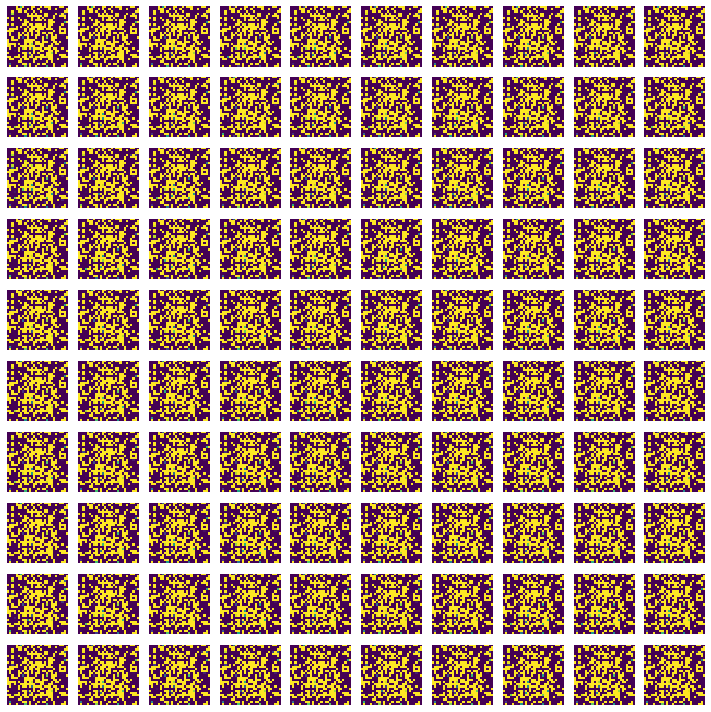

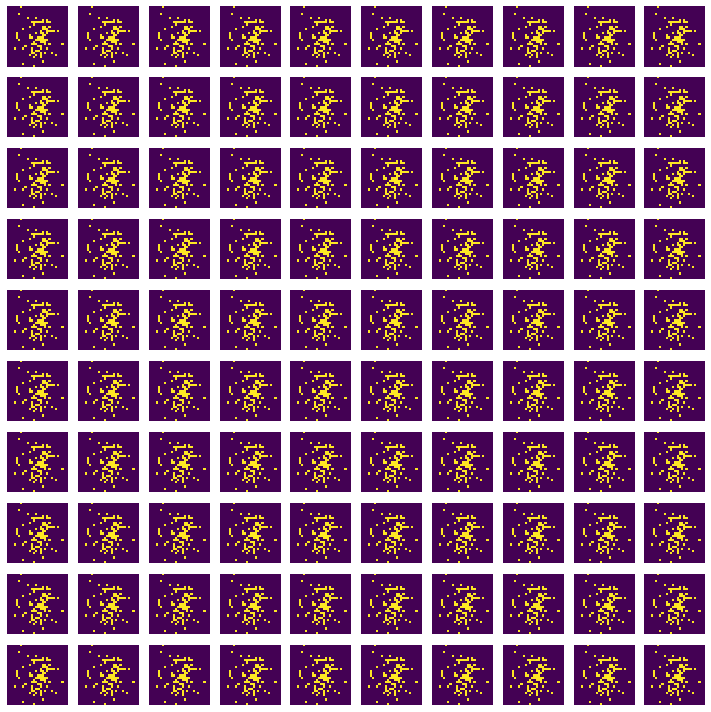

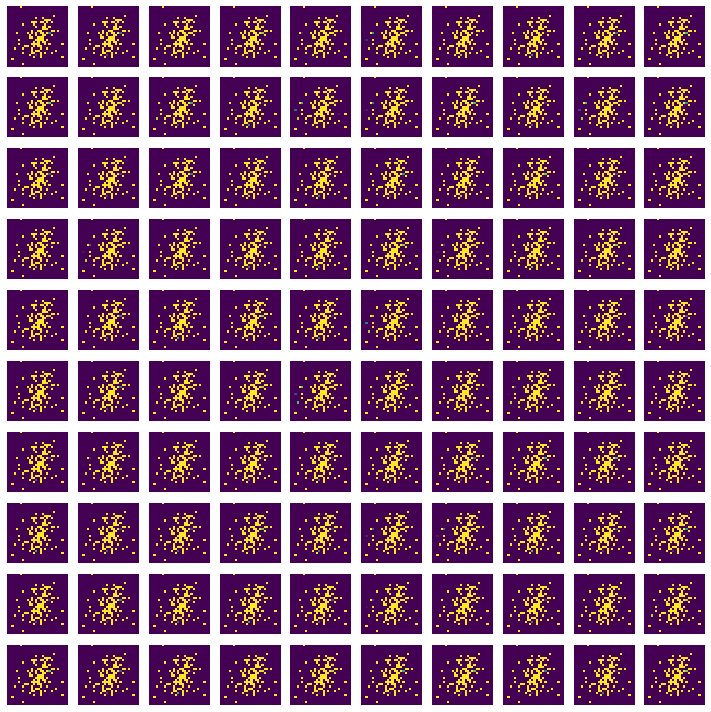

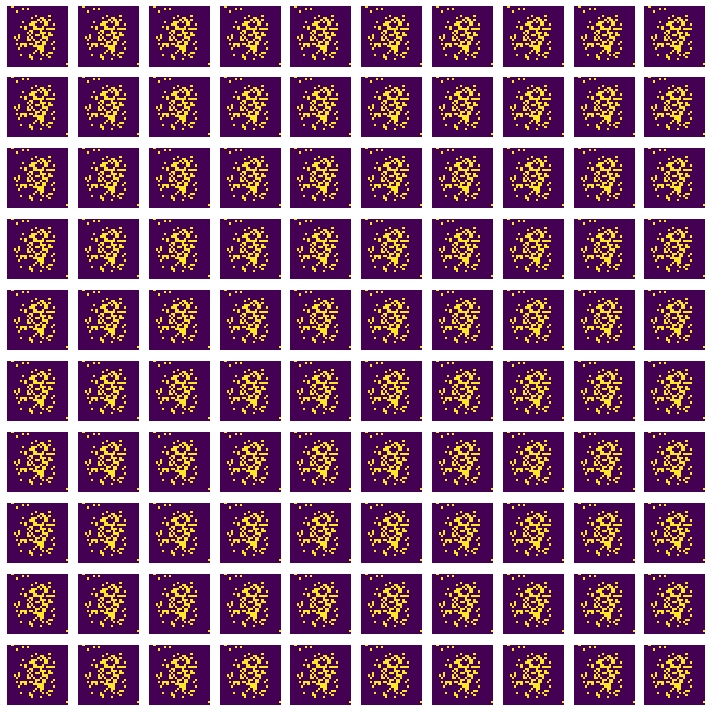

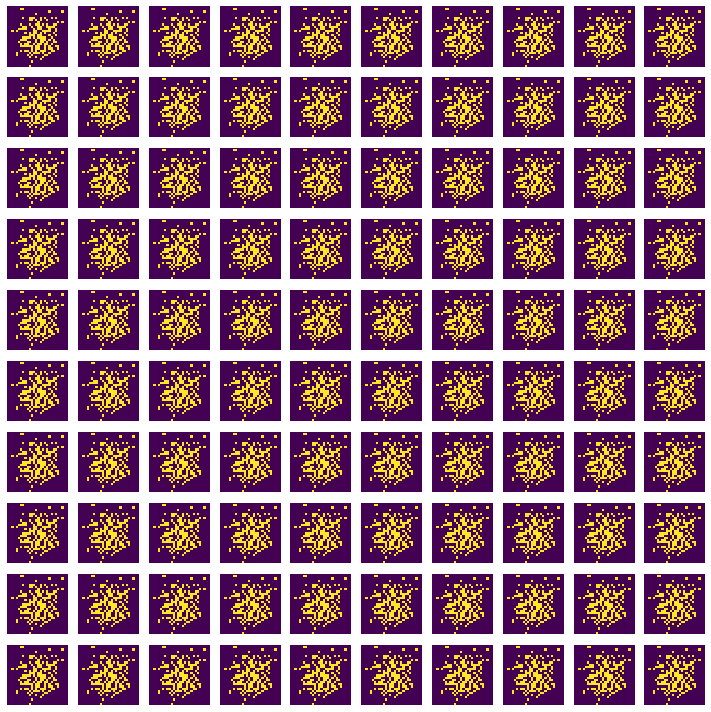

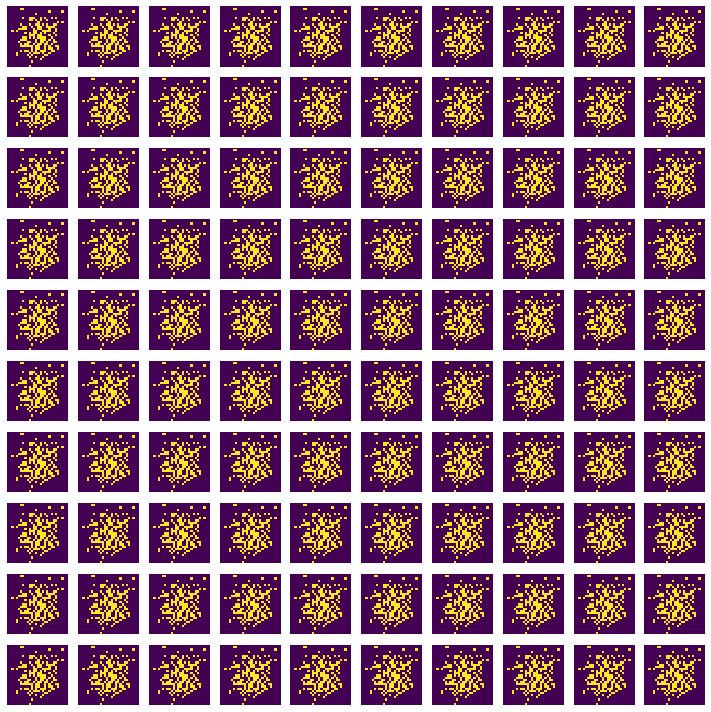

In [ ]:
def training(epochs=100, batch_size=64):
    
    #Loading the data
    (X_train, y_train, X_test, y_test) = load_data()
    batch_count = X_train.shape[0] / batch_size
    
    # Creating GAN
    generator= build_generator()
    discriminator= build_discriminator()
    gan = create_gan(discriminator, generator)
     
    for e in range(1,epochs+1 ):
        print("Epoch %d" %e)
        for _ in tqdm(range(batch_size)):
        #generate  random noise as an input  to  initialize the  generator
            noise= np.random.normal(0,1, [batch_size, 100])
            
            # Generate fake MNIST images from noised input
            generated_images = generator.predict(noise)
            
            # Get a random set of  real images
            image_batch =X_train[np.random.randint(low=0,high=X_train.shape[0],size=batch_size)]
            
            #Construct different batches of  real and fake data 
            X= np.concatenate([image_batch, generated_images])
            
            # Labels for generated and real data
            y_dis=np.zeros(2*batch_size)
            y_dis[:batch_size]=0.9
            
            #Pre train discriminator on  fake and real data  before starting the gan. 
            discriminator.trainable=True
            discriminator.train_on_batch(X, y_dis)
            
            #Tricking the noised input of the Generator as real data
            noise= np.random.normal(0,1, [batch_size, 100])
            y_gen = np.ones(batch_size)
            
            # During the training of gan, 
            # the weights of discriminator should be fixed. 
            #We can enforce that by setting the trainable flag
            discriminator.trainable=False
            
            #training  the GAN by alternating the training of the Discriminator 
            #and training the chained GAN model with Discriminator’s weights freezed.
            gan.train_on_batch(noise, y_gen)
            
        if e == 1 or e % 20 == 0:
           
            plot_generated_images(e, generator)
training(100,64)